<h1  style='text-align:center;'>Job Research For Career Track </h1>

## Business Goal:
Make a tech jobs map for students showing current market expectations and job requirements in terms of skills, salary, experience, titles, and potential for professional growth

## Features of interest

### Job map: Make a detailed profile for each job title that includes the following information:
     [hard skill, salary, experience, self-development and learning, educational background]

### Demographics And Social -- tech industry and individual roles/positions demographics:
    [age, gender, race and ethnicity, sexuality, education]
    
### Employer profile: Research the following information about companies:
    [industry, company size, team size, roles/jobs, salaries,
     part-time/full-time, overtime, stack and skills required ,demographics and social diversity]

# Packages Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from matplotlib import ticker
from difflib import get_close_matches 
import os
import math

C:\Users\garci\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\garci\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# 1. Filtering the datasets

##  1.1 Jetbrain - The State of Developer Ecosystem 2020 Survey

After running through the avaialble columns, the following were found to be of interest.

Ethnicity not asked

In [2]:
df =pd.read_csv(os.getcwd()+"/sharing_data_outside2019.csv",nrows=5)

In [3]:
#drop to keep consice. Primary prog language identified as being the most relevant  (amongst other prog. related ones)
ofInterest='it_experience', 'salary', 'age_range', 'company_size','db','cloud_services',\
    'sectors_it', 'sectors_nonit','hours_code_job',  'job_role', 'position_level','team_size',\
    'learn_what', 'learn_kind_of_content', 'learn_time','employment_status','primary_proglang', 'country'

#keep column name if subsection in the strings of interest 
keepTheseColumns=[column for column in df.columns 
           if column.split('.')[0] in ofInterest or column in ofInterest]


Education column missing. Keep questions that asked about primary language

In [4]:
#use the columns from above
devecosystemSurvey =pd.read_csv(os.getcwd()+"/sharing_data_outside2019.csv",usecols=keepTheseColumns)

C:\Users\garci\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,14,15,144,149,151,152,153,154,157,158,159,160,162,163,164,165,167,168,267,268,1551,1552,1553,1554,1669,1680,1681,1682,1683,1685,1686,1688,1689,1690,1694,1696,1698,1700,1702,1735) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#retrieving the data jobs 
#left out the last column as it related to hours spent in coding job (not a relevant answer)
jobsColumns = devecosystemSurvey.columns[devecosystemSurvey.columns.str.contains('job')][:-1]
jobsColumns

Index(['job_role.Developer / Programmer /  Software Engineer',
       'job_role.DevOps Engineer / Infrastructure Developer / etc_',
       'job_role.DBA', 'job_role.Architect', 'job_role.Tester / QA Engineer',
       'job_role.Technical support',
       'job_role.Data analyst / Data engineer/ Data scientist',
       'job_role.Business analyst', 'job_role.Team Lead',
       'job_role.Systems analyst', 'job_role.Product Manager',
       'job_role.UX / UI Designer', 'job_role.CIO / CEO / CTO',
       'job_role.Marketing Manager', 'job_role.Developer Advocate',
       'job_role.Instructor / Teacher / Tutor / etc_', 'job_role.Other'],
      dtype='object')

In [6]:
#checking for relevant job role
dataTitles= ['job_role.Data analyst / Data engineer/ Data scientist', 'job_role.Systems analyst',
           'job_role.Business analyst']

#retrieving relevant rows (True if job title present)
isDataJob_keep=devecosystemSurvey[dataTitles].notnull().any(1)
devecosystemSurvey=devecosystemSurvey[isDataJob_keep].reset_index(drop=True)

#retrieving relevant country -> the united states
devecosystemSurvey =devecosystemSurvey.query("country =='United States'")

In [7]:
#first round of dropping columns (not data rows and country column)
devecosystemSurvey=devecosystemSurvey.drop(columns= 
                         [notData for notData in jobsColumns if notData not in dataTitles]+['country']
                                            ).reset_index(drop=True)
devecosystemSurvey.head()

,employment_status,job_role.Data analyst / Data engineer/ Data scientist,job_role.Business analyst,job_role.Systems analyst,position_level,primary_proglang.Java,primary_proglang.C,primary_proglang.C++,primary_proglang.Python,primary_proglang.C#,...,it_experience.6 - 10 years,it_experience.11+ years,salary,age_range.17 or younger,age_range.18-20,age_range.21-29,age_range.30-39,age_range.40-49,age_range.50-59,age_range.60 or older
0,Fully employed by a company / organization,Data analyst / Data engineer/ Data scientist,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,...,NaN,11+ years,NaN,NaN,NaN,NaN,NaN,40-49,NaN,NaN
1,Fully employed by a company / organization,NaN,NaN,Systems analyst,NaN,NaN,NaN,C++,Python,NaN,...,NaN,11+ years,NaN,NaN,NaN,NaN,NaN,NaN,50-59,NaN
2,Fully employed by a company / organization,Data analyst / Data engineer/ Data scientist,NaN,NaN,NaN,Java,C,NaN,NaN,NaN,...,NaN,11+ years,Don’t want to disclose,NaN,NaN,NaN,NaN,40-49,NaN,NaN
3,Self-employed (a person earning income directl...,Data analyst / Data engineer/ Data scientist,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,...,6 - 10 years,NaN,NaN,NaN,NaN,NaN,30-39,NaN,NaN,NaN
4,Fully employed by a company / organization,NaN,NaN,Systems analyst,NaN,Java,C,C++,NaN,NaN,...,NaN,11+ years,"100,001 - 110,000",NaN,NaN,NaN,NaN,NaN,50-59,NaN


In [8]:
devecosystemSurvey['employment_status'].unique()

array(['Fully employed by a company / organization',
       'Self-employed (a person earning income directly from their own business, trade, or profession)',
       'Freelancer (a person pursuing a profession without a long-term commitment to any one employer)',
       'Partially employed by a company / organization'], dtype=object)

As long as employed in some professional sense, I'll keep. So according to that, everrything here is good.

-----------------------------------------------------------------------------------------------------------------

## 1.2 FreeCode Camp - New Coder Survey (2018)

In [9]:
newCoderSurvey =pd.read_csv(os.getcwd()+"/stackoverflow.csv")

In [10]:
newCoderSurvey.sample(5)

,ID,is_software_dev,is_first_dev_job,months_job_search,job_pref,job_intr_fllstck,job_intr_backend,job_intr_frntend,job_intr_mobile,job_intr_devops,...,last_yr_income,communite_time,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,time_start,time_end,network_id,time_total_sec
18979,195d9ea7e6f932f7456a124e2fe1e81f,0.0,NaN,NaN,work for a government,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,2018-08-22T22:12:41Z,2018-08-22T22:19:20Z,80e69a1ec1,399
4951,920a03f90761049be9fc3c00d25691d7,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,100000.0,30 to 44 minutes,0.0,1.0,0.0,1.0,2018-10-04T12:01:09Z,2018-10-04T12:09:43Z,2cbc258fa6,514
10658,681608efeb693fd9e768e6b7cbce38bd,1.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5547.0,30 to 44 minutes,0.0,0.0,0.0,0.0,2018-09-16T18:56:19Z,2018-09-16T19:03:24Z,c7f2f14ed6,425
11765,571eab5d59668ba26b6834a6fbe28eae,0.0,NaN,NaN,work for a medium-sized company,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,2018-09-13T07:58:51Z,2018-09-13T08:04:24Z,1ee9abe156,333
25149,a4f36af79e07c619953cd96ff86c1bf2,0.0,NaN,NaN,work for a medium-sized company,1.0,1.0,NaN,1.0,1.0,...,NaN,30 to 44 minutes,1.0,0.0,0.0,1.0,2018-08-09T14:12:45Z,2018-08-09T14:19:20Z,ac0b4e03c9,395


In [11]:
#checking countries that starts with "United" (looking for U.S.)
newCoderSurvey[newCoderSurvey['country_live'].str.startswith("United").fillna(False)]['country_live'].unique()

array(['United States of America', 'United Kingdom',
       'United Arab Emirates'], dtype=object)

In [12]:
#keeping only U.S. respondents
newCoderSurvey = newCoderSurvey.query("country_live == 'United States of America'")

[col for col in newCoderSurvey.columns if 'job' in col]

['is_first_dev_job',
 'months_job_search',
 'job_pref',
 'job_intr_fllstck',
 'job_intr_backend',
 'job_intr_frntend',
 'job_intr_mobile',
 'job_intr_devops',
 'job_intr_datasci',
 'job_intr_teacher',
 'job_intr_qa_engn',
 'job_intr_ux_engn',
 'job_intr_projm',
 'job_intr_gamedev',
 'job_intr_infosec',
 'job_intr_dataengn',
 'job_intr_other',
 'when_appl_job',
 'job_lctn_pref',
 'job_relocate']

In [13]:
# data science and data engineer relevant job columns
dataJob = ['job_intr_dataengn','job_intr_datasci']

#keeping respondents with relevant data job
print('Previous shape:',newCoderSurvey.shape)
newCoderSurvey =newCoderSurvey[newCoderSurvey[dataJob].notnull().any(1)]
print('New Shape:',newCoderSurvey.shape)

Previous shape: (9216, 137)
New Shape: (1751, 137)


In [14]:
#looking trhough employmetn -> checking for employment status involving real-world experience 
#ie. (internships, full time josb)
newCoderSurvey[['curr_emplymnt_other','curr_emplymnt']].fillna('').applymap(lambda x: x).sum(1).unique()

array(['Employed for wages', 'Not working but looking for work',
       'Not working while doing my data science program with Thinkful',
       'STUDENT', 'Not working and not looking for work', 'Student',
       'Doing an unpaid internship', 'Self-employed freelancer',
       'Focusing on high school', '', 'student',
       'A stay-at-home parent or homemaker',
       'Self-employed business owner', 'Student employed for wages',
       'Unable to work', 'On disability / looking for work',
       'Full-time Student', 'I’m a high school Student', 'Military',
       'Full Time Student', 'Retired', 'Contractor', 'School',
       'Student, retired military', 'Studying in College',
       'Full time student', 'Part Time - Service Industry',
       'Veteran using GI bill benefits',
       'Not Working studying to get a coding job', 'NOT WORKING STUDYING',
       'Traveling', 'teanager', 'Legally Not Allowwed To Work',
       'Americorps VISTA', 'CompTIA Bootcamp', 'Undergraduate',
       'Su

The following were select based on being in some form involved in the profession or has a disability.

In [15]:
employedInProfession = ['Employed for wages',  'Doing an unpaid internship', 'Self-employed freelancer',
       'Self-employed business owner', 'Student employed for wages',
       'Unable to work', 'On disability / looking for work',
       'Military', 'Contractor', 'Part Time - Service Industry',
       'Traveling',  'Americorps VISTA',  
      'Dietary Aid', 'Employed for wages and self employed business owner']

#checking if keywords in either one of the two columns  -> mask (True/False)
newCoderSurvey =newCoderSurvey[newCoderSurvey[['curr_emplymnt_other','curr_emplymnt']
                                 ].apply(lambda x: x.isin(employedInProfession)).any(1)]

#using the boolean mask above keep respondents with relevant employment status
newCoderSurvey= newCoderSurvey.drop(columns= ['curr_emplymnt_other','curr_emplymnt']).reset_index(drop=True)

newCoderSurvey.head()

,ID,is_software_dev,is_first_dev_job,months_job_search,job_pref,job_intr_fllstck,job_intr_backend,job_intr_frntend,job_intr_mobile,job_intr_devops,...,last_yr_income,communite_time,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,time_start,time_end,network_id,time_total_sec
0,8e3dfe649751fdeed8fb9d603576d51d,0.0,NaN,NaN,work for a startup,1.0,NaN,NaN,NaN,1.0,...,30000.0,30 to 44 minutes,1.0,0.0,0.0,1.0,2018-10-24T09:52:07Z,2018-10-24T10:10:23Z,63751cc446,1096
1,80c2a4fea5971725d41e68c7916aeab4,0.0,NaN,NaN,work for a nonprofit,NaN,NaN,NaN,NaN,NaN,...,95000.0,More than 60 minutes,1.0,0.0,0.0,1.0,2018-10-23T20:38:27Z,2018-10-23T20:51:36Z,3de8c7463a,789
2,b455aef8964743863262f977aa759392,0.0,NaN,NaN,work for a multinational corporation,NaN,1.0,NaN,NaN,1.0,...,40000.0,15 to 29 minutes,1.0,0.0,0.0,1.0,2018-10-23T19:02:25Z,2018-10-23T19:10:13Z,64646281c4,468
3,f3d9f795c351682ab9d95d695db29edf,0.0,NaN,NaN,work for a startup,1.0,NaN,NaN,1.0,NaN,...,22000.0,45 to 60 minutes,0.0,0.0,0.0,1.0,2018-10-20T06:46:19Z,2018-10-20T06:55:08Z,96ec814f58,529
4,3e6865a29e463030dbd968e10e571910,0.0,NaN,NaN,work for a medium-sized company,1.0,1.0,1.0,NaN,NaN,...,40000.0,Less than 15 minutes,1.0,0.0,0.0,1.0,2018-10-20T03:25:49Z,2018-10-20T03:36:30Z,54217b9143,641


Shortening the learning platform columns. Dictionary mapping.

In [16]:
learningPlatforms={'rsrc_fcc':"freeCodeCamp",
      'rsrc_mdn':"Mozilla Developer Network (MDN)",
      'rsrc_so':"Stack Overflow",
      'rsrc_edx':"EdX",
      'rsrc_coursera':"Coursera",
      'rsrc_khan_acdm':"Khan Academy",
      'rsrc_pluralsght':"Pluralsight",
      'rsrc_codeacdm':"Codecademy",
      'rsrc_udacity':"Udacity",
      'rsrc_udemy':"Udemy",
      'rsrc_code_wars':"Code Wars",
      'rsrc_treehouse':"Treehouse",
      'rsrc_hackerrank':"HackerRank",
      'rsrc_frntendmstr':"Front End Masters",
      'rsrc_lynda':"Lynda.com",
      'rsrc_egghead':"Egghead.io",
      'rsrc_css_tricks':"CSS Tricks",
      'rsrc_other':"Other"}

#shortening learning platform column names 
newCoderSurvey.columns=[learningPlatforms[col] if col in learningPlatforms.keys()
                          else col for col in newCoderSurvey.columns]

In [17]:
#checking for duplicated survey respondents
newCoderSurvey['ID'].duplicated().sum()

0

In [18]:
#after an in-depth look, columns to keep 
toKeep = ['job_intr_dataengn','job_intr_datasci',\
 'expected_earn', 'hours_learning', 'months_programming',
       'bootcamp_attend', 'age', 'gender', 'gender_other', 'is_ethnic_minority', 
       'school_degree', 'school_major',  'curr_field', 'last_yr_income', 
    'is_self_employed', 'is_recv_disab_bnft'] + [col for col in learningPlatforms.values()]#learning platform

newCoderSurvey=newCoderSurvey[toKeep]
newCoderSurvey.head(3)

,job_intr_dataengn,job_intr_datasci,expected_earn,hours_learning,months_programming,bootcamp_attend,age,gender,gender_other,is_ethnic_minority,...,Udacity,Udemy,Code Wars,Treehouse,HackerRank,Front End Masters,Lynda.com,Egghead.io,CSS Tricks,Other
0,1.0,1.0,70000.0,6.0,9,0.0,37,Male,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Traversy Media
1,NaN,1.0,75000.0,15.0,12,0.0,54,Male,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,55000.0,1.0,6,1.0,29,Male,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [19]:
#turn 1 (true boolean value) into their respective column name (category)
def turnBooleanIntoColumnName(series, col):
    column = []
    for val in list(series.values):
        if val  ==1.0:
            column.append(col)
        else: column.append(val)
    return column

for col in [col for col in learningPlatforms.values()]:
    newCoderSurvey[col] = turnBooleanIntoColumnName(newCoderSurvey[col], col)
    
newCoderSurvey.head()

,job_intr_dataengn,job_intr_datasci,expected_earn,hours_learning,months_programming,bootcamp_attend,age,gender,gender_other,is_ethnic_minority,...,Udacity,Udemy,Code Wars,Treehouse,HackerRank,Front End Masters,Lynda.com,Egghead.io,CSS Tricks,Other
0,1.0,1.0,70000.0,6.0,9,0.0,37,Male,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Traversy Media
1,NaN,1.0,75000.0,15.0,12,0.0,54,Male,NaN,1.0,...,NaN,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,55000.0,1.0,6,1.0,29,Male,NaN,1.0,...,Udacity,Udemy,NaN,NaN,NaN,NaN,Lynda.com,NaN,NaN,NaN
3,1.0,1.0,80000.0,NaN,1,0.0,27,Male,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SoloLearn
4,NaN,1.0,40000.0,3.0,8,0.0,31,Male,NaN,0.0,...,NaN,NaN,NaN,Treehouse,NaN,NaN,NaN,NaN,NaN,NaN


Reducing all columns with values representing an answer to the learning platform question into one main one. This main column will represent all the learning platforms that the respondent stated they used.

In [20]:
def addMainColumn(df,col):
    reducedColumn = df[col].applymap(lambda x: '' if type(x)==float  or type(x)!=str else x  
                    ).apply(lambda x: list(set([i for i in x if i != ''])) ,1)
    return reducedColumn


In [21]:
newCoderSurvey['learning_platform'] =addMainColumn(newCoderSurvey,[col for col in learningPlatforms.values()])

#drop redundant columns
newCoderSurvey.drop(columns=[col for col in learningPlatforms.values()],inplace=True )
newCoderSurvey['learning_platform'].head()

0       [Traversy Media, freeCodeCamp, Stack Overflow]
1                                              [Udemy]
2    [Lynda.com, Khan Academy, Udemy, Udacity, free...
3               [Pluralsight, SoloLearn, freeCodeCamp]
4         [Treehouse, Codecademy, EdX, Stack Overflow]
Name: learning_platform, dtype: object

In [22]:
#reduce. If it's a list and has one element than retrieve that element out 
newCoderSurvey['learning_platform']=newCoderSurvey['learning_platform'].apply(lambda x: 
                                            x[0].strip() if type(x)==list and len(x)==1 else 
                                            [i.strip() for i in x] if type(x)==list else x)
newCoderSurvey['learning_platform'].head()

0       [Traversy Media, freeCodeCamp, Stack Overflow]
1                                                Udemy
2    [Lynda.com, Khan Academy, Udemy, Udacity, free...
3               [Pluralsight, SoloLearn, freeCodeCamp]
4         [Treehouse, Codecademy, EdX, Stack Overflow]
Name: learning_platform, dtype: object

## 1.3 Stack Overflow Developer Survey

In [23]:
stackoverflowSurvey= pd.read_csv(os.getcwd()+"/survey_results_public.csv")
stackoverflowSurvey.sample(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
2289,2298,I am a developer by profession,Yes,54.0,12,Yearly,220000.0,220000.0,United States,United States dollar,...,Neither easy nor difficult,Too long,No,"A social science (such as anthropology, psycho...",Flask;React.js;Vue.js,Flask;React.js;Vue.js,Just as welcome now as I felt last year,60.0,40,30
5048,5067,I am a developer by profession,No,37.0,16,NaN,NaN,NaN,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET;ASP.NET Core,ASP.NET,Just as welcome now as I felt last year,24.0,20,18
50479,51519,I am a student who is learning to code,Yes,19.0,15,NaN,NaN,NaN,Portugal,NaN,...,Easy,Appropriate in length,No,NaN,Angular;Django;Flask;React.js;Vue.js,NaN,Just as welcome now as I felt last year,NaN,5,NaN
27892,27996,I am a developer by profession,Yes,35.0,11,Monthly,240000.0,75660.0,Uruguay,Uruguayan peso,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Spring,Angular;Spring,Just as welcome now as I felt last year,48.0,24,12
23821,23911,I am a developer by profession,Yes,58.0,15,Yearly,85000.0,91883.0,Netherlands,European Euro,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,React.js,Just as welcome now as I felt last year,37.0,43,32


In [24]:
#united states respondents only
stackoverflowSurvey=stackoverflowSurvey.query("Country == 'United States'")

Filtering by jobs is a challenge. Here's the questions we're dealing with: "Which of the following describe you? Please select all that apply." With over 20+ options, the best assumption I can think of will be to search for keywords that describe a data science and filter out rows who don't.

In [25]:
#keeping data related jobs
isDataJob = stackoverflowSurvey['DevType'].str.contains('data|scientist|vision|analyst|machine')
stackoverflowSurvey = stackoverflowSurvey[isDataJob.fillna(False)]
stackoverflowSurvey

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
71,72,I am a developer by profession,Yes,25.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,Mathematics or statistics,NaN,NaN,Just as welcome now as I felt last year,NaN,10,NaN
76,77,"I am not primarily a developer, but I write co...",Yes,NaN,6,NaN,NaN,NaN,United States,United States dollar,...,Easy,Too long,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,60.0,30,16
110,112,I am a developer by profession,Yes,28.0,16,Yearly,65000.0,65000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",NaN,NaN,Just as welcome now as I felt last year,40.0,11,3
113,115,I am a developer by profession,Yes,23.0,14,Yearly,78800.0,78800.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Spring,Spring,A lot less welcome now than last year,39.0,9,2
123,125,"I am not primarily a developer, but I write co...",Yes,41.0,30,Monthly,200000.0,2000000.0,United States,United States dollar,...,Easy,Appropriate in length,No,NaN,NaN,NaN,Just as welcome now as I felt last year,40.0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64229,18541,NaN,Yes,NaN,21,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask,Flask,Just as welcome now as I felt last year,NaN,15,15
64340,43211,NaN,Yes,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
64368,49544,NaN,Yes,32.0,16,NaN,NaN,NaN,United States,NaN,...,Neither easy nor difficult,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask;Vue.js,Express;Flask,Just as welcome now as I felt last year,NaN,14,10
64386,53697,NaN,Yes,30.0,24,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,NaN,Just as welcome now as I felt last year,NaN,6,3


In [26]:
# checking for data-related jobs contain keywords, if they do, then keep only those values (replace ; with ,)
stackoverflowSurvey['DevType'] = stackoverflowSurvey['DevType'].apply(lambda x: [i for i in x.split(';')
                                    if 'data' in i.lower().replace(",","")
                                    or 'analyst' in i.lower().replace(",","")
                                     or 'machine' in i.lower().replace(",","") 
                                    or 'vision' in i.lower().replace(",","")
                                                           ])

In [27]:
stackoverflowSurvey['DevType'].head(5)

71     [Data or business analyst, Data scientist or m...
76       [Data scientist or machine learning specialist]
110    [Data or business analyst, Database administra...
113                                     [Engineer, data]
123      [Data scientist or machine learning specialist]
Name: DevType, dtype: object

Checking for employment status (working in profession in some way or in disability, if applicable)

In [28]:
stackoverflowSurvey['Employment'].unique()

array(['Not employed, but looking for work', 'Employed full-time',
       'Employed part-time',
       'Independent contractor, freelancer, or self-employed'],
      dtype=object)

In [29]:
isEmployed= ['Employed full-time',  'Employed part-time','Independent contractor, freelancer, or self-employed']
stackoverflowSurvey = stackoverflowSurvey.query("Employment in @isEmployed")

#checking for user duplicates
stackoverflowSurvey['Respondent'].duplicated().sum()

0

No duplicate respondents

In [30]:
stackoverflowSurvey[ 'NEWCollabToolsWorkedWith'].unique()[:20]

array(['Github;Slack;Trello;Google Suite (Docs, Meet, etc)',
       'Google Suite (Docs, Meet, etc)', 'Confluence;Jira;Github;Slack',
       'Jira', 'Github;Slack', 'Github;Gitlab;Facebook Workplace',
       'Confluence;Jira;Github;Slack;Microsoft Teams', 'Github',
       'Github;Gitlab;Slack;Microsoft Teams;Microsoft Azure;Trello;Google Suite (Docs, Meet, etc)',
       'Microsoft Teams;Google Suite (Docs, Meet, etc)',
       'Jira;Github;Slack;Trello;Google Suite (Docs, Meet, etc)', 'Slack',
       'Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)',
       'Confluence;Jira;Github;Gitlab;Microsoft Teams;Google Suite (Docs, Meet, etc);Stack Overflow for Teams',
       'Github;Gitlab;Trello;Google Suite (Docs, Meet, etc)',
       'Github;Microsoft Teams;Google Suite (Docs, Meet, etc)', nan,
       'Confluence;Jira;Github;Gitlab;Slack;Google Suite (Docs, Meet, etc)',
       'Github;Gitlab;Slack;Microsoft Azure',
       'Confluence;Jira;Github;Gitlab;Microsoft Teams;Microsoft Az

In [31]:
stackoverflowSurvey[['JobFactors','NEWJobHunt', 'NEWJobHuntResearch',
       'JobSat', 'JobSeek']]

,JobFactors,NEWJobHunt,NEWJobHuntResearch,JobSat,JobSeek
76,How widely used or impactful my work output wo...,Curious about other opportunities;Wanting to w...,Personal network - friends or family;Directly ...,Very dissatisfied,"I’m not actively looking, but I am open to new..."
110,Specific department or team I’d be working on;...,Having a bad day (or week or month) at work;Cu...,"Read company media, such as employee blogs or ...",Slightly satisfied,I am actively looking for a job
113,"Languages, frameworks, and other technologies ...",Curious about other opportunities;Better compe...,Company reviews from third party sites (e.g. G...,Very satisfied,"I’m not actively looking, but I am open to new..."
123,Flex time or a flexible schedule;Family friend...,Better work/life balance,Personal network - friends or family;Directly ...,Very satisfied,I am not interested in new job opportunities
133,NaN,NaN,NaN,Very satisfied,I am not interested in new job opportunities
...,...,...,...,...,...
64229,NaN,NaN,NaN,NaN,NaN
64340,NaN,NaN,NaN,NaN,NaN
64368,NaN,NaN,NaN,NaN,NaN
64386,NaN,NaN,NaN,NaN,NaN


None of the columns were relevant so decided to filter out.

In [32]:
#columns to keep
stackoverflowSurvey = stackoverflowSurvey[[ 'Age', 'DatabaseWorkedWith','CompTotal',
       'DevType', 'EdLevel', 'Ethnicity', 'Gender','LanguageWorkedWith',  
        'NEWEdImpt', 'JobSat', 'NEWLearn',  'NEWOvertime',  'OrgSize', 'Sexuality', 
       'Trans', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]

stackoverflowSurvey.head(3)

,Age,DatabaseWorkedWith,CompTotal,DevType,EdLevel,Ethnicity,Gender,LanguageWorkedWith,NEWEdImpt,JobSat,NEWLearn,NEWOvertime,OrgSize,Sexuality,Trans,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
76,NaN,NaN,NaN,[Data scientist or machine learning specialist],"Other doctoral degree (Ph.D., Ed.D., etc.)",White or of European descent,Man,C++;HTML/CSS;Java;Python;R,Critically important,Very dissatisfied,Once a year,Often: 1-2 days per week or more,100 to 499 employees,Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",60.0,30,16
110,28.0,Oracle;PostgreSQL,65000.0,"[Data or business analyst, Database administra...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",South Asian,Man,Python;SQL,Fairly important,Slightly satisfied,Every few months,Often: 1-2 days per week or more,"10,000 or more employees",Straight / Heterosexual,No,"Information systems, information technology, o...",40.0,11,3
113,23.0,MariaDB;MySQL;PostgreSQL,78800.0,"[Engineer, data]","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,Assembly;C;C++;Java;Python;SQL,Very important,Very satisfied,Once a year,Sometimes: 1-2 days per month but less than we...,"5,000 to 9,999 employees",Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",39.0,9,2


## 1.4 Kaggle 2019 Survey

In [33]:
kaggleSurveyQuestions = pd.read_csv(os.getcwd()+"/questions_only.csv")

print(kaggleSurveyQuestions.iloc[0,].values[:3])
print(len(kaggleSurveyQuestions.iloc[0]))

['Duration (in seconds)' 'What is your age (# years)?'
 'What is your gender? - Selected Choice']
35


35 Questions in total. The following are the ones of interest.

In [34]:
kaggleQuestionsofInterest=['What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice',
       'What is your current yearly compensation (approximate $USD)?',
        'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice',
       'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice',
       'How long have you been writing code to analyze data (at work or at school)?',
       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
       'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice',
       'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice',
       'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice',
       'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice',
       'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice',
       'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
       'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
       'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice']

No employment status column - no need to filter for that for this dataset

In [35]:
#this is i variable references in the next cell
kaggleSurveyQuestions.iloc[0][kaggleSurveyQuestions.iloc[0] =='What is your age (# years)?'].index[0]

'Q1'

In [36]:
keep_questions =[i for qs in kaggleQuestionsofInterest 
     for col,i in zip(kaggleSurveyQuestions.iloc[0],kaggleSurveyQuestions.iloc[0].index) if col==qs]  

In [37]:
#loading in actual dataset
kaggleSurvey = pd.read_csv(os.getcwd()+"/multiple_choice_responses.csv")

#keep if main question is a question variable of interest 
colsToKeep = [i for i in kaggleSurvey.columns if i.split('_')[0] in keep_questions]
kaggleSurvey =kaggleSurvey[colsToKeep]

C:\Users\garci\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
kaggleSurvey.iloc[0][kaggleSurvey.iloc[0].str.contains('country')]

Q3    In which country do you currently reside?
Name: 0, dtype: object

In [39]:
#keep if in united states then drop question 3 as no longer needed
kaggleSurvey=kaggleSurvey[kaggleSurvey['Q3'] == 'United States of America'
                           ].drop(columns='Q3').reset_index(drop=True)

In [40]:
kaggleSurveyQuestions

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [41]:
#checking for data roles
kaggleSurvey[kaggleSurvey.columns[kaggleSurvey.columns.str.contains('Q5')][0]].unique()
    

array(['Data Scientist', 'Student', 'Product/Project Manager',
       'Data Analyst', 'Other', 'Research Scientist', 'Data Engineer',
       'Business Analyst', 'Software Engineer', 'Statistician',
       'Not employed', 'DBA/Database Engineer', nan], dtype=object)

In [42]:
#keeping job title of interest
titleofInterest=['Data Scientist',  'Data Analyst',  'Data Engineer', 
                  'Business Analyst', 'Statistician', 'DBA/Database Engineer']

kaggleSurvey=kaggleSurvey[kaggleSurvey['Q5'].isin(titleofInterest)].reset_index(drop=True)
kaggleSurvey.head()

,Q1,Q2,Q2_OTHER_TEXT,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q9_Part_1,Q9_Part_2,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,22-24,Female,-1,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,Analyze and understand data to influence produ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,50-54,Female,-1,Master’s degree,Data Analyst,-1,50-249 employees,1-2,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,35-39,Male,-1,Bachelor’s degree,Data Scientist,-1,"1000-9,999 employees",20+,NaN,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,30-34,Male,-1,Bachelor’s degree,Data Analyst,-1,250-999 employees,3-4,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1
4,25-29,Prefer not to say,-1,Master’s degree,Data Scientist,-1,"> 10,000 employees",20+,Analyze and understand data to influence produ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,-1


# 2. Data Preprocessing - Part 2

In [43]:
def missing_values(data):
    """
    Function that takes in a dataframe, iterates over each of its columns and checks for
    common indicators of missing values (ie. negative values).   

    Args:
         data (pandas.DataFrame): Dataframe to be checked

    Returns:
        list (dict): a list containing (if any) a dictionar[y/ies] of key:value pair in the 
        following format - {column's missing value: % of column's missing value} - sorted in descending order
    """
    
    miss = {}
    if len(data.columns) <= 0:
        print('Something went wrong. No columns detected.')
    for i in data.columns:  # iterate through all columns in dataset to search for each defined missing value
        if data[i].isnull().any():
            miss[i] = 'Null values ' + str(
                round(
                    len(data[data[i].isnull() == True]) / len(data) * 100, 2))
        try:
            if len(np.where(data[i] == '')) > 1:
                miss[i] = 'Empty strings ' + str(
                    round(len(data[data[i] == '']) / len(data) * 100, 2))
        except:
            pass
        if np.issubdtype(data[i].dtype,
                         np.number) and len(data[data[i] < 0]) > 1:
            miss[i] = 'Negative values ' + str(
                round(len(data[data[i] < 0]) / len(data) * 100, 2))
        try:
            if len(data[data[i].str.lower.isin(['n/a', 'na', 'an', 'n\a', '?'
                                                ])]) > 1:
                miss[i] = 'other null values present'
        except:
            try:
                if len(data[data[i].isin(['N/A', '?', 'na', 'Na', 'N/a'
                                          ])]) > 1:
                    miss[i] = 'other null values present'
            except:
                print(i)
                continue
    return sorted(miss.items(),
                  key=lambda x: float(miss[x[0]].split(' ')[-1]),
                  reverse=True)

## 2.1 Devecosystem

In [44]:
(devecosystemSurvey.isnull().sum().sort_values(ascending=False) / len(devecosystemSurvey)*100).head(20)

primary_proglang.Rust                        100.000000
db.Exasol                                    100.000000
cloud_services.Cloud Foundry                 100.000000
sectors_nonit.Construction / Architecture    100.000000
primary_proglang.Delphi                      100.000000
sectors_nonit.Law                            100.000000
cloud_services.IBM SoftLayer                 100.000000
primary_proglang.Lua                         100.000000
cloud_services.Rackspace                     100.000000
primary_proglang.Crystal                     100.000000
sectors_nonit.Energy                         100.000000
sectors_it.BPO services                      100.000000
primary_proglang.Perl                        100.000000
primary_proglang.Cobol                       100.000000
primary_proglang.Objective-C                 100.000000
primary_proglang.CoffeeScript                100.000000
db.ClickHouse                                 99.447514
primary_proglang.Visual Basic                 99

In [45]:
# Drop if 100% missing values
to_drop =devecosystemSurvey.isnull().sum()[devecosystemSurvey.isnull().sum() == len(devecosystemSurvey)].index
print(to_drop)
devecosystemSurvey.drop(columns=to_drop,inplace=True)

Index(['primary_proglang.Objective-C', 'primary_proglang.Rust',
       'primary_proglang.Crystal', 'primary_proglang.CoffeeScript',
       'primary_proglang.Delphi', 'primary_proglang.Cobol',
       'primary_proglang.Perl', 'primary_proglang.Lua', 'db.Exasol',
       'cloud_services.Rackspace', 'cloud_services.IBM SoftLayer',
       'cloud_services.Cloud Foundry', 'sectors_it.BPO services',
       'sectors_nonit.Construction / Architecture', 'sectors_nonit.Law',
       'sectors_nonit.Energy'],
      dtype='object')


In [46]:
#print if column in section answer format
set([i.split(".")[0] for i in devecosystemSurvey.columns if len(i.split("."))>1])

{'age_range',
 'cloud_services',
 'company_size',
 'db',
 'it_experience',
 'job_role',
 'learn_what',
 'primary_proglang',
 'sectors_it',
 'sectors_nonit'}

In [47]:
#drop to keep consice. These have more than 1 answer column
columns_toFilter=[
 'age_range',
 'cloud_services',
 'company_size',
 'db',
 'it_experience',
 'job_role',
 'learn_what',
 'primary_proglang',
 'sectors_it',
 'sectors_nonit']

In [48]:
#aggregate all the answer values per question 
def add_mainColumns(df,col):
    reduced_column = df[col].applymap(lambda x: '' if x=='None'  else x  
                    ).apply(lambda x: list(set([i for i in x if i != ''])) ,1)
    return reduced_column

In [49]:
#for function to turn values into empty string
devecosystemSurvey  = devecosystemSurvey.fillna('None')

In [50]:
#aggregate the values per question
for main_section in columns_toFilter:
    if main_section == 'primary_proglang':
        section_related_columns = devecosystemSurvey.columns[devecosystemSurvey.columns.str.contains(main_section)]
    else:
        section_related_columns = [col for col in devecosystemSurvey.columns if col.startswith(main_section)]
    devecosystemSurvey[main_section] = add_mainColumns(devecosystemSurvey, section_related_columns)

In [51]:
devecosystemSurvey.iloc[:,-12:]

,age_range.50-59,age_range.60 or older,age_range,cloud_services,company_size,db,it_experience,job_role,learn_what,primary_proglang,sectors_it,sectors_nonit
0,None,None,[40-49],[],"[More than 5,000]","[HBase, Cassandra, MySQL, Other, SQLite, Maria...",[11+ years],[Data analyst / Data engineer/ Data scientist],"[Books, Blogs/forums, Documentation & APIs]","[Java, JavaScript, SQL(PL/SQL, T-SQL and other...",[Telecom],[]
1,50-59,None,[50-59],[],"[1,001-5,000]",[PostgreSQL],[11+ years],[Systems analyst],[Documentation & APIs],"[C++, Python]",[Other Software (all other types of software)],[]
2,None,None,[40-49],[],"[More than 5,000]",[H2],[11+ years],[Data analyst / Data engineer/ Data scientist],[],"[C, Java, Matlab]",[],"[Aerospace, Government and defense]"
3,None,None,[30-39],[Amazon Web Services],[51-500],"[Amazon Redshift, MySQL, SQLite, Redis, Postgr...",[6 - 10 years],[Data analyst / Data engineer/ Data scientist],[Documentation & APIs],"[Scala, Python]",[],[Other]
4,50-59,None,[50-59],[],"[More than 5,000]","[HBase, PostgreSQL, MySQL, SQLite, MariaDB, H2]",[11+ years],[Systems analyst],[],"[C, Java, C++]",[],[Government and defense]
...,...,...,...,...,...,...,...,...,...,...,...,...
176,None,None,[21-29],[],"[More than 5,000]",[],[3 - 5 years],[Systems analyst],[],[Python],[Cloud computing / platform],[]
177,None,None,[21-29],[],[11-50],[PostgreSQL],[6 - 10 years],[Business analyst],"[Books, MOOCs (Coursera, edX, Udacity, etc_), ...","[JavaScript, SQL(PL/SQL, T-SQL and otherprogra...","[Mobile development, IT services]",[]
178,50-59,None,[50-59],"[Microsoft Azure, Google Cloud Platform]",[2-10],"[MS SQL Server, SQLite, MySQL]",[11+ years],[Data analyst / Data engineer/ Data scientist],[],"[SQL(PL/SQL, T-SQL and otherprogramming extens...",[Big Data / Data analysis],[]
179,None,None,[40-49],[],"[More than 5,000]","[MySQL, MariaDB, MongoDB, Oracle Database, Pos...",[11+ years],"[Business analyst, Data analyst / Data enginee...","[Online coding schools, Blogs/forums]","[Java, Shell scripting languages(bash/shell/po...",[],"[Non-profit, Government and defense]"


In [52]:
# dropping the unecessary columns as the aggregated columns above have the same info (see above cell)
to_drop=[col for col in devecosystemSurvey.columns for filter_col in columns_toFilter
         if col.startswith(filter_col+'.') or  col.startswith(filter_col+'_')]  

devecosystemSurvey.drop(columns=to_drop,inplace=True)
devecosystemSurvey.head(5)

,employment_status,position_level,hours_code_job,learn_kind_of_content,learn_time,team_size,salary,age_range,cloud_services,company_size,db,it_experience,job_role,learn_what,primary_proglang,sectors_it,sectors_nonit
0,Fully employed by a company / organization,None,9-16 hours a week,Reading,3 – 8 hours a week,2-7 people,None,[40-49],[],"[More than 5,000]","[HBase, Cassandra, MySQL, Other, SQLite, Maria...",[11+ years],[Data analyst / Data engineer/ Data scientist],"[Books, Blogs/forums, Documentation & APIs]","[Java, JavaScript, SQL(PL/SQL, T-SQL and other...",[Telecom],[]
1,Fully employed by a company / organization,None,32 hours a week or more,Video,1 – 2 hours a week,2-7 people,None,[50-59],[],"[1,001-5,000]",[PostgreSQL],[11+ years],[Systems analyst],[Documentation & APIs],"[C++, Python]",[Other Software (all other types of software)],[]
2,Fully employed by a company / organization,None,17-31 hours a week,None,None,2-7 people,Don’t want to disclose,[40-49],[],"[More than 5,000]",[H2],[11+ years],[Data analyst / Data engineer/ Data scientist],[],"[C, Java, Matlab]",[],"[Aerospace, Government and defense]"
3,Self-employed (a person earning income directl...,None,None,Other,1 – 2 hours a week,2-7 people,None,[30-39],[Amazon Web Services],[51-500],"[Amazon Redshift, MySQL, SQLite, Redis, Postgr...",[6 - 10 years],[Data analyst / Data engineer/ Data scientist],[Documentation & APIs],"[Scala, Python]",[],[Other]
4,Fully employed by a company / organization,None,17-31 hours a week,None,None,2-7 people,"100,001 - 110,000",[50-59],[],"[More than 5,000]","[HBase, PostgreSQL, MySQL, SQLite, MariaDB, H2]",[11+ years],[Systems analyst],[],"[C, Java, C++]",[],[Government and defense]


In [53]:
#converting empty list into None and list with one element into a string
devecosystemSurvey =devecosystemSurvey.applymap(lambda x: 'None' if type(x)==list and x==[] else
                             x[0] if type(x)==list and len(x)==1 else x)

In [54]:
devecosystemSurvey.isnull().sum()

employment_status        0
position_level           0
hours_code_job           0
learn_kind_of_content    0
learn_time               0
team_size                0
salary                   0
age_range                0
cloud_services           0
company_size             0
db                       0
it_experience            0
job_role                 0
learn_what               0
primary_proglang         0
sectors_it               0
sectors_nonit            0
dtype: int64

# 2.2 Stack Overflow Developer Survey

In [55]:
stackoverflowSurvey.isnull().sum().sort_values(ascending=False) / len(stackoverflowSurvey)*100

CompTotal             22.294264
Age                   20.548628
Sexuality             19.152120
Ethnicity             16.708229
DatabaseWorkedWith    15.162095
Trans                 13.915212
Gender                13.017456
WorkWeekHrs           12.269327
NEWOvertime            8.628429
NEWLearn               7.880299
UndergradMajor         7.481297
OrgSize                6.832918
LanguageWorkedWith     5.286783
JobSat                 5.087282
YearsCodePro           3.142145
NEWEdImpt              2.693267
EdLevel                0.748130
YearsCode              0.598504
DevType                0.000000
dtype: float64

All null values below 25% tolerance

In [56]:
# if null present
print(list(stackoverflowSurvey.apply(lambda x: x.name if (x.isnull().sum()>0) else  '')))

['Age', 'DatabaseWorkedWith', 'CompTotal', '', 'EdLevel', 'Ethnicity', 'Gender', 'LanguageWorkedWith', 'NEWEdImpt', 'JobSat', 'NEWLearn', 'NEWOvertime', 'OrgSize', 'Sexuality', 'Trans', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']


In [57]:
# taking columns with null values present
colNullPresent_stackoverflow= ['Age', 'DatabaseWorkedWith', 'CompTotal', 'EdLevel', 'Ethnicity',
                               'Gender', 'LanguageWorkedWith', 'NEWEdImpt', 'JobSat', 'NEWLearn',
                               'NEWOvertime', 'OrgSize', 'Sexuality', 'Trans', 'UndergradMajor',
                               'WorkWeekHrs', 'YearsCode', 'YearsCodePro']

In [58]:
stackoverflowSurvey[colNullPresent_stackoverflow].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 76 to 64413
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1593 non-null   float64
 1   DatabaseWorkedWith  1701 non-null   object 
 2   CompTotal           1558 non-null   float64
 3   EdLevel             1990 non-null   object 
 4   Ethnicity           1670 non-null   object 
 5   Gender              1744 non-null   object 
 6   LanguageWorkedWith  1899 non-null   object 
 7   NEWEdImpt           1951 non-null   object 
 8   JobSat              1903 non-null   object 
 9   NEWLearn            1847 non-null   object 
 10  NEWOvertime         1832 non-null   object 
 11  OrgSize             1868 non-null   object 
 12  Sexuality           1621 non-null   object 
 13  Trans               1726 non-null   object 
 14  UndergradMajor      1855 non-null   object 
 15  WorkWeekHrs         1759 non-null   float64
 16  Year

In [59]:
#converting into integers if not null and is a digit
stackoverflowSurvey[[ 'YearsCode',
       'YearsCodePro']]=stackoverflowSurvey[['YearsCode',
       'YearsCodePro']].applymap(lambda x: int(x) if type(x) != float and str(x).isdigit() else x)

In [60]:
#get the mean and median 
stackoverflowSurvey[[  'YearsCode',
       'YearsCodePro']].applymap(lambda x: x if type(x) != str else np.nan
                                ).apply(lambda x: [np.mean(x),np.nanmedian(x)])

YearsCode       [17.118094272681198, 14.0]
YearsCodePro     [11.350026638252531, 8.0]
dtype: object

We'll rely on the median 

In [61]:
toImpute= stackoverflowSurvey[[ 'YearsCode',
       'YearsCodePro']].applymap(lambda x: x if type(x) != str else np.nan
                                ).apply(lambda x: np.nanmedian(x)).to_dict()

stackoverflowSurvey[['YearsCode',
       'YearsCodePro']]=stackoverflowSurvey[['YearsCode',
       'YearsCodePro']].fillna(toImpute)

In [62]:
#convert into numerical value
stackoverflowSurvey['CompTotal']=stackoverflowSurvey['CompTotal'
                                            ].fillna('none').apply(lambda x: int(x) if x !='none' else x)

In [63]:
#checking compensation total column
stackoverflowSurvey[stackoverflowSurvey['CompTotal']!='none'
                              ]['CompTotal'].agg(['mean','median']).astype(int)

mean     -2147483648
median        110000
Name: CompTotal, dtype: int32

Compensation total has an erroneous value.

In [64]:
stackoverflowSurvey[stackoverflowSurvey['CompTotal']!='none']['CompTotal'].sort_values()

51082                                                    0
4139                                                     0
58129                                                    0
62164                                                    0
236                                                      0
                               ...                        
26323                                               750000
61373                                              1560000
9802                                            5000000000
2488                                       999999999999999
47111    1000000000000000344254958320240819865235023958...
Name: CompTotal, Length: 1558, dtype: object

Clearly, some repsonses have been corrupted. For the purposes of this project, we'll cap the salary at $500k. 

In [65]:
#salary at least greater than 10k but less than $500,000
stackoverflowSurvey['CompTotal']=stackoverflowSurvey['CompTotal'].apply(
    lambda x: 'weird number' if x!='none' and x!='weird number' and  x >500000 else
    ('low number' if x!= 'none' and x!='weird number' and x < 10000 else x) )

#drop weird numbers
stackoverflowSurvey= stackoverflowSurvey.query("CompTotal not in ['weird number', 'low number']")
stackoverflowSurvey.head()

,Age,DatabaseWorkedWith,CompTotal,DevType,EdLevel,Ethnicity,Gender,LanguageWorkedWith,NEWEdImpt,JobSat,NEWLearn,NEWOvertime,OrgSize,Sexuality,Trans,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
76,NaN,NaN,none,[Data scientist or machine learning specialist],"Other doctoral degree (Ph.D., Ed.D., etc.)",White or of European descent,Man,C++;HTML/CSS;Java;Python;R,Critically important,Very dissatisfied,Once a year,Often: 1-2 days per week or more,100 to 499 employees,Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",60.0,30,16
110,28.0,Oracle;PostgreSQL,65000,"[Data or business analyst, Database administra...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",South Asian,Man,Python;SQL,Fairly important,Slightly satisfied,Every few months,Often: 1-2 days per week or more,"10,000 or more employees",Straight / Heterosexual,No,"Information systems, information technology, o...",40.0,11,3
113,23.0,MariaDB;MySQL;PostgreSQL,78800,"[Engineer, data]","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,Assembly;C;C++;Java;Python;SQL,Very important,Very satisfied,Once a year,Sometimes: 1-2 days per month but less than we...,"5,000 to 9,999 employees",Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",39.0,9,2
123,41.0,PostgreSQL,200000,[Data scientist or machine learning specialist],"Other doctoral degree (Ph.D., Ed.D., etc.)",White or of European descent,Man,Python;SQL,Critically important,Very satisfied,Once every few years,Occasionally: 1-2 days per quarter but less th...,"5,000 to 9,999 employees",Straight / Heterosexual,No,NaN,40.0,11,11
133,53.0,Elasticsearch;MySQL;PostgreSQL,none,[Data or business analyst],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hispanic or Latino/a/x;Middle Eastern;White or...,Man,Bash/Shell/PowerShell;HTML/CSS;Python;SQL,Not at all important/not necessary,Very satisfied,Every few months,NaN,2 to 9 employees,Straight / Heterosexual,No,"A business discipline (such as accounting, fin...",NaN,35,35


In [66]:
#salary
toImpute=stackoverflowSurvey['CompTotal'].apply(lambda x: np.nan if x=='none' else x).agg(['mean', 'median'])
toImpute

mean      122382.712264
median    110000.000000
Name: CompTotal, dtype: float64

In [67]:
#imputing using the median
stackoverflowSurvey['CompTotal']=stackoverflowSurvey['CompTotal'].apply(
    lambda x: toImpute[1] if x=='none' else x) 

In [68]:
stackoverflowSurvey[colNullPresent_stackoverflow].describe().columns

Index(['Age', 'CompTotal', 'WorkWeekHrs'], dtype='object')

In [69]:
# fully numeric columns (excluding salary)
numeric_ = stackoverflowSurvey[[col for col in colNullPresent_stackoverflow 
                                           if col != 'CompTotal']].describe().columns

stackoverflowSurvey[numeric_].agg(['mean','median']).applymap(lambda x: int(x))

,Age,WorkWeekHrs
mean,35,43
median,33,40


Mean and median close. Median just in case 

In [70]:
stackoverflowSurvey['Age']=stackoverflowSurvey['Age'].fillna(
    round(stackoverflowSurvey['Age'].mean()))

stackoverflowSurvey['WorkWeekHrs']=stackoverflowSurvey['WorkWeekHrs'].fillna(
    round(stackoverflowSurvey['WorkWeekHrs'].mean()))

In [71]:
# categorical 
colNullPresent_stackoverflow=['DatabaseWorkedWith', 'EdLevel', 'Ethnicity',
       'Gender', 'LanguageWorkedWith', 'NEWEdImpt', 'JobSat', 'NEWLearn', 
       'NEWOvertime', 'OrgSize', 'Sexuality', 'Trans', 'UndergradMajor']

In [72]:
#save mode of each categorical column
toImputeObject=stackoverflowSurvey[colNullPresent_stackoverflow].describe().loc['top'].to_dict()

#impute with mode
stackoverflowSurvey[colNullPresent_stackoverflow]=stackoverflowSurvey[
    colNullPresent_stackoverflow].fillna(toImputeObject)

stackoverflowSurvey.isnull().sum()

Age                   0
DatabaseWorkedWith    0
CompTotal             0
DevType               0
EdLevel               0
Ethnicity             0
Gender                0
LanguageWorkedWith    0
NEWEdImpt             0
JobSat                0
NEWLearn              0
NEWOvertime           0
OrgSize               0
Sexuality             0
Trans                 0
UndergradMajor        0
WorkWeekHrs           0
YearsCode             0
YearsCodePro          0
dtype: int64

In [73]:
missing_values(stackoverflowSurvey)

DevType


C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[]

In [74]:
#splitting values within the dataframe
stackoverflowSurvey= stackoverflowSurvey.applymap(lambda x: 
                                        list(set(x.split(';'))) if type(x) not in [int,list,float]  else x)

#removing whitespace and turning one element list into it's respective value
stackoverflowSurvey=stackoverflowSurvey.applymap(lambda x:
                                                x[0].strip() if type(x) not in [float,int] and len(x)<2 else x)

This is a tough one as some have many job titles selected.  

In [75]:
#filter for a max of 3 titles
stackoverflowSurvey['DevType'].apply(lambda x:  x if len(x)<4 or type(x)!=list else
                                                'False').to_dict()

{76: 'Data scientist or machine learning specialist',
 110: ['Data or business analyst', 'Database administrator', 'Engineer, data'],
 113: 'Engineer, data',
 123: 'Data scientist or machine learning specialist',
 133: 'Data or business analyst',
 148: 'Engineer, data',
 167: 'Engineer, data',
 168: ['Data scientist or machine learning specialist',
  'Database administrator'],
 186: ['Data scientist or machine learning specialist',
  'Database administrator'],
 190: 'Engineer, data',
 194: 'Data scientist or machine learning specialist',
 238: ['Data or business analyst', 'Database administrator'],
 260: ['Data or business analyst',
  'Data scientist or machine learning specialist',
  'Engineer, data'],
 263: ['Data or business analyst',
  'Data scientist or machine learning specialist'],
 269: ['Data or business analyst',
  'Data scientist or machine learning specialist',
  'Engineer, data'],
 275: ['Data scientist or machine learning specialist', 'Engineer, data'],
 298: 'Engineer, d

Job titles will be left as is.

In [76]:
stackoverflowSurvey.reset_index(drop=True,inplace=True)
stackoverflowSurvey.head()

,Age,DatabaseWorkedWith,CompTotal,DevType,EdLevel,Ethnicity,Gender,LanguageWorkedWith,NEWEdImpt,JobSat,NEWLearn,NEWOvertime,OrgSize,Sexuality,Trans,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,36.0,Microsoft SQL Server,110000.0,Data scientist or machine learning specialist,"Other doctoral degree (Ph.D., Ed.D., etc.)",White or of European descent,Man,"[Java, HTML/CSS, R, C++, Python]",Critically important,Very dissatisfied,Once a year,Often: 1-2 days per week or more,100 to 499 employees,Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",60.0,30,16
1,28.0,"[Oracle, PostgreSQL]",65000.0,"[Data or business analyst, Database administra...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",South Asian,Man,"[SQL, Python]",Fairly important,Slightly satisfied,Every few months,Often: 1-2 days per week or more,"10,000 or more employees",Straight / Heterosexual,No,"Information systems, information technology, o...",40.0,11,3
2,23.0,"[MariaDB, PostgreSQL, MySQL]",78800.0,"Engineer, data","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,"[C, Assembly, Java, SQL, C++, Python]",Very important,Very satisfied,Once a year,Sometimes: 1-2 days per month but less than we...,"5,000 to 9,999 employees",Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",39.0,9,2
3,41.0,PostgreSQL,200000.0,Data scientist or machine learning specialist,"Other doctoral degree (Ph.D., Ed.D., etc.)",White or of European descent,Man,"[SQL, Python]",Critically important,Very satisfied,Once every few years,Occasionally: 1-2 days per quarter but less th...,"5,000 to 9,999 employees",Straight / Heterosexual,No,"Computer science, computer engineering, or sof...",40.0,11,11
4,53.0,"[Elasticsearch, PostgreSQL, MySQL]",110000.0,Data or business analyst,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Middle Eastern, Hispanic or Latino/a/x, White...",Man,"[HTML/CSS, SQL, Bash/Shell/PowerShell, Python]",Not at all important/not necessary,Very satisfied,Every few months,Often: 1-2 days per week or more,2 to 9 employees,Straight / Heterosexual,No,"A business discipline (such as accounting, fin...",43.0,35,35


## 2.3. New Coder  Survey

In [77]:
newCoderSurvey.isnull().sum().sort_values(ascending=False) / len(newCoderSurvey)*100

gender_other          98.996656
job_intr_dataengn     37.374582
job_intr_datasci      21.404682
school_major          11.789298
last_yr_income        10.367893
curr_field             7.608696
hours_learning         4.682274
expected_earn          4.264214
is_self_employed       4.096990
gender                 1.755853
bootcamp_attend        0.585284
school_degree          0.418060
is_ethnic_minority     0.334448
is_recv_disab_bnft     0.334448
age                    0.000000
months_programming     0.000000
learning_platform      0.000000
dtype: float64

In [78]:
#checking columns above null threshold of 25%
above_nullThreshold = newCoderSurvey.columns[
    (newCoderSurvey.isnull().sum()/len(newCoderSurvey)>.25)]

newCoderSurvey[above_nullThreshold]

,job_intr_dataengn,gender_other
0,1.0,NaN
1,NaN,NaN
2,1.0,NaN
3,1.0,NaN
4,NaN,NaN
...,...,...
1191,NaN,NaN
1192,1.0,NaN
1193,1.0,NaN
1194,1.0,NaN


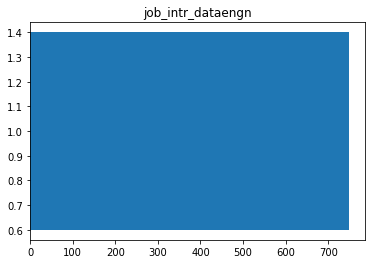

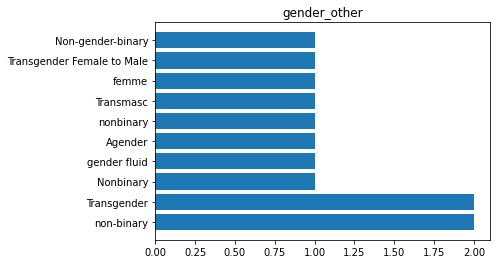

In [79]:
for col in above_nullThreshold:
    plt.barh(newCoderSurvey[col].value_counts().index,newCoderSurvey[col].value_counts().values)
    plt.title(col)
    plt.show()

Three of the article are meant to be binary values and thus explain their high null count. One of the columns (communitie_time) doesn't look of interest so it'll be dropped. Given that the other questions will still be useful in answering the question. THe rest of the nulls will be filled with a False value given their high % of nulls.

In [80]:
newCoderSurvey['gender_other'].unique()

array([nan, 'gender fluid', 'Transgender', 'femme', 'Nonbinary',
       'Agender', 'non-binary', 'Non-gender-binary', 'nonbinary',
       'Transmasc', 'Transgender Female to Male'], dtype=object)

In [81]:
# turning into two values (gender other or none)
newCoderSurvey['gender_other']= newCoderSurvey['gender_other'].fillna('None').apply(lambda x:
                                                            'Gender - Other' if x != 'None' else x)

# summing together columns 
newCoderSurvey['Gender'] = newCoderSurvey[['gender_other', 'gender']].fillna('None').applymap(
    lambda x: '' if x=='None' else x).sum(1)

#dropping redundant columns
newCoderSurvey.drop(columns=['gender_other', 'gender'], inplace=True)
newCoderSurvey.head()

,job_intr_dataengn,job_intr_datasci,expected_earn,hours_learning,months_programming,bootcamp_attend,age,is_ethnic_minority,school_degree,school_major,curr_field,last_yr_income,is_self_employed,is_recv_disab_bnft,learning_platform,Gender
0,1.0,1.0,70000.0,6.0,9,0.0,37,1.0,"some college credit, no degree",Cyber/Computer Forensics and Counterterrorism,construction and extraction,30000.0,1.0,0.0,"[Traversy Media, freeCodeCamp, Stack Overflow]",Male
1,NaN,1.0,75000.0,15.0,12,0.0,54,1.0,Ph.D.,Microbiology,health care,95000.0,1.0,0.0,Udemy,Male
2,1.0,1.0,55000.0,1.0,6,1.0,29,1.0,bachelor's degree,Computer Science,software development and IT,40000.0,1.0,0.0,"[Lynda.com, Khan Academy, Udemy, Udacity, free...",Male
3,1.0,1.0,80000.0,NaN,1,0.0,27,1.0,high school diploma or equivalent (GED),NaN,software development and IT,22000.0,0.0,0.0,"[Pluralsight, SoloLearn, freeCodeCamp]",Male
4,NaN,1.0,40000.0,3.0,8,0.0,31,0.0,bachelor's degree,Marketing,sales,40000.0,1.0,0.0,"[Treehouse, Codecademy, EdX, Stack Overflow]",Male


In [82]:
newCoderSurvey.isnull().sum()/ len(newCoderSurvey) 

job_intr_dataengn     0.373746
job_intr_datasci      0.214047
expected_earn         0.042642
hours_learning        0.046823
months_programming    0.000000
bootcamp_attend       0.005853
age                   0.000000
is_ethnic_minority    0.003344
school_degree         0.004181
school_major          0.117893
curr_field            0.076087
last_yr_income        0.103679
is_self_employed      0.040970
is_recv_disab_bnft    0.003344
learning_platform     0.000000
Gender                0.000000
dtype: float64

Now let's focus on columns with null values below the 25% theshold.

In [83]:
#if null retrieve colum nanme
newCoderNulls =newCoderSurvey.columns[(newCoderSurvey.isnull()==True).any()]

#retrieve mode for object type columns
newCoderNullsObject = newCoderSurvey[newCoderNulls].describe(include='object').loc['top'].to_dict()

#if an object type column impute nulls using their respective mode
newCoderSurvey[list(newCoderNullsObject.keys())]=newCoderSurvey[
    list(newCoderNullsObject.keys())].fillna(newCoderNullsObject)

#checking general summary statistic of numerical columns w/ nulls
newCoderSurvey[newCoderNulls].describe()

,job_intr_dataengn,job_intr_datasci,expected_earn,hours_learning,bootcamp_attend,is_ethnic_minority,last_yr_income,is_self_employed,is_recv_disab_bnft
count,749.0,940.0,1145.000000,1140.000000,1189.000000,1192.000000,1072.000000,1147.000000,1192.000000
mean,1.0,1.0,66055.853275,10.613158,0.038688,0.317114,40631.025187,0.571055,0.027685
std,0.0,0.0,61524.520770,10.760641,0.192931,0.465548,32407.334463,0.495141,0.164136
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,50000.000000,4.000000,0.000000,0.000000,20000.000000,0.000000,0.000000
50%,1.0,1.0,60000.000000,8.000000,0.000000,0.000000,35000.000000,1.000000,0.000000
75%,1.0,1.0,75000.000000,15.000000,0.000000,1.000000,54000.000000,1.000000,0.000000
max,1.0,1.0,1000000.000000,105.000000,1.000000,1.000000,500000.000000,1.000000,1.000000


Except for the expected earning,learning hours, and last year income column, the columns containing null values have binary values. We'll assume that the null values meant that there was no response from the survey respondent and thus most likely was a "no" or "false" on their part. The other two columns will be imputed using the mean as the value hardly differ from the median.

In [84]:
newCoderSurvey=newCoderSurvey.fillna(0)

newCoderSurvey[['expected_earn', 'hours_learning', 'last_yr_income']]= newCoderSurvey[
           ['expected_earn', 'hours_learning', 'last_yr_income']].fillna(
           round(newCoderSurvey[['expected_earn', 'hours_learning',  'last_yr_income']].mean(0))) #imputing with mean

In [85]:
newCoderSurvey[newCoderNulls].isnull().sum()

job_intr_dataengn     0
job_intr_datasci      0
expected_earn         0
hours_learning        0
bootcamp_attend       0
is_ethnic_minority    0
school_degree         0
school_major          0
curr_field            0
last_yr_income        0
is_self_employed      0
is_recv_disab_bnft    0
dtype: int64

In [86]:
missing_values(newCoderSurvey)

learning_platform


C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[]

Laslty we'll turn the months programiing column into years. This will be of use later in the analysis.

In [87]:
newCoderSurvey['years_programming']=newCoderSurvey['months_programming'].apply(
    lambda x: round(int(x)/12,1) if type(x)!=str else x)

newCoderSurvey.drop(columns='months_programming',inplace=True)

newCoderSurvey.head()

,job_intr_dataengn,job_intr_datasci,expected_earn,hours_learning,bootcamp_attend,age,is_ethnic_minority,school_degree,school_major,curr_field,last_yr_income,is_self_employed,is_recv_disab_bnft,learning_platform,Gender,years_programming
0,1.0,1.0,70000.0,6.0,0.0,37,1.0,"some college credit, no degree",Cyber/Computer Forensics and Counterterrorism,construction and extraction,30000.0,1.0,0.0,"[Traversy Media, freeCodeCamp, Stack Overflow]",Male,0.8
1,0.0,1.0,75000.0,15.0,0.0,54,1.0,Ph.D.,Microbiology,health care,95000.0,1.0,0.0,Udemy,Male,1.0
2,1.0,1.0,55000.0,1.0,1.0,29,1.0,bachelor's degree,Computer Science,software development and IT,40000.0,1.0,0.0,"[Lynda.com, Khan Academy, Udemy, Udacity, free...",Male,0.5
3,1.0,1.0,80000.0,0.0,0.0,27,1.0,high school diploma or equivalent (GED),Computer Science,software development and IT,22000.0,0.0,0.0,"[Pluralsight, SoloLearn, freeCodeCamp]",Male,0.1
4,0.0,1.0,40000.0,3.0,0.0,31,0.0,bachelor's degree,Marketing,sales,40000.0,1.0,0.0,"[Treehouse, Codecademy, EdX, Stack Overflow]",Male,0.7


# 2.4 Kaggle Survey

In [88]:
(kaggleSurvey.isnull().sum().sort_values(ascending=False) / len(kaggleSurvey)*100).head(15)

Q33_Part_9     99.853157
Q29_Part_5     99.779736
Q18_Part_11    99.632893
Q29_Part_8     99.559471
Q32_Part_9     99.486050
Q33_Part_10    99.486050
Q29_Part_10    99.192364
Q33_Part_12    98.972100
Q29_Part_12    98.825257
Q29_Part_9     98.751836
Q18_Part_8     98.751836
Q32_Part_6     98.751836
Q9_Part_7      98.751836
Q29_Part_7     98.678414
Q33_Part_5     98.678414
dtype: float64

The apporach here will be similar to that of the devecosystem.  Those with few values will be listed as other.

In [89]:
kaggleSurvey=kaggleSurvey.fillna(False)
#-1 is a missing value and thus will be transformed into a False value
kaggleSurvey = kaggleSurvey.applymap(lambda x: False if x==-1 or x=='-1' else x)

missing_values(kaggleSurvey)

C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[]

No missing values. Next up is reformatting some of the columns.

In [90]:
# questions_answer format is hard to work with will instead merge all answers into one coherent column
#the column will contain a list of answers the repsondent selected
kaggleSurveyQuestions=kaggleSurveyQuestions.to_dict()

kaggleSurveyQuestions['Q19']

{0: 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'}

In [91]:
def add_mainColumn(df,col):
    #any false values turn into an empty string, filter them out and all else keep into a list
    new_column = df[col].applymap(lambda x: '' 
                                    if x == False else (str(x))
                                   ).apply(lambda x: [i for i in x if i !=''] ,  1)
    return new_column

In [92]:
#retrieve relevant main questions (based on present ones in the dataframe)
kaggleSurveyQuestions={i:kaggleSurveyQuestions.get(i) for i in set([i.split("_")[0] for i in kaggleSurvey.columns])}
kaggleSurveyQuestions['Q19'][0]

'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'

In [93]:
for main_question in kaggleSurveyQuestions:
    question_related_columns = [col for col in kaggleSurvey.columns if col.split("_")[0] == main_question]
    new_column = add_mainColumn(kaggleSurvey, question_related_columns)

    kaggleSurvey[kaggleSurveyQuestions[main_question][0]] =new_column

In [94]:
kaggleSurvey.iloc[:,-10:].head()

,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,What is your current yearly compensation (approximate $USD)?,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,What is the size of the company where you are employed?
0,[],[],"[Local development environments (RStudio, Jupy...","[80,000-89,999]",[Python],[],[],[Data Scientist],[3-5 years],"[> 10,000 employees]"
1,[Microsoft SQL Server],[None],"[Basic statistical software (Microsoft Excel, ...","[125,000-149,999]",[SQL],[ Salesforce Cloud ],[None],[Data Analyst],[10-20 years],[50-249 employees]
2,[SQLite],[Teradata],"[Local development environments (RStudio, Jupy...","[150,000-199,999]",[Python],[ Amazon Web Services (AWS) ],[None],[Data Scientist],[5-10 years],"[1000-9,999 employees]"
3,"[PostgresSQL, AWS Relational Database Service]","[Google BigQuery, AWS Redshift, Databricks, AW...","[Local development environments (RStudio, Jupy...","[100,000-124,999]",[SQL],"[ Google Cloud Platform (GCP) , Amazon Web Se...","[ Databricks AutoML , Auto-Keras ]",[Data Analyst],[3-5 years],[250-999 employees]
4,"[MySQL, SQLite, Google Cloud SQL]","[Google BigQuery, Google Cloud Dataflow, Googl...","[Cloud-based data software & APIs (AWS, GCP, A...","[200,000-249,999]",[Python],[ Google Cloud Platform (GCP) ],"[ Auto-Keras , Auto-Sklearn ]",[Data Scientist],[5-10 years],"[> 10,000 employees]"


In [95]:
#drop columns used to aggregate the above columns
to_keep  =[col for col in kaggleSurvey.columns for key in kaggleSurveyQuestions.keys() if col in kaggleSurveyQuestions.get(key)[0]]

kaggleSurvey=kaggleSurvey[to_keep]

#if empty list turn into false; else if a list, then take unique values using set and turn back into a list
kaggleSurvey=kaggleSurvey.applymap(lambda x: False if x==[] else 
                                     list(set(x)) if type(x)==list else x)

kaggleSurvey.head()

,What is your gender? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,What is your age (# years)?,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Approximately how many individuals are responsible for data science workloads at your place of business?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,What is your current yearly compensation (approximate $USD)?,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,What is the size of the company where you are employed?
0,[Female],"[ Matplotlib , Plotly / Plotly Express ]",[Build prototypes to explore applying machine ...,False,[22-24],"[Udemy, University Courses (resulting in a uni...",False,[Bachelor’s degree],[20+],[Python],False,False,"[Local development environments (RStudio, Jupy...","[80,000-89,999]",[Python],False,False,[Data Scientist],[3-5 years],"[> 10,000 employees]"
1,[Female],"[ Seaborn , Matplotlib , Other, 0, Ggplot / ...",[Analyze and understand data to influence prod...,[None],[50-54],"[Coursera, edX, Other, 1, Udemy]",[None],[Master’s degree],[1-2],"[SQL, R, Python]",[Microsoft SQL Server],[None],"[Basic statistical software (Microsoft Excel, ...","[125,000-149,999]",[SQL],[ Salesforce Cloud ],[None],[Data Analyst],[10-20 years],[50-249 employees]
2,[Male],"[ Matplotlib , Seaborn ]",[Build and/or run a machine learning service t...,[AWS Elastic Compute Cloud (EC2)],[35-39],"[Coursera, edX, Udacity]",[None],[Bachelor’s degree],[20+],"[SQL, Python]",[SQLite],[Teradata],"[Local development environments (RStudio, Jupy...","[150,000-199,999]",[Python],[ Amazon Web Services (AWS) ],[None],[Data Scientist],[5-10 years],"[1000-9,999 employees]"
3,[Male],"[ Matplotlib , Seaborn ]",[Build prototypes to explore applying machine ...,"[AWS Lambda, Google Kubernetes Engine, Google ...",[30-34],"[Coursera, University Courses (resulting in a ...","[Amazon SageMaker, Google Cloud Machine Learni...",[Bachelor’s degree],[3-4],"[Bash, SQL, Python]","[AWS Relational Database Service, PostgresSQL]","[Databricks, AWS Kinesis, Google BigQuery, AWS...","[14, Local development environments (RStudio, ...","[100,000-124,999]",[SQL],"[ Google Cloud Platform (GCP) , Amazon Web Se...","[ Auto-Keras , Databricks AutoML ]",[Data Analyst],[3-5 years],[250-999 employees]
4,[Prefer not to say],"[ Matplotlib , Seaborn , Bokeh ]",[Build and/or run a machine learning service t...,"[Google App Engine, Google Compute Engine (GCE...",[25-29],"[Coursera, University Courses (resulting in a ...",[Google Cloud Machine Lea

In [96]:
#retrieving values out of a list if the lenght of the list is 1
kaggleSurvey=kaggleSurvey.applymap(lambda x: x[0] if x!=False and len(x)==1 else x)
kaggleSurvey.head()

,What is your gender? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,What is your age (# years)?,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Approximately how many individuals are responsible for data science workloads at your place of business?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,What is your current yearly compensation (approximate $USD)?,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,What is the size of the company where you are employed?
0,Female,"[ Matplotlib , Plotly / Plotly Express ]",[Build prototypes to explore applying machine ...,False,22-24,"[Udemy, University Courses (resulting in a uni...",False,Bachelor’s degree,20+,Python,False,False,"[Local development environments (RStudio, Jupy...","80,000-89,999",Python,False,False,Data Scientist,3-5 years,"> 10,000 employees"
1,Female,"[ Seaborn , Matplotlib , Other, 0, Ggplot / ...",[Analyze and understand data to influence prod...,None,50-54,"[Coursera, edX, Other, 1, Udemy]",None,Master’s degree,1-2,"[SQL, R, Python]",Microsoft SQL Server,None,"[Basic statistical software (Microsoft Excel, ...","125,000-149,999",SQL,Salesforce Cloud,None,Data Analyst,10-20 years,50-249 employees
2,Male,"[ Matplotlib , Seaborn ]",[Build and/or run a machine learning service t...,AWS Elastic Compute Cloud (EC2),35-39,"[Coursera, edX, Udacity]",None,Bachelor’s degree,20+,"[SQL, Python]",SQLite,Teradata,"[Local development environments (RStudio, Jupy...","150,000-199,999",Python,Amazon Web Services (AWS),None,Data Scientist,5-10 years,"1000-9,999 employees"
3,Male,"[ Matplotlib , Seaborn ]",[Build prototypes to explore applying machine ...,"[AWS Lambda, Google Kubernetes Engine, Google ...",30-34,"[Coursera, University Courses (resulting in a ...","[Amazon SageMaker, Google Cloud Machine Learni...",Bachelor’s degree,3-4,"[Bash, SQL, Python]","[AWS Relational Database Service, PostgresSQL]","[Databricks, AWS Kinesis, Google BigQuery, AWS...","[14, Local development environments (RStudio, ...","100,000-124,999",SQL,"[ Google Cloud Platform (GCP) , Amazon Web Se...","[ Auto-Keras , Databricks AutoML ]",Data Analyst,3-5 years,250-999 employees
4,Prefer not to say,"[ Matplotlib , Seaborn , Bokeh ]",[Build and/or run a machine learning service t...,"[Google App Engine, Google Compute Engine (GCE...",25-29,"[Coursera, University Courses (resulting in a ...",Google Cloud Machine Learning Engine,Master’s degree,20+,"[Bash, Python]","[Google Cloud SQL, SQLite, MySQL]","[Google BigQuery, Go

Notice that None value is present in some columns. We'll convert the False values in this case to None for plotting reasons. 

In [97]:
kaggleSurvey = kaggleSurvey.applymap(lambda x:  'None' if x ==False else x )
kaggleSurvey.head()

,What is your gender? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,What is your age (# years)?,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Approximately how many individuals are responsible for data science workloads at your place of business?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,What is your current yearly compensation (approximate $USD)?,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,What is the size of the company where you are employed?
0,Female,"[ Matplotlib , Plotly / Plotly Express ]",[Build prototypes to explore applying machine ...,None,22-24,"[Udemy, University Courses (resulting in a uni...",None,Bachelor’s degree,20+,Python,None,None,"[Local development environments (RStudio, Jupy...","80,000-89,999",Python,None,None,Data Scientist,3-5 years,"> 10,000 employees"
1,Female,"[ Seaborn , Matplotlib , Other, 0, Ggplot / ...",[Analyze and understand data to influence prod...,None,50-54,"[Coursera, edX, Other, 1, Udemy]",None,Master’s degree,1-2,"[SQL, R, Python]",Microsoft SQL Server,None,"[Basic statistical software (Microsoft Excel, ...","125,000-149,999",SQL,Salesforce Cloud,None,Data Analyst,10-20 years,50-249 employees
2,Male,"[ Matplotlib , Seaborn ]",[Build and/or run a machine learning service t...,AWS Elastic Compute Cloud (EC2),35-39,"[Coursera, edX, Udacity]",None,Bachelor’s degree,20+,"[SQL, Python]",SQLite,Teradata,"[Local development environments (RStudio, Jupy...","150,000-199,999",Python,Amazon Web Services (AWS),None,Data Scientist,5-10 years,"1000-9,999 employees"
3,Male,"[ Matplotlib , Seaborn ]",[Build prototypes to explore applying machine ...,"[AWS Lambda, Google Kubernetes Engine, Google ...",30-34,"[Coursera, University Courses (resulting in a ...","[Amazon SageMaker, Google Cloud Machine Learni...",Bachelor’s degree,3-4,"[Bash, SQL, Python]","[AWS Relational Database Service, PostgresSQL]","[Databricks, AWS Kinesis, Google BigQuery, AWS...","[14, Local development environments (RStudio, ...","100,000-124,999",SQL,"[ Google Cloud Platform (GCP) , Amazon Web Se...","[ Auto-Keras , Databricks AutoML ]",Data Analyst,3-5 years,250-999 employees
4,Prefer not to say,"[ Matplotlib , Seaborn , Bokeh ]",[Build and/or run a machine learning service t...,"[Google App Engine, Google Compute Engine (GCE...",25-29,"[Coursera, University Courses (resulting in a ...",Google Cloud Machine Learning Engine,Master’s degree,20+,"[Bash, Python]","[Google Cloud SQL, SQLite, MySQL]","[Google BigQuery, Google C

Lastly, the kaggle survey dataframes column will be renamed to make it easier to work with.

In [98]:
kaggleColumnMap={'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'jobTitle',
       'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice':'datVizLibrariesUsed',
       'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice':'cloudComputingProduct_usedRegularly',
       'What is your gender? - Selected Choice':'gender',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'highestEduWithin2years',
       'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice':'bigDataProducts_usedRegularly',
       'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice':  'ML_Products_usedRegularly',
       'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice':'relationalDB_usedRegularly',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice': 'platformCourses',
       'What is your age (# years)?': 'age',
       'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice': 'primaryDataAnalysisTool',
       'How long have you been writing code to analyze data (at work or at school)?':'codingExperience',
       'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice':'MLtool_usedRegularly',
       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice':'programmingLang_usedRegularly',
       'What is the size of the company where you are employed?': 'company_size',
       'Approximately how many individuals are responsible for data science workloads at your place of business?': 'dataScienceEmployees',
       'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice':'recommendedProgrammingLanguageLearn',
       'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice':'cloudComputingPlatform_usedRegularly',
       'What is your current yearly compensation (approximate $USD)?':'salary?',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice':'activitiesImportantWork'}

In [99]:
#retrieve the shorted column name using a key:value pair
kaggleSurvey.columns=[kaggleColumnMap[col] for col in kaggleSurvey.columns]
kaggleSurvey

,gender,datVizLibrariesUsed,activitiesImportantWork,cloudComputingProduct_usedRegularly,age,platformCourses,ML_Products_usedRegularly,highestEduWithin2years,dataScienceEmployees,programmingLang_usedRegularly,relationalDB_usedRegularly,bigDataProducts_usedRegularly,primaryDataAnalysisTool,salary?,recommendedProgrammingLanguageLearn,cloudComputingPlatform_usedRegularly,MLtool_usedRegularly,jobTitle,codingExperience,company_size
0,Female,"[ Matplotlib , Plotly / Plotly Express ]",[Build prototypes to explore applying machine ...,None,22-24,"[Udemy, University Courses (resulting in a uni...",None,Bachelor’s degree,20+,Python,None,None,"[Local development environments (RStudio, Jupy...","80,000-89,999",Python,None,None,Data Scientist,3-5 years,"> 10,000 employees"
1,Female,"[ Seaborn , Matplotlib , Other, 0, Ggplot / ...",[Analyze and understand data to influence prod...,None,50-54,"[Coursera, edX, Other, 1, Udemy]",None,Master’s degree,1-2,"[SQL, R, Python]",Microsoft SQL Server,None,"[Basic statistical software (Microsoft Excel, ...","125,000-149,999",SQL,Salesforce Cloud,None,Data Analyst,10-20 years,50-249 employees
2,Male,"[ Matplotlib , Seaborn ]",[Build and/or run a machine learning service t...,AWS Elastic Compute Cloud (EC2),35-39,"[Coursera, edX, Udacity]",None,Bachelor’s degree,20+,"[SQL, Python]",SQLite,Teradata,"[Local development environments (RStudio, Jupy...","150,000-199,999",Python,Amazon Web Services (AWS),None,Data Scientist,5-10 years,"1000-9,999 employees"
3,Male,"[ Matplotlib , Seaborn ]",[Build prototypes to explore applying machine ...,"[AWS Lambda, Google Kubernetes Engine, Google ...",30-34,"[Coursera, University Courses (resulting in a ...","[Amazon SageMaker, Google Cloud Machine Learni...",Bachelor’s degree,3-4,"[Bash, SQL, Python]","[AWS Relational Database Service, PostgresSQL]","[Databricks, AWS Kinesis, Google BigQuery, AWS...","[14, Local development environments (RStudio, ...","100,000-124,999",SQL,"[ Google Cloud Platform (GCP) , Amazon Web Se...","[ Auto-Keras , Databricks AutoML ]",Data Analyst,3-5 years,250-999 employees
4,Prefer not to say,"[ Matplotlib , Seaborn , Bokeh ]",[Build and/or run a machine learning service t...,"[Google App Engine, Google Compute Engine (GCE...",25-29,"[Coursera, University Courses (resulting in a ...",Google Cloud Machine Learning Engine,Master’s degree,20+,"[Bash, Python]","[Google Cloud SQL, SQLite, MySQL]","[Google BigQuery, Google Cloud Pub/Sub, Google...","[6, Cloud-based data software & APIs (AWS, GCP...","200,000-249,999",Python,Google Cloud Platform (GCP),"[ Auto-Keras , Auto-Sklearn ]",Data Scientist,5-10 years,"> 10,000 employees"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,Male,None,[Build prototypes to explore applying machine ...,None,25-29,DataQuest,None,Master’s degree,1-2,None,None,None,None,$0-999,None,None,None,Data Scientist,None,0-49 employees
1358,Female,None,None,None,40-44,None,None,Master’s degree,20+,None,None,None,None,None,None,None,None,Business Analyst,None,"> 10,000 employees"
1359,Male,None,None,None,30-34,"[Other, Kaggle Courses (i.e. Kaggle Learn)]",None,Doctoral degree,5-9,None,None,None,"[Basic statistical software (Microsoft Excel, ...","40,000-49,999",None,None,None,Data Scientist,< 1 years,"1000-9,999 employees"
1360,Female,None,None,None,22-24,None,None,Master’s degree,10-14,None,None,None,None,"15,000-19,999",None,None,None,Data Analyst,None,250-999 employees


# 3 Initial Data Exploration

## Last main cleaning step. Exploring the data for further cleaning steps. 

In [100]:
def count_valuesUpdateDictionary(x, counts):
    #if numerical, check if null 
    if x=='nan' or x==None or (type(x) in [float, int] and math.isnan(x)): 
        return counts
    
    #if not null 
    counts.setdefault(x, 0)
    counts[x] = counts.get(x,0)+1
    return counts

In [101]:
def count_values(df, columnName, noFalse=None):
    """ Custom count values function that takes into account a list's inner values.

    Args:
        df (pd.Dataframe): dataframe of interest
        columnName (str): column of interest
        noFalse(varies, optional): the value to ignore
    Return:
        dict: a dictionary with all the values and their respective counts 
    """
   
    counts={}
    for val in df[columnName].values:
        if isinstance(val,(np.ndarray, list)):#if a list
            for i in val:
                if isinstance(i,(np.ndarray, list)): #if a sublist
                    for sub in i: 
                        counts= count_valuesUpdateDictionary(sub, counts)
                else:  #if not a sublist  
                    counts = count_valuesUpdateDictionary(i, counts)
        else: 
            counts =count_valuesUpdateDictionary(val, counts)
            
    if noFalse != None: 
        #filter out the value to ignore, typically a False value
        return  {i[0]:i[1] for i in counts.items() if i[0] != noFalse}
    return counts

Let's start by assessing the value counts per each column for the Developer Ecosystem survey. 

In [102]:
len(devecosystemSurvey.columns)

17

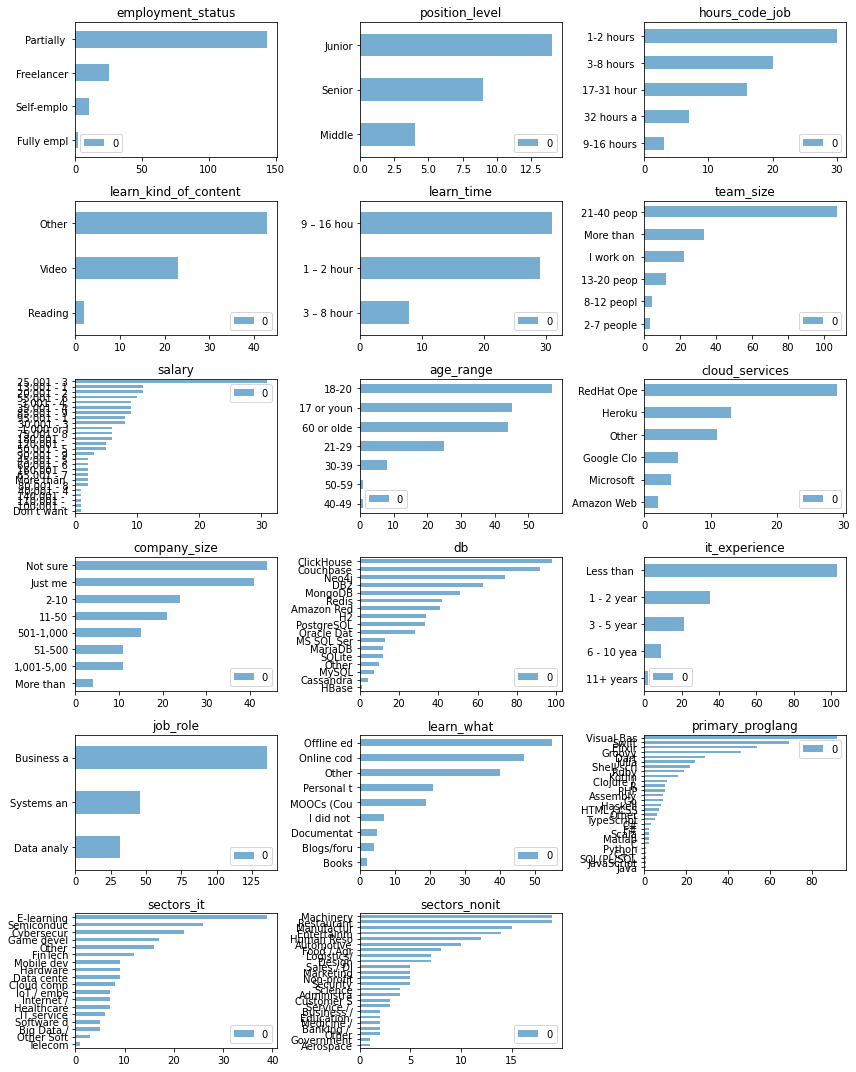

In [103]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=3, nrows=6)

axes = [(row, col) for row in range(6) for col in range(3)]

for col, i in zip(devecosystemSurvey.columns, axes):
    #unique values and their counts per column
    counts = count_values(devecosystemSurvey, col, noFalse='None')
    #bar plot
    pd.DataFrame(counts.values(),counts.keys()).sort_values(0).plot.barh(figsize=(12,15),ax=ax[i], rot=0, alpha=.6)
    #show max of 10 characters on y ticklabels
    ax[i].set_yticklabels([x[:10] for x in counts.keys()])
    ax[i].set_title(col)

#turn off the last chart value as it's empty
ax[axes[-1]].axis('off')
plt.tight_layout()

Dataframe is relatively clean (in terms of values). On to the next one.

In [104]:
len(kaggleSurvey.columns)

20

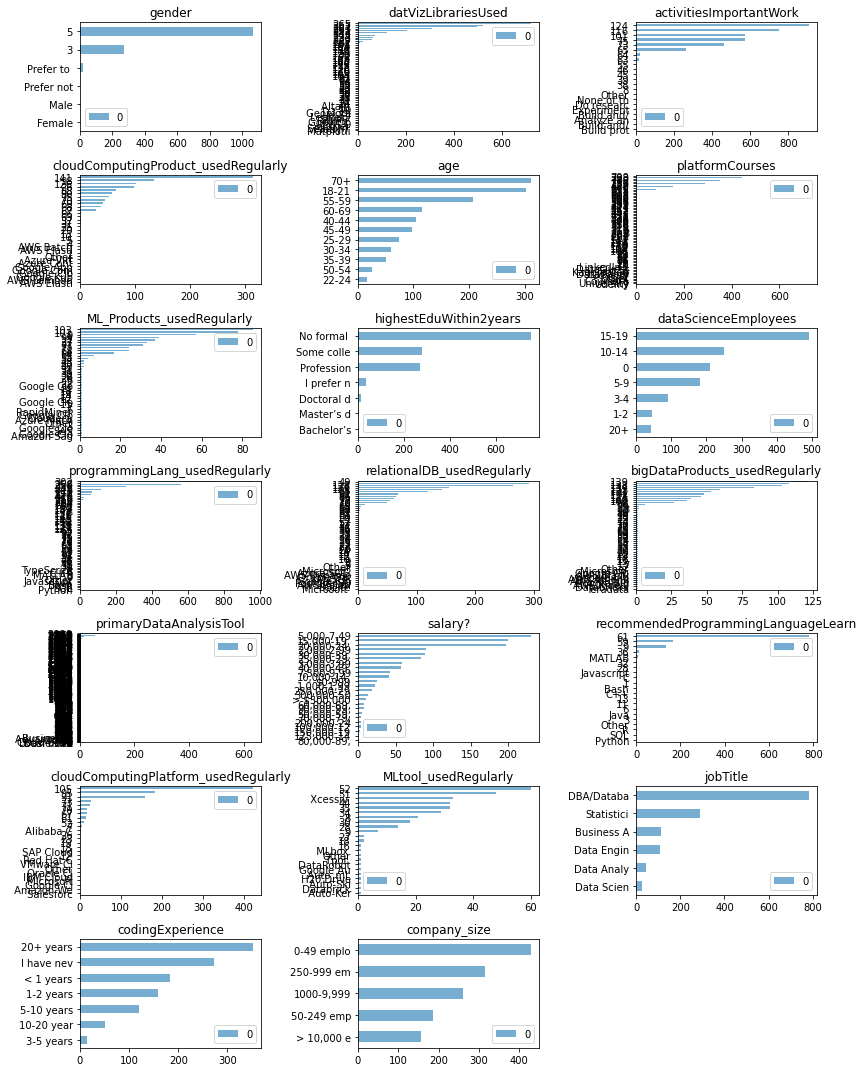

In [105]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=3, nrows=7)

axes = [(row, col) for row in range(7) for col in range(3)]

for col, i in zip(kaggleSurvey.columns, axes):
    counts = count_values(kaggleSurvey, col, noFalse='None')
    pd.DataFrame(counts.values(),counts.keys()).sort_values(0).plot.barh(figsize=(12,15),ax=ax[i], rot=0, alpha=.6)
    #show max of 10 characters on y ticklabels
    ax[i].set_yticklabels([x[:10] for x in counts.keys()])
    ax[i].set_title(col)

#turn off the last chart value as it's empty
ax[axes[-1]].axis('off')
plt.tight_layout()

The dataframe still needs cleaning. In particular, the main focus here will be on reducing the number answers for questions that pertain to multiple choice questions. For exampe in the last viz (data viz libraries used on a regular basis), it's be better to aggregate all the digits as other as the survey probably had that as options for viz libraries not commonly used. 

In [106]:
def reduceValues(df,col):
    #turning all value with digits into "Other"
    modified_column = []
    for index, values in df[col].iteritems():
        #for list values
        if type(values) == list: 
            list_vals = []
            for val in values:
                if str(val).isdigit():  list_vals.append("Other") #turn digit into other
                else: list_vals.append(val) 
            modified_column.append(list_vals)
            
        else:  modified_column.append(values)
    return modified_column

In [107]:
for col in kaggleSurvey.columns:
    kaggleSurvey[col] = reduceValues(kaggleSurvey, col)

Let's check the value counts for the dataframe now.

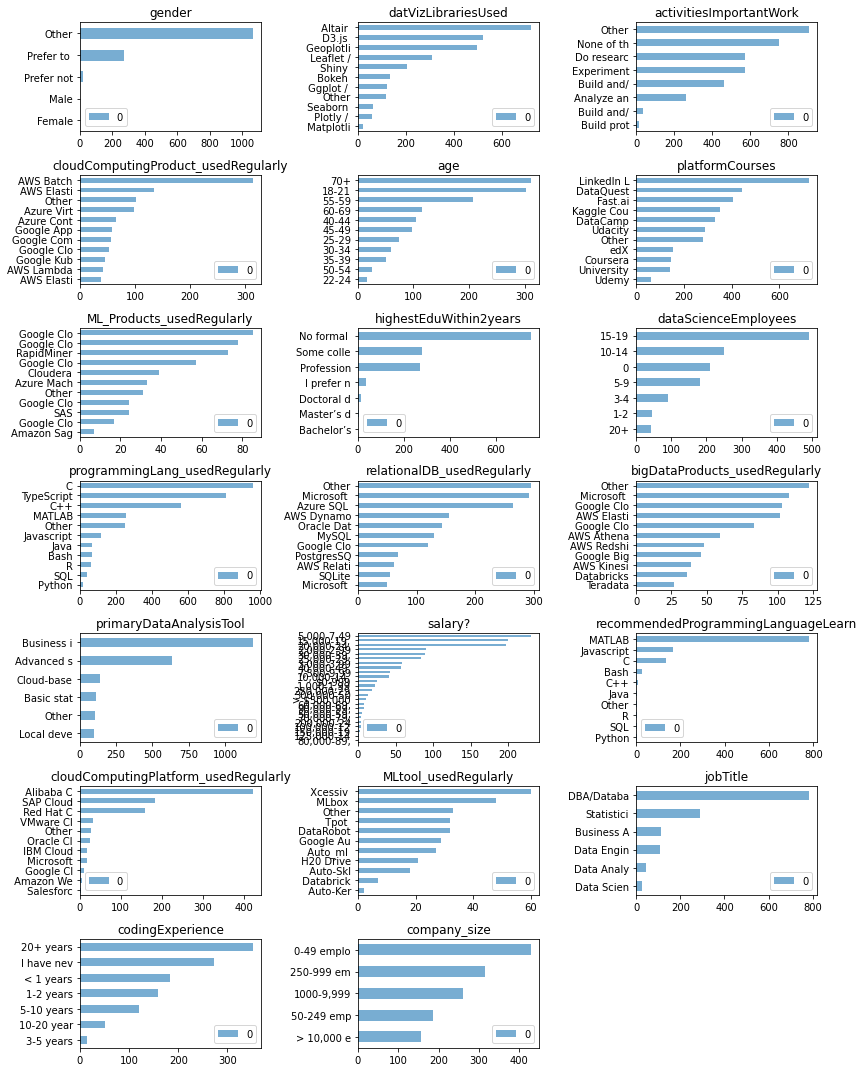

In [108]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=3, nrows=7)

for col, i in zip(kaggleSurvey.columns, axes):
    counts = count_values(kaggleSurvey, col, noFalse='None')
    pd.DataFrame(counts.values(),counts.keys()).sort_values(0).plot.barh(figsize=(12,15),ax=ax[i], rot=0, alpha=.6)

    ax[i].set_yticklabels([x[:10] for x in counts.keys()])
    ax[i].set_title(col)

ax[axes[-1]].axis('off')
plt.tight_layout()

Much better! 

NOTE: Continuing the same procedures with the other 2 dataframe

In [109]:
len(newCoderSurvey.columns)

16

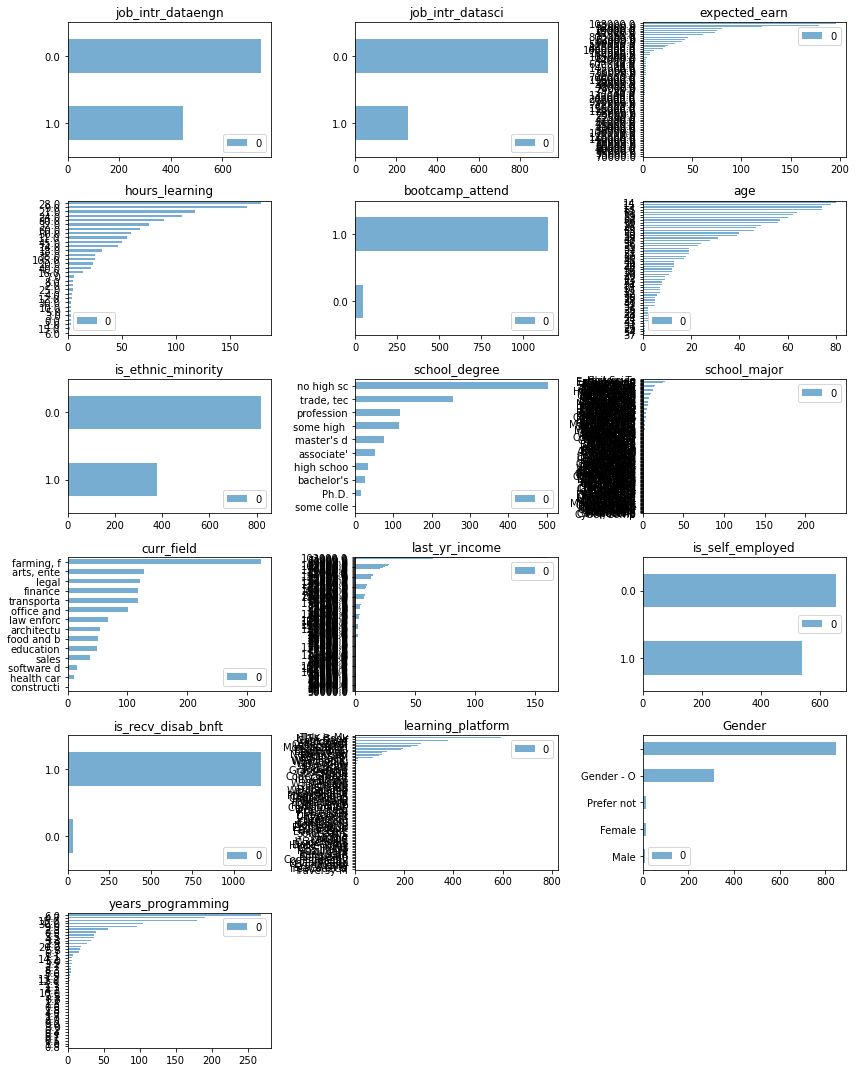

In [110]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=3, nrows=6)
axes = [(row, col) for row in range(6) for col in range(3)]

for col, i in zip(newCoderSurvey.columns, axes):
    counts = count_values(newCoderSurvey, col,noFalse='None')
    pd.DataFrame(counts.values(),counts.keys()).sort_values(0).plot.barh(figsize=(12,15),ax=ax[i], rot=0, alpha=.6)
    
    ax[i].set_yticklabels([x[:10] if type(x) ==str else x for x in counts.keys()])
    ax[i].set_title(col)

[ax[axes[i]].axis('off') for i in [-1,-2]]
plt.tight_layout()

The dataframe needs some cleaning but we'll save that for the next step.

In [111]:
len(stackoverflowSurvey.columns)

19

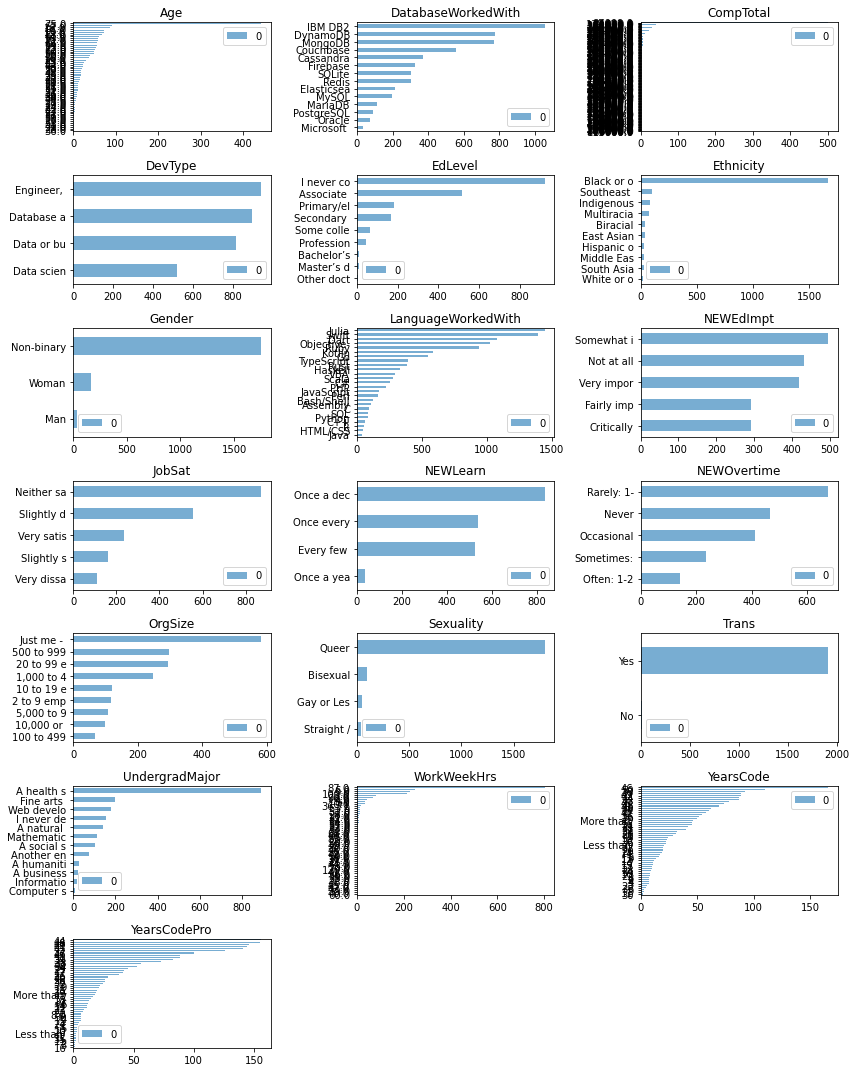

In [112]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=3, nrows=7)
axes = [(row, col) for row in range(7) for col in range(3)]

for col, i in zip(stackoverflowSurvey.columns, axes):
    counts= count_values(stackoverflowSurvey, col,noFalse='None')
    pd.DataFrame(counts.values(),counts.keys()).sort_values(0).plot.barh(figsize=(12,15),ax=ax[i], rot=0, alpha=.6)

    ax[i].set_yticklabels([x[:10] if type(x) ==str else x for x in counts.keys()])
    ax[i].set_title(col)

[ax[axes[i]].axis('off') for i in [-1,-2]]
plt.tight_layout()

This dataframe will also need some cleaning. For now, will reduce one column. 

Combining sexxuality and trans column into one. Where trans is selected, the vaue will be appended to sexuality column.

In [113]:
stackoverflowSurvey['Trans'] = stackoverflowSurvey['Trans'].apply(lambda x: 'Trans' if x=='Yes' else '')

In [114]:
def combineSexuality(trans, sexuality):
    if trans == 'Trans' :
        if type(sexuality)==list: 
            return sexuality.append(trans)
        else: return [sexuality, trans]
    #if trans is not, just return sexuality
    else: return sexuality

In [115]:
stackoverflowSurvey['sexuality'] = stackoverflowSurvey[
    ['Trans', 'Sexuality']].apply(lambda x: combineSexuality(x[0], x[1]),1)

count_values(stackoverflowSurvey,'sexuality')

{'Straight / Heterosexual': 1800,
 'Gay or Lesbian': 43,
 'Bisexual': 93,
 'Queer': 33,
 'Trans': 13}

In [116]:
#dropping redundant columns
stackoverflowSurvey=stackoverflowSurvey.drop(columns=['Trans','Sexuality'])

The stackoverflowsurvey dataframe also needs some further cleaning steps of which will be taken care of in the next step.

# Job Map

Making a detailed profile for each job title that includes the following information:

     [hard skills, salary, experience, self-development and learning, educational background ]
     
By retrieving the relevant columns we'll be able to format and then plot a horizontal bar chart showing the top 5 values per variable. This will enable us to see what common values their are for the previously listed list variables (ie. common salary) per job title. 

In [117]:
#storing dataframes into a list for ease of use
dataframes = [newCoderSurvey, kaggleSurvey, devecosystemSurvey, stackoverflowSurvey]

In [118]:
print([list(df.columns) for df in dataframes])

[['job_intr_dataengn', 'job_intr_datasci', 'expected_earn', 'hours_learning', 'bootcamp_attend', 'age', 'is_ethnic_minority', 'school_degree', 'school_major', 'curr_field', 'last_yr_income', 'is_self_employed', 'is_recv_disab_bnft', 'learning_platform', 'Gender', 'years_programming'], ['gender', 'datVizLibrariesUsed', 'activitiesImportantWork', 'cloudComputingProduct_usedRegularly', 'age', 'platformCourses', 'ML_Products_usedRegularly', 'highestEduWithin2years', 'dataScienceEmployees', 'programmingLang_usedRegularly', 'relationalDB_usedRegularly', 'bigDataProducts_usedRegularly', 'primaryDataAnalysisTool', 'salary?', 'recommendedProgrammingLanguageLearn', 'cloudComputingPlatform_usedRegularly', 'MLtool_usedRegularly', 'jobTitle', 'codingExperience', 'company_size'], ['employment_status', 'position_level', 'hours_code_job', 'learn_kind_of_content', 'learn_time', 'team_size', 'salary', 'age_range', 'cloud_services', 'company_size', 'db', 'it_experience', 'job_role', 'learn_what', 'primar

From the available columns (see above) the following are the ones that'll be used. The columns will be stored as a dictionary with the column names being the keys and the common variable(ie. gender) as their values.

In [119]:
dfColumnsForJobMap =[
    {'job_intr_dataengn':'dataengn', 'job_intr_datasci':'datasci', 'expected_earn':'salary',
   'years_programming':'experience', 'school_degree':'edu', 'learning_platform':'learning',
     'bootcamp_attend':'bootcamp_attended'},
    {'codingExperience':'experience', 'highestEduWithin2years':'edu', 'programmingLang_usedRegularly':'Progskills',
        'jobTitle':'title','recommendedPorgrammingLanguageLearn': 'recommendedProgrammingLanguageLearn', 
        'cloudComputingPlatform_usedRegularly':'CloudSkills', 'relationalDB_usedRegularly':'DBskills',
         'salary?':'salary', 'primaryDataAnalysisTool':'dataTool', 'platformCourses':'learning'},
{'job_role':'title', 'primary_proglang':'Progskills','cloud_services':'CloudSkills',
        'position_level':'career path', 'salary':'salary',
         'learn_what':'learning', 'it_experience':'experiencePro'},
{'DatabaseWorkedWith':'DBskills', 'CompTotal':'salary', 'DevType':'title', 'EdLevel':'edu',
       'LanguageWorkedWith':'Progskills', 
        'YearsCode':'experience', 'YearsCodePro':'experiencePro'}
] 

In [120]:
jobMap1 =dataframes[0].rename(columns= dfColumnsForJobMap[0])[dfColumnsForJobMap[0].values()]
jobMap2=dataframes[1].rename(columns= dfColumnsForJobMap[1])[dfColumnsForJobMap[1].values()]
jobMap3=dataframes[2].rename(columns= dfColumnsForJobMap[2])[dfColumnsForJobMap[2].values()]
jobMap4=dataframes[3].rename(columns= dfColumnsForJobMap[3])[dfColumnsForJobMap[3].values()]

[df.columns for df in [jobMap1, jobMap2, jobMap3, jobMap4]]

[Index(['dataengn', 'datasci', 'salary', 'experience', 'edu', 'learning',
        'bootcamp_attended'],
       dtype='object'), Index(['experience', 'edu', 'Progskills', 'title',
        'recommendedProgrammingLanguageLearn', 'CloudSkills', 'DBskills',
        'salary', 'dataTool', 'learning'],
       dtype='object'), Index(['title', 'Progskills', 'CloudSkills', 'career path', 'salary',
        'learning', 'experiencePro'],
       dtype='object'), Index(['DBskills', 'salary', 'title', 'edu', 'Progskills', 'experience',
        'experiencePro'],
       dtype='object')]

In [121]:
jobMap = jobMap1.append(jobMap2).append(jobMap3).append(jobMap4)
jobMap=jobMap.reset_index(drop=True)
jobMap.head(2)

,dataengn,datasci,salary,experience,edu,learning,bootcamp_attended,Progskills,title,recommendedProgrammingLanguageLearn,CloudSkills,DBskills,dataTool,career path,experiencePro
0,1.0,1.0,70000,0.8,"some college credit, no degree","[Traversy Media, freeCodeCamp, Stack Overflow]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,75000,1,Ph.D.,Udemy,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting a sense of the data.

In [122]:
jobMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   dataengn                             1196 non-null   float64
 1   datasci                              1196 non-null   float64
 2   salary                               4670 non-null   object 
 3   experience                           4489 non-null   object 
 4   edu                                  4489 non-null   object 
 5   learning                             2739 non-null   object 
 6   bootcamp_attended                    1196 non-null   float64
 7   Progskills                           3474 non-null   object 
 8   title                                3474 non-null   object 
 9   recommendedProgrammingLanguageLearn  1362 non-null   object 
 10  CloudSkills                          1543 non-null   object 
 11  DBskills                      

Roughly 5.3k rows with some be having severely less non-null values than others. This makes sense as the dataframes have different shapes.

In [123]:
#printing out columns with more than 8 unique values
for col in jobMap.columns:
    try: 
        valueCounts =jobMap[col].nunique()
    except:
        valueCounts = len(count_values(jobMap,col))
    if valueCounts > 8:
        print(col, valueCounts)

salary 368
experience 94
edu 26
learning 103
Progskills 39
title 13
recommendedProgrammingLanguageLearn 11
CloudSkills 17
DBskills 23
experiencePro 55


After taking a look at these columns, the following are the ones that will be of focus in preprocessing. 

Data job title will be handled later and for some, they were found to have distinct values that were better left as is.

In [124]:
toFormat=['experiencePro','Progskills','edu','experience','salary', 'learning_time']

In [125]:
print(count_values(jobMap,'experiencePro').keys())

dict_keys(['11+ years', '6 - 10 years', 'None', '3 - 5 years', '1 - 2 years', 'Less than 1 year', 16, 3, 2, 11, 35, 12, 20, 10, 5, 1, 24, 15, 4, 30, 8.0, 21, 23, 22, 14, 6, 33, 18, 7, 'More than 50 years', 19, 25, 13, 9, 32, 36, 28, 40, 26, 17, 27, 29, 34, 42, 38, 39, 31, 43, 46, 37, 45, 41, 49, 48, 44])


Here are how the columns will be categorized into: 0-2, 3-5, 6-10, 11+years

In [126]:
def years_pro(x):
    if type(x)==str or x =='None':
        if x =='Less than 1 year' or x=='1 - 2 years': return '0 - 2 years'
        elif x=='More than 50 years': return  '11+ years'
        else: return x
    elif x <= 2:
        return '0 - 2 years'
    elif x>2 and x <=5:
        return '3 - 5 years'
    elif x>5 and x <=10:
        return '6 - 10 years'
    else: return '11+ years'


In [127]:
#categorizing the experience pro columns
jobMap[toFormat[0]] = jobMap[toFormat[0]].fillna('None').apply(lambda x: years_pro(x))
jobMap[toFormat[0]].value_counts()

None            2569
11+ years        800
6 - 10 years     520
3 - 5 years      487
0 - 2 years      294
Name: experiencePro, dtype: int64

Next up, programming skills.

In [128]:
count_values(jobMap, toFormat[1], noFalse='None').keys()

dict_keys(['Python', 'SQL', 'R', 'Bash', 'Java', 'Javascript', 'Other', 'MATLAB', 'C++', 'TypeScript', 'C', 'JavaScript', 'SQL(PL/SQL, T-SQL and otherprogramming extensions over SQL)', 'Matlab', 'Scala', 'F#', 'C#', 'HTML / CSS', 'Haskell', 'Go', 'Assembly', 'PHP', 'Clojure / ClojureScript', 'Kotlin', 'Ruby', 'Shell scripting languages(bash/shell/powershell)', 'Julia', 'Dart', 'Groovy', 'Elixir', 'Swift', 'Visual Basic', 'HTML/CSS', 'Bash/Shell/PowerShell', 'Perl', 'VBA', 'Rust', 'Objective-C'])

We'll keep the programming languages of interest in the strings column and 

In [129]:
strings = ['Python', 'R', 'Sql', 'Java', 'Javascript', 'Other', 
 'Matlab', 'Typescript', 'Scala', 
 'F#', 'Haskell', 'Go', 'Assembly', 'Php', 'Clojure / Clojurescript', 
 'Kotlin', 'Ruby', 'Julia', 'Dart', 'Groovy', 'Elixir', 'Swift', 'Visual Basic',
  'Objective-C', 'Perl', 'Bash/Shell/PowerShell', 'Rust', 'VBA', 'HTML/CSS']
avoid = ['C','C++','C#']

In [130]:
count_values(jobMap,toFormat[1]).keys()

dict_keys(['Python', 'SQL', 'R', 'Bash', 'None', 'Java', 'Javascript', 'Other', 'MATLAB', 'C++', 'TypeScript', 'C', 'JavaScript', 'SQL(PL/SQL, T-SQL and otherprogramming extensions over SQL)', 'Matlab', 'Scala', 'F#', 'C#', 'HTML / CSS', 'Haskell', 'Go', 'Assembly', 'PHP', 'Clojure / ClojureScript', 'Kotlin', 'Ruby', 'Shell scripting languages(bash/shell/powershell)', 'Julia', 'Dart', 'Groovy', 'Elixir', 'Swift', 'Visual Basic', 'HTML/CSS', 'Bash/Shell/PowerShell', 'Perl', 'VBA', 'Rust', 'Objective-C'])

Here we'll use the fuzzywuzzy (lol creative name) package to work with grouping the same programming language but with different variations. The method used will be the token_set_ratio() method that : 
1. tokenizing the string of interest
2. splits the token into two groups - intersection (where strings in both groups are same) and remainder (any non-matching string). This takes into account strings with varying sizes that convey the same info.
3. sorts each set(non--duplicate set type) in alphabelitcal order and apply “fuzzy” string matching measurement of edit distance function

If a value (from the strings variable- see below) is 90% similar (per the distance function) to each value in the programming language column,  we'll keep them.

In [131]:
def groupSimilarWords(x):
    if x in avoid or x== False or x=='None'  : 
        return x

    if type(x)==list:
        new_word=[]
        for val in x:
            if val in avoid: #skip check if in the avoid list
                    new_word.append(val)
                    continue
           #for the strings variable created earlier                
            for str1 in strings: 
                Token_Set_Ratio = fuzz.token_set_ratio(str1,val)
                if Token_Set_Ratio >90: #threshold set at 90%
                    new_word.append(str1)
        return new_word 
      
    else:
        for str1 in strings:
            Token_Set_Ratio = fuzz.token_set_ratio(str1,x)
            if Token_Set_Ratio >90: 
                return str1
    

In [132]:
jobMap[toFormat[1]]= jobMap[toFormat[1]].apply(lambda x:  groupSimilarWords(x))
count_values(jobMap,'Progskills')

{'Python': 2441,
 'Sql': 2327,
 'R': 966,
 'Bash/Shell/PowerShell': 1211,
 'None': 244,
 'Java': 697,
 'Javascript': 1250,
 'Other': 255,
 'Matlab': 66,
 'C++': 462,
 'Typescript': 335,
 'C': 382,
 'Scala': 179,
 'F#': 1,
 'C#': 573,
 'HTML/CSS': 1046,
 'Haskell': 51,
 'Go': 231,
 'Assembly': 97,
 'Php': 294,
 'Clojure / Clojurescript': 10,
 'Kotlin': 88,
 'Ruby': 172,
 'Julia': 59,
 'Dart': 40,
 'Groovy': 6,
 'Elixir': 1,
 'Swift': 89,
 'Visual Basic': 1,
 'Perl': 108,
 'VBA': 258,
 'Rust': 126,
 'Objective-C': 60}

Let's shift our attention to the next column.

In [133]:
count_values(jobMap, toFormat[2]).keys()

dict_keys(['some college credit, no degree', 'Ph.D.', "bachelor's degree", 'high school diploma or equivalent (GED)', "associate's degree", "master's degree (non-professional)", 'some high school', 'professional degree (MBA, MD, JD, etc.)', 'trade, technical, or vocational training', 'no high school (secondary school)', 'Bachelor’s degree', 'Master’s degree', 'Doctoral degree', 'I prefer not to answer', 'Professional degree', 'Some college/university study without earning a bachelor’s degree', 'No formal education past high school', 'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Professional degree (JD, MD, etc.)', 'Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)', 'I never completed any formal education'])

For preprocessing this, we'll first filter out the parantheses out.

In [134]:
jobMap['edu']=jobMap['edu'].apply(lambda x: x.split('(')[0].split('/')[0] if type(x)!=float else x)
jobMap['edu'].value_counts()

Bachelor’s degree                           924
Master’s degree                             753
Master’s degree                             519
bachelor's degree                           505
Bachelor’s degree                           281
Doctoral degree                             272
some college credit, no degree              255
Some college                                219
Other doctoral degree                       169
master's degree                             117
associate's degree                          114
high school diploma or equivalent            76
Associate degree                             64
professional degree                          52
Secondary school                             43
trade, technical, or vocational training     34
some high school                             25
Ph.D.                                        15
Professional degree                          14
Professional degree                          12
Primary                                 

With that done, the values below are the groups that we'll be creating.

In [135]:
highSchoolOrLess= ['high school diploma or equivalent ','No formal education past high school','no high school ',
       'Secondary school ', 'Primary','no degree',
       'I never completed any formal education']
associates = ["some college credit", "some college credit",'some college', "associate degree","associate's degree"]
doctorate=['Ph.D.', 'Doctoral degree', 'other doctoral degree']
#professional degree and doctoral degree as well

In [136]:
def groupEdu(x):
    if type(x)==float: return x # if null
    elif x in highSchoolOrLess or x.strip().lower().startswith("some high"): 
        return 'HS Diploma or less'
    elif x.strip() in associates or x.lower().strip().startswith('associa')\
       or x.lower().strip().startswith('some college'): 
        return "Associate's Degree or Some College"
    elif x.lower().startswith("bachelor"): 
        return "Bachelor's Degree"
    elif x in doctorate or x.strip().lower().startswith('other doc'):
        return 'Doctoral Degree'
    elif x.lower().startswith("master"):
        return 'Professional Degree'
    else: return x.lower().title().strip()
  

In [137]:
jobMap['edu'] = jobMap['edu'].apply(lambda x: groupEdu(x))
jobMap['edu'].value_counts()

Bachelor's Degree                           1710
Professional Degree                         1467
Associate's Degree or Some College           652
Doctoral Degree                              456
HS Diploma or less                           164
Trade, Technical, Or Vocational Training      34
I Prefer Not To Answer                         6
Name: edu, dtype: int64

In [138]:
print(jobMap[toFormat[3]].unique())

[0.8 1.0 0.5 0.1 0.7 0.4 0.2 3.0 0.0 0.3 2.0 1.7 4.0 1.8 0.6 1.5 1.2 3.8
 2.5 10.0 4.1 1.3 2.1 12.0 13.2 1.9 8.0 8.3 2.7 3.2 5.0 14.2 1.1 6.7 5.8
 20.0 2.9 3.3 4.2 3.5 0.9 2.3 9.0 30.0 15.0 4.7 6.0 '3-5 years'
 '10-20 years' '5-10 years' 'None' '1-2 years' '< 1 years'
 'I have never written code' '20+ years' nan 11 35 23 22 34 28 17 19 7 13
 14 37 32 'Less than 1 year' 36 18 39 25 38 21 31 24 16
 'More than 50 years' 29 26 42 27 40 41 48 45 43 44 47 49 33 50 46]


After a careful look, here are the groups that we'll use to categorize the coding experience values by:

    [0 - 2 years, 3-10 years, 10-20 years, 20+ years]

In [139]:
def codingExperience(x):
    within2 = ['< 1 years','Less than 1 year', '1-2 years' ,'I have never written code']
    moreThan20 = ['More than 50 years','20+ years']
    threetoTen=  ['3-5 years', '5-10 years']

    if x in within2: 
        return  '0-2 years'
    elif x in threetoTen:
        return '3-10 years'
    elif x in moreThan20: 
        return '20+ years'
    elif x == 'None' or x == '10-20 years': 
        return x
    
    elif  float(x) < 2.99:
        return '0-2 years'
    elif  float(x) > 2.99 and float(x) <9.99:
        return '3-10 years'
    elif float(x) >9.99 and float(x) < 19.99:
        return '10-20 years'
    elif  float(x) > 19.99:
        return '20+ years'
  

In [140]:
jobMap['experience']=jobMap['experience'].apply(lambda x: codingExperience(x))
jobMap['experience'].value_counts()

0-2 years      1385
3-10 years     1233
20+ years       833
10-20 years     828
None            210
Name: experience, dtype: int64

In [141]:
print(jobMap[toFormat[4]].unique())

[70000.0 75000.0 55000.0 80000.0 40000.0 90000.0 65000.0 60000.0 35000.0
 50000.0 140000.0 120000.0 0.0 100000.0 58000.0 30000.0 43000.0 5000.0
 45000.0 85000.0 42000.0 90.0 2500.0 25000.0 68000.0 110000.0 95000.0
 150000.0 22.0 72000.0 950000.0 12000.0 200000.0 47000.0 130000.0 50.0
 15.0 24000.0 78000.0 48000.0 38000.0 20000.0 115000.0 46000.0 700000.0
 5.0 56000.0 36000.0 60.0 145000.0 1.0 600000.0 12.0 44000.0 62000.0
 105000.0 64000.0 160000.0 25.0 1000000.0 850000.0 125000.0 550000.0
 54000.0 63000.0 62400.0 800000.0 65.0 57000.0 10000.0 19000.0 32000.0
 52000.0 108000.0 '80,000-89,999' '125,000-149,999' '150,000-199,999'
 '100,000-124,999' '200,000-249,999' 'None' '70,000-79,999'
 '50,000-59,999' '90,000-99,999' '60,000-69,999' '> $500,000'
 '300,000-500,000' '250,000-299,999' '1,000-1,999' '$0-999'
 '10,000-14,999' '7,500-9,999' '40,000-49,999' '3,000-3,999'
 '25,000-29,999' '30,000-39,999' '2,000-2,999' '20,000-24,999'
 '15,000-19,999' '5,000-7,499' 'Don’t want to disclose'
 '

We got varying value types here. We'll create a function to change the types in the salary column to their appropriate type while taking into account other types using the try and exception clauses.

In [142]:
def convertNumeric(string):
    try:
        return float(string)
    except:
        return string

In [143]:
jobMap['salary']=jobMap['salary'].apply(lambda x: convertNumeric(x))

The numeric salary values should be easy to deal with however the string values that are formatted as bin ranges will need some extra work. 

In [144]:
#checking string value counts only
jobMap['salary'].apply(lambda x: '' if type(x) !=str else x).value_counts()

                          3127
100,000-124,999            230
150,000-199,999            200
125,000-149,999            197
None                       166
80,000-89,999               91
90,000-99,999               89
70,000-79,999               84
60,000-69,999               58
200,000-249,999             57
50,000-59,999               43
$0-999                      42
Don’t want to disclose      31
40,000-49,999               25
250,000-299,999             23
300,000-500,000             19
> $500,000                  13
30,000-39,999               11
More than 200,000           11
100,001 - 110,000           11
140,001 - 160,000           10
120,001 - 140,000            9
80,001 - 85,000              9
65,001 - 75,000              9
160,001 - 180,000            8
15,000-19,999                8
60,001 - 65,000              8
25,000-29,999                8
180,001 - 200,000            6
10,000-14,999                6
110,001 - 120,000            6
85,001 - 90,000              6
95,001 -

Here our strategy will be to take the last value of the range and convert it into a numerical value, if applicable. 

In [145]:
jobMap['salary'].apply(lambda x: '' if type(x) in [int, float] 
                       #convert second(last) string value in range into numeric if a salary range 
                       else (int(x.replace(',','').replace(' ','').split('-')[1]) 
                      if len(x.split('-')) > 1 else x )).unique()

array(['', 89999, 149999, 199999, 124999, 249999, 'None', 79999, 59999,
       99999, 69999, '> $500,000', 500000, 299999, 1999, 999, 14999, 9999,
       49999, 3999, 29999, 39999, 2999, 24999, 19999, 7499,
       'Don’t want to disclose', 110000, 120000, 160000, 45000, 85000,
       'More than 200,000', 75000, 180000, 65000, 50000, 95000, 55000,
       140000, 200000, 80000, '1,000 or less', 35000, 100000, 90000,
       40000, 4000, 60000, 25000, 15000, 30000], dtype=object)

After some careful look, the following will be the 5 categories that will be created:
    
        [less than $40,000,  $40,000-$70,000, $70,000-$100,000, $100,000-$150,000, more than $200,000]

In [146]:
to_modify = {'1,000 or less':'less than $40,000','> $500,000':'more than $200,000', 'None':'None',
           'False':'False','Don’t want to disclose':'None','More than 200,000':'more than $200,000'}

In [147]:
def salaryRanges(x):
    try:
        if len(x.split('-'))> 1:
            x =int(x.replace(',','').replace(' ','').split('-')[1])
    except: 'nothing here'

    if x in to_modify.keys(): 
        return to_modify[x]
    x =float(x)
    if x < 39999.99: 
        return 'less than $40,000'
    elif x > 39999.99 and  x < 69999.99:
        return '$40,000 - $70,000'
    elif x > 69999.99 and x < 99999.99:
        return '$70,000 - $100,000'
    elif x > 99999.99 and x < 149999.99:
        return '$100,000 - $150,000'
    elif x > 149999.99 and x < 199999.99:
        return '$150,000 - $200,000'
    elif x > 199999.99: return 'more than $200,000'


In [148]:
jobMap['salary'] = jobMap['salary'].apply(lambda x: salaryRanges(x))
jobMap['salary'].value_counts()

$100,000 - $150,000    1489
$70,000 - $100,000      986
$40,000 - $70,000       955
$150,000 - $200,000     456
more than $200,000      299
less than $40,000       288
None                    197
Name: salary, dtype: int64

Lastly, we'll need to take care of the title column. 

In [149]:
#here are the unique values in the title column
count_values(jobMap, 'title')

{'Data Scientist': 782,
 'Data Analyst': 291,
 'Data Engineer': 106,
 'Business Analyst': 112,
 'Statistician': 46,
 'DBA/Database Engineer': 25,
 'Data analyst / Data engineer/ Data scientist': 136,
 'Systems analyst': 46,
 'Business analyst': 32,
 'Data scientist or machine learning specialist': 815,
 'Data or business analyst': 943,
 'Database administrator': 520,
 'Engineer, data': 895}

In [150]:
jobMap['datasci'].value_counts()

1.0    940
0.0    256
Name: datasci, dtype: int64

In [151]:
jobMap['dataengn'].value_counts()

1.0    749
0.0    447
Name: dataengn, dtype: int64

From the output, here are the five values that will be created:

    ['Data Science', 'Data Engineer', 'Database Administrator','Data Analyst','Data analyst / Data engineer/ Data scientist']
    
The last value was seperated here as it's a bit ambiguous so for safety, it'll be left as is.

In [152]:
def categorizeJobs(val):
    if val == 'Data analyst / Data engineer/ Data scientist':
        return val
    elif 'scientist' in val.lower():
        return 'Data Science'
    elif 'analyst' in val.lower(): 
        return 'Data Analyst'
    elif 'data' in val.lower() and 'engineer' in val.lower():
        return 'Data Engineer'
    elif 'database' in val.lower() or 'DBA/Database' in val.lower():
        return 'Database Administrator'    

In [153]:
def categorizeJobsMain(x): 
    if type(x) ==list:
        
        listOfJobTitles = []
        for val in x:
            listOfJobTitles.append(categorizeJobs(val))
        return listOfJobTitles
    
    elif type(x) not in [float, list]:   
        return categorizeJobs(x)
    #nulls
    else: return x

In [154]:
jobMap['title'] = jobMap['title'].apply(lambda x: categorizeJobsMain(x))
count_values(jobMap,'title')

{'Data Science': 1597,
 'Data Analyst': 1424,
 'Data Engineer': 1026,
 'Data analyst / Data engineer/ Data scientist': 136,
 'Database Administrator': 520}

In [155]:
def jobTitleMask(df, titleColumn, jobOfInterest):
    return df[titleColumn].apply(lambda x: True if type(x)==list and jobOfInterest in x  
                                 else
                    (True  if type(x)!=float and x==jobOfInterest 
                     else False))

Forming dataframes based on job title.  **NOTE** Since all but one datset had muliple responses per job titles, we'll have to err with the following logic:
- For each job title of interest (ie data engineer):
    - for each relevant title column :
        
        - if the relevant title vaue was selected (as indicated by values such as "yes") then the row will be counted and treated as that title irregardless if other job titles are also selected. 

In [156]:
#retrieving index of interest for dataengn column
isDataengn1 = list(jobMap.query("dataengn=='Yes'").index)
#retrieving index of interest for title column
isDataengn2= list(jobMap[jobTitleMask(jobMap, 'title', 'Data Engineer')==True].index)
isDataengn = list(set(isDataengn1+ isDataengn2)) #merge index and take unique index thereafte
dataengn = jobMap.iloc[isDataengn].reset_index(drop=True) #keep daa engineer title
dataengn.head()

,dataengn,datasci,salary,experience,edu,learning,bootcamp_attended,Progskills,title,recommendedProgrammingLanguageLearn,CloudSkills,DBskills,dataTool,career path,experiencePro
0,NaN,NaN,"$100,000 - $150,000",10-20 years,Bachelor's Degree,NaN,NaN,"[Java, HTML/CSS, Javascript, Sql, Scala, Bash/...",Data Engineer,NaN,NaN,"[MySQL, Couchbase, SQLite, MariaDB, DynamoDB, ...",NaN,NaN,6 - 10 years
1,NaN,NaN,"$100,000 - $150,000",10-20 years,Professional Degree,NaN,NaN,"[Sql, Python]","[Data Analyst, Data Science, Data Engineer]",NaN,NaN,Microsoft SQL Server,NaN,NaN,6 - 10 years
2,NaN,NaN,"$70,000 - $100,000",3-10 years,Bachelor's Degree,"[Coursera, Kaggle Courses (i.e. Kaggle Learn),...",NaN,"[Sql, Python]",Data Engineer,Python,Microsoft Azure,"[Microsoft SQL Server, Azure SQL Database, Goo...","[Other, Local development environments (RStudi...",NaN,None
3,NaN,NaN,"more than $200,000",3-10 years,Bachelor's Degree,NaN,NaN,"[Javascript, Sql, Typescript, Bash/Shell/Power...","[Data Analyst, Data Science, Data Engineer]",NaN,NaN,"[MongoDB, SQLite, PostgreSQL]",NaN,NaN,3 - 5 years
4,NaN,NaN,"$100,000 - $150,000",20+ years,Bachelor's Degree,NaN,NaN,"[Java, Scala, Python]","[Data Science, Data Engineer]",NaN,NaN,"[Elasticsearch, PostgreSQL]",NaN,NaN,11+ years


Repeating the same procedure for all other titles.

In [157]:
isDatasci1 = list(jobMap.query("datasci=='Yes'").index)
isDatasci2= list(jobMap[jobTitleMask(jobMap, 'title', 'Data Science')==True].index)
isDatasci = list(set(isDatasci1+ isDatasci2))
datasci = jobMap.iloc[isDatasci].reset_index(drop=True)

isAnalyst= list(jobMap[jobTitleMask(jobMap, 'title', 'Data Analyst')==True].index)
analyst = jobMap.iloc[isAnalyst].reset_index(drop=True)

isDBA= list(jobMap[jobTitleMask(jobMap, 'title', 'Database Administrator')==True].index)
DBA = jobMap.iloc[isDBA].reset_index(drop=True)
DBA.head()

,dataengn,datasci,salary,experience,edu,learning,bootcamp_attended,Progskills,title,recommendedProgrammingLanguageLearn,CloudSkills,DBskills,dataTool,career path,experiencePro
0,NaN,NaN,"$40,000 - $70,000",10-20 years,Professional Degree,NaN,NaN,"[Sql, Python]","[Data Analyst, Database Administrator, Data En...",NaN,NaN,"[Oracle, PostgreSQL]",NaN,NaN,3 - 5 years
1,NaN,NaN,"$100,000 - $150,000",3-10 years,Bachelor's Degree,NaN,NaN,"[HTML/CSS, Javascript, Sql, Php, C#, Python]","[Data Science, Database Administrator]",NaN,NaN,"[Elasticsearch, MySQL, SQLite, Firebase, Postg...",NaN,NaN,0 - 2 years
2,NaN,NaN,"$100,000 - $150,000",3-10 years,Bachelor's Degree,NaN,NaN,"[C, Assembly, HTML/CSS, Javascript, Sql, C++, ...","[Data Science, Database Administrator]",NaN,NaN,"[Microsoft SQL Server, Oracle, MySQL]",NaN,NaN,3 - 5 years
3,NaN,NaN,"$100,000 - $150,000",20+ years,Bachelor's Degree,NaN,NaN,"[Perl, VBA, Sql, Bash/Shell/PowerShell, Python]","[Data Analyst, Database Administrator]",NaN,NaN,"[Microsoft SQL Server, Oracle, MongoDB]",NaN,NaN,11+ years
4,NaN,NaN,"$100,000 - $150,000",10-20 years,Bachelor's Degree,NaN,NaN,"[C, Perl, Assembly, HTML/CSS, C#, Javascript, ...","[Data Analyst, Data Science, Database Administ...",NaN,NaN,PostgreSQL,NaN,NaN,3 - 5 years


We are now ready to start building the job profile per data role. Given that we merged 4 datasets from different sources, it's expected that some columns will be empty whereas others won't between the dataframes (ie. disability status shows -> however no job title value associated with it -> does not appear in any of the dataframes -> will not be able to use for analysis). 

### Important
For this section we'll use barplots showing TOTAL selected responses per answer choice (remember some items were multiple choice). This, as well as the merging and preprocessing done beforehand, is a limitation of this analysis. As such, we'll be labeling the charts seen as **indicative** since the results at least show the right picture but are limited because the specific numbers  may not be as accurate given the aforementioned statrement. 

In [158]:
def skipTheseValues(dictionary, valuesToSkip):
    cleanValues = dictionary
    for val in valuesToSkip:
        try:
            if cleanValues[val]: 
                cleanValues.pop(val)
        except: 
            continue
    return cleanValues
        

In [159]:
def modifyChart(ax,counts,labelSize,uniqueValueCount, topValueBarColor,topValueBarAlpha, regularTickColor, topValueTickColor):   
    #highlighting top vlaue
    ax.get_children()[uniqueValueCount-1].set_color(topValueBarColor)
    ax.get_children()[uniqueValueCount-1].set_alpha(topValueBarAlpha) 
    
    #changing size and color of tick labels (ticks are set to 0 to not display)
    ax.tick_params(labelsize=labelSize, size=0,labelcolor = regularTickColor)
    
    #get last y ticklabel and set color 
    ax.get_yticklabels()[-1].set_color(topValueTickColor)
    
    #despining
    sns.despine()
    
    #spine off
    ax.set_frame_on(False)
    
    #grid on x axis with low width
    ax.grid(axis='x', linewidth=.25)

    # from the given ticks, retrieve in intervals (2) 
   # to_set = list(ax.get_xticks()[::2]) +[ax.get_xticks()[-1]]
    
    #set the 2 intervals into actual figure
   # ax.set_xticks(to_set)
    ax.set_xlim(0,sorted(counts.values())[-1])
    ax.set_xticks(ax.get_xticks())
    ax.set_xlabel('Selection Count',labelpad=2, fontsize=labelSize)
    #escaping dollar signs to dispaly on tick labels
    if col == 'salary':
        ax.set_yticklabels(["\\"+x.get_text() if type(x.get_text())==str and '-' in 
                      x.get_text() else x.get_text() for x in ax.get_yticklabels()])

In [160]:
def modifyValueCountForChart(uniqueValueCount,displayThisMuch):
    if uniqueValueCount > displayThisMuch:
        return displayThisMuch
    else: return uniqueValueCount

In [161]:
def retrieveCounts(df,column,valuesToskip):
    try: 
        counts=df[column].value_counts().to_dict()
        counts = skipTheseValues(counts, valuesToSkip)
        return counts
    except:
        counts= count_values(df, column,noFalse=None)       
        counts = skipTheseValues(counts, valuesToskip) 
        return counts

In [162]:
def getRidOfNanColumns(df):
    columns = []
    for col in df.columns: 
        try:
            counts = df[col].value_counts().to_dict()
            counts = skipTheseValues(counts, [np.nan,None,'False','None', 'HTML/CSS'])
        except:
            counts= count_values(df, col,noFalse=None) 
            counts = skipTheseValues(counts, [np.nan,'False','None', 'HTML/CSS'])
        uniqueValueCount=len(counts)
        if uniqueValueCount <1: continue
        columns.append(col)
    return columns
                

In [163]:
def addInidicativeSticker(ax):
    # these are matplotlib.patch.Patch properties
    plt.sca(ax)
    props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
    plt.text(ax.get_xticks()[0], 1.3,'Inidicative',transform=ax.transAxes, 
             fontsize=14, verticalalignment='top', bbox=props)

In [164]:
def profileChart(jobTitle,columns, ncol, nrow, supTitle,color):
    fig, ax = plt.subplots(figsize=(15, 12), ncols=ncol, nrows=nrow)
    axes = [(row, col) for row in range(nrow) for col in range(ncol)]

    for col, i in zip(columns, axes): 
        counts = retrieveCounts(jobTitle,col, [np.nan,None,'False','None', 'HTML/CSS'])#skipped html/css as not a language
        
        uniqueValueCount=len(counts)
        displayThisMuchValues = modifyValueCountForChart(uniqueValueCount, 5)
        
        data = pd.DataFrame(counts.values(),counts.keys()).sort_values(0).tail(displayThisMuchValues)
        data.plot.barh(figsize=(15,12),color=color[0], ax=ax[i],width=.7,legend=False)  

        ax[i].tick_params(axis='x', labelcolor='#3E4242')
        ax[i].set_yticklabels([x[:25] if type(x) ==str else x for x in data.index])
        ax[i].set_title(col,fontsize=14, color='#3E4242')
    
        modifyChart(ax[i],counts,10.5, displayThisMuchValues,color[1],.9,'#8a8a8d','black') 
        
    extraChart = (ncol*nrow) - len(columns)
    if extraChart > 0:
        [ax[axes[i]].axis('off') for i in range(-extraChart,0)]
        
    plt.suptitle(supTitle,y=1.05,fontsize=25)
    plt.tight_layout()
    addInidicativeSticker(ax[axes[2]])
    

In [165]:
jobTitles = [dataengn, datasci, analyst, DBA]

Note, if top 2 count values are relatively close in count, they will be listed in the summary. If not, then just the top count value would be listed.

In [166]:
columns = getRidOfNanColumns(jobTitles[0])
len(columns)

11

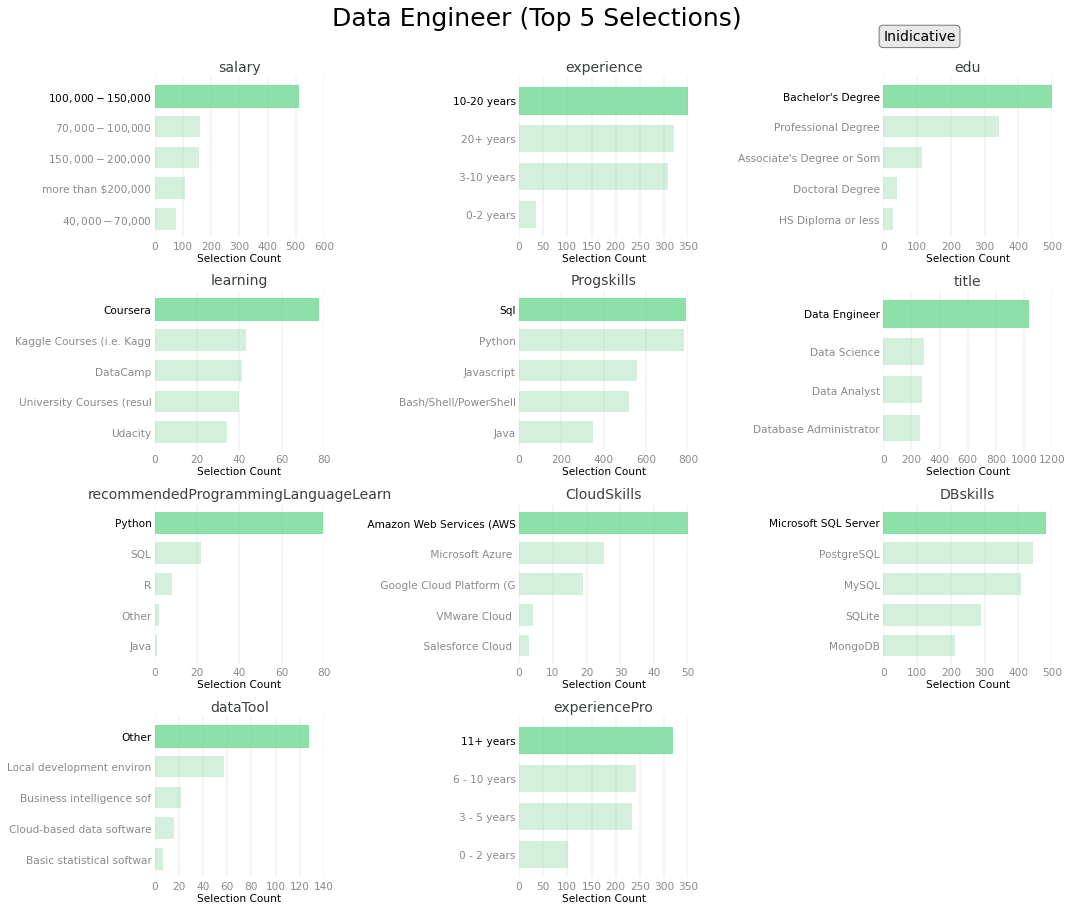

In [167]:
profileChart(jobTitles[0], columns,3,4,'Data Engineer (Top 5 Selections)',['#d3f0dc','#80DE9F'])


### Data engineer: 
1. Most common salary range: **\\$100,000 - \\$150,000**
2. Experienced: **overall > 2 years** (11+ years working as a professional)
3. Educated: Mainly **Bachelor's degree**; professional degree (ie. MBA) are common as well
4. Most common learning platform: **Coursera**
5. Most common programming languages used: **SQL and Python**
6. Most common cloud platform used: **Amazon Web Service (AWS)**
7. Most common relational database language: **Miscrosoft SQL Server, MySQL, and PostgreSQL**

In [168]:
columns = getRidOfNanColumns(jobTitles[1])
len(columns)

11

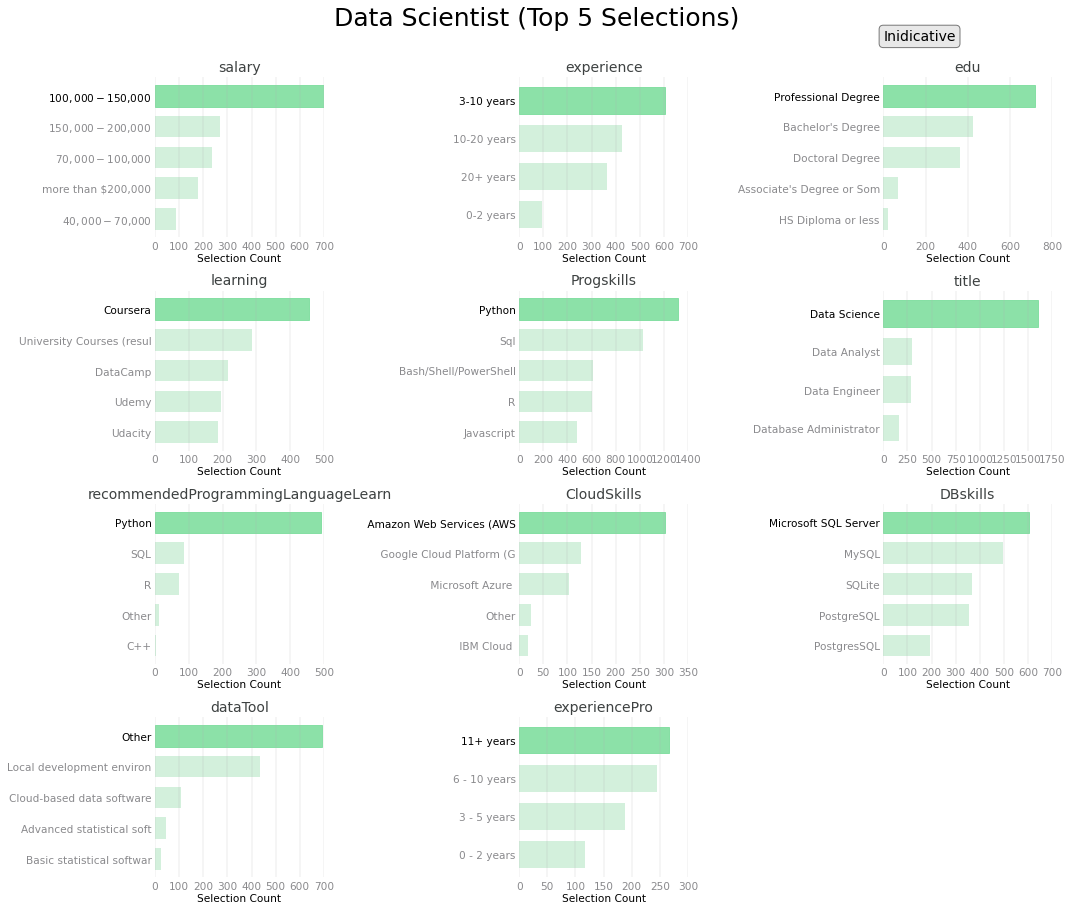

In [169]:
profileChart(jobTitles[1],columns, 3,4, 'Data Scientist (Top 5 Selections)',['#d3f0dc','#80DE9F'])

### Data Scientist: 
1. Most common salary range: **\\$100,000 - \\$150,000**
2. Most common coding experience: **3 to 10 years**(11+ years working as a professional)
3. Educated: Mainly **professional degree (ie. MBA)** 
4. Most common learning platform: **Coursera**
5. Most common programming languages used: **Python ad SQL**
6. Most common cloud platform used: **Amazon Web Service (AWS)**
7. Most common relational database language: **Miscrosoft SQL Server and MySQL**

In [170]:
columns = getRidOfNanColumns(jobTitles[2])
len(columns)

12

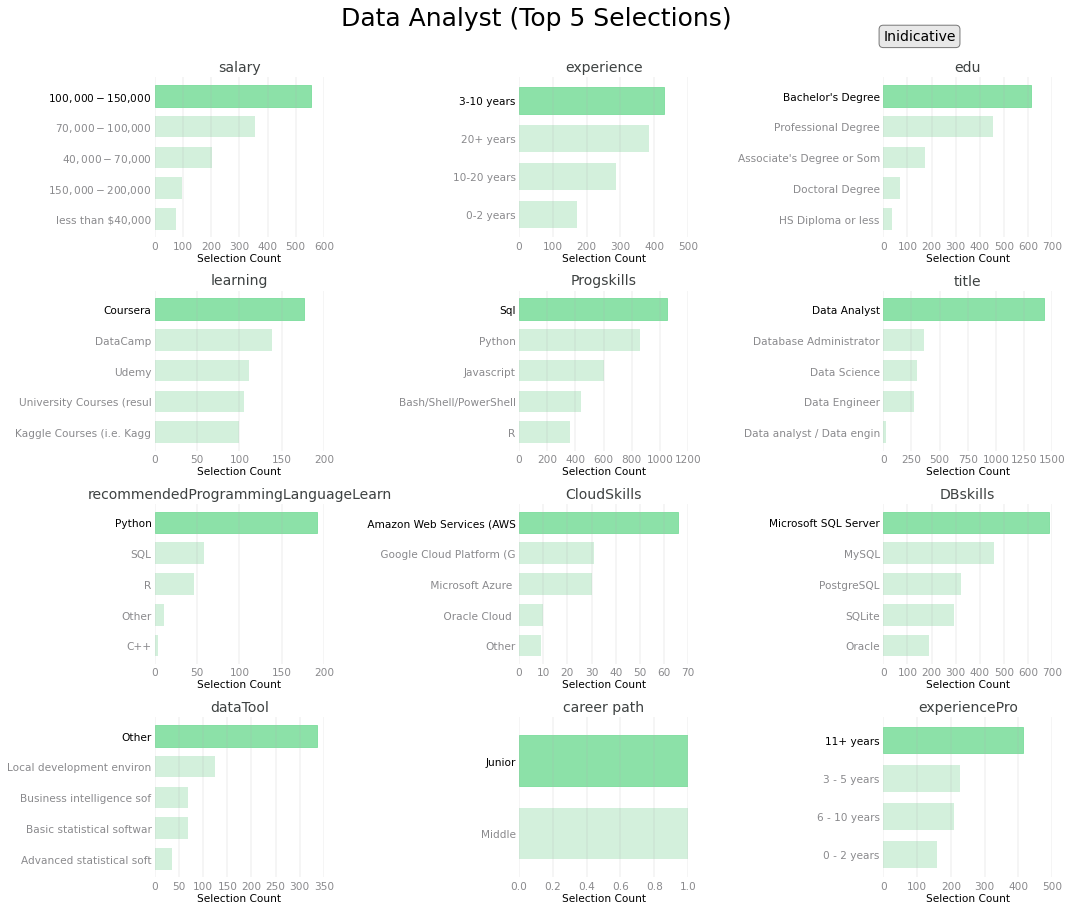

In [171]:
profileChart(jobTitles[2],columns, 3,4,'Data Analyst (Top 5 Selections)',['#d3f0dc','#80DE9F'])

### Data Analyst: 
1. Most common salary range: **\\$100,000 - \\$150,000**
2. Most common coding experience: **3 to 10 years and 20+ years** (11+ years working as a professional)
3. Educated: Mainly **Bachelor's degree**
4. Most common learning platform: **Coursera**
5. Most common programming languages used: **SQL and Python**
6. Most common cloud platform used: **Amazon Web Service (AWS)**
7. Most common relational database language: **Miscrosoft SQL Server**

In [172]:
columns = getRidOfNanColumns(jobTitles[3])
len(columns)

7

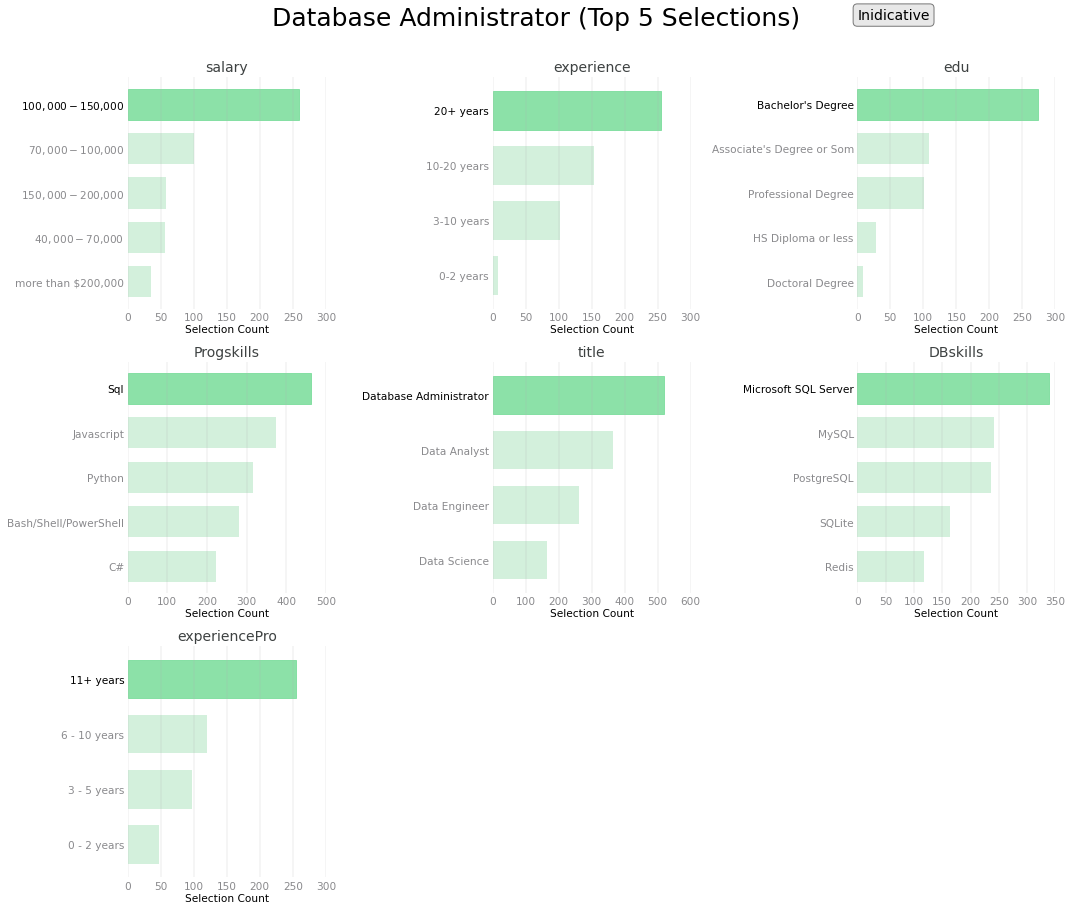

In [173]:
profileChart(jobTitles[3],columns, 3,3,'Database Administrator (Top 5 Selections)',['#d3f0dc','#80DE9F'])

### Database Administrator: 
1. Most common salary range: **\\$100,000 - \\$150,000**
2. Coding experience: **20+ years**(11+ years working as a professional)
3. Educated: Mainly **Bachelor's degree**
4. Most common programming languages used: **SQL, Javascript, and Python**
5. Most common relational database language: **Miscrosoft SQL Server**

### Overall Conclusion
Overall data-ralated jobs earn on average \\$100,000 - \\$150,000, have attained a higher education (Bachedlor's degree), and most commonly have 11+ years of professional experience. Their most commonly used programming languages are Python and SQL. Morevoer, their most commonly used relational database language and cloud platform were indicated to be Microsoft SQL Server and Amazon Web Service (AWS), repectively. 

Individuals surveyed seem to be well-established in their fields as indicated by their most common work experience. In addition, a higher education is still commonly seen amongst data scientist but not in the realms of a Phd anymore interestingly enough. 

### Overall Recommendation

An individual aiming to obtain a job as a data scientist, data analyst, database administrator, or data engineer, should look into learning SQL (more specifically, Microsoft SQL Server), cloud-based platforms (more specifically Amazon Web Service) and Python as they are the main tools used in a data-related role. 

# Demographics and Social Diversity Profile

In this section, the main focus will be on researching the demographics and social diversity of tech industry and individual roles/positions. The following will be features of interest: 
    [age, gender,sexuality, race and ethnicity, education]
  
The procedure here will be the same as in the job profile section:retrieve relevant columns, merge dataframes, format as necessary, split by groups (ie. job role), and graph. 

In [174]:
[df.columns for df in dataframes]

[Index(['job_intr_dataengn', 'job_intr_datasci', 'expected_earn',
        'hours_learning', 'bootcamp_attend', 'age', 'is_ethnic_minority',
        'school_degree', 'school_major', 'curr_field', 'last_yr_income',
        'is_self_employed', 'is_recv_disab_bnft', 'learning_platform', 'Gender',
        'years_programming'],
       dtype='object'),
 Index(['gender', 'datVizLibrariesUsed', 'activitiesImportantWork',
        'cloudComputingProduct_usedRegularly', 'age', 'platformCourses',
        'ML_Products_usedRegularly', 'highestEduWithin2years',
        'dataScienceEmployees', 'programmingLang_usedRegularly',
        'relationalDB_usedRegularly', 'bigDataProducts_usedRegularly',
        'primaryDataAnalysisTool', 'salary?',
        'recommendedProgrammingLanguageLearn',
        'cloudComputingPlatform_usedRegularly', 'MLtool_usedRegularly',
        'jobTitle', 'codingExperience', 'company_size'],
       dtype='object'),
 Index(['employment_status', 'position_level', 'hours_code_job',
 

The following are the columns that will be of use for the Demographic and Social Diversity Profile

In [175]:
dfColumnsForDemoMap=[{'age':'age','is_ethnic_minority':'minority', 'job_intr_dataengn':'dataengn',
                      'job_intr_datasci':'datasci', 'expected_earn':'salary', 'school_degree':'edu',
                     'curr_field':'curr_field', 'is_recv_disab_bnft':'disability', 'Gender':'gender'},
    {'gender':'gender','age':'age',
     'highestEduWithin2years':'edu',
     'jobTitle':'title','salary?':'salary'},
    {'employment_status':'employed','sectors_it':'sectors_it',
     'age_range':'age', 'job_role':'title',
     'position_level':'career path', 'salary':'salary'},
    {'Age':'age', 'Ethnicity':'ethnicity', 'Gender':'gender', 'sexuality':'sexuality', 
     'CompTotal':'salary', 'DevType':'title', 'EdLevel':'edu'}]

In [176]:
#keep the columns (see previous cell) in the dictionary key and rename them w/ their values
df1= dataframes[0][[col for col in dfColumnsForDemoMap[0].keys()]].rename(columns=dfColumnsForDemoMap[0])
df2= dataframes[1][[col for col in dfColumnsForDemoMap[1].keys()]].rename(columns=dfColumnsForDemoMap[1])
df3= dataframes[2][[col for col in dfColumnsForDemoMap[2].keys()]].rename(columns=dfColumnsForDemoMap[2])
df4= dataframes[3][[col for col in dfColumnsForDemoMap[3].keys()]].rename(columns=dfColumnsForDemoMap[3])

In [177]:
[df.columns for df in [df1,df2,df3,df4]]

[Index(['age', 'minority', 'dataengn', 'datasci', 'salary', 'edu', 'curr_field',
        'disability', 'gender'],
       dtype='object'),
 Index(['gender', 'age', 'edu', 'title', 'salary'], dtype='object'),
 Index(['employed', 'sectors_it', 'age', 'title', 'career path', 'salary'], dtype='object'),
 Index(['age', 'ethnicity', 'gender', 'sexuality', 'salary', 'title', 'edu'], dtype='object')]

In [178]:
#demographic map dataframe
demoMap= df1.append(df2).append(df3).append(df4)

Applying previous calculations made in the Job Map section.  For reference, refer back to section.

In [179]:
demoMap['edu']=demoMap['edu'].apply(lambda x: x.split('(')[0].split('/')[0] if type(x)!=float else x)
demoMap['edu'] = demoMap['edu'].apply(lambda x: groupEdu(x))
demoMap['salary']=demoMap['salary'].apply(lambda x: convertNumeric(x))
demoMap['salary'] = demoMap['salary'].apply(lambda x: salaryRanges(x))
demoMap=demoMap.reset_index(drop=True)
demoMap.columns

Index(['age', 'minority', 'dataengn', 'datasci', 'salary', 'edu', 'curr_field',
       'disability', 'gender', 'title', 'employed', 'sectors_it',
       'career path', 'ethnicity', 'sexuality'],
      dtype='object')

In [180]:
#columns of the dataframe
demoMap.columns, len(demoMap.columns)

(Index(['age', 'minority', 'dataengn', 'datasci', 'salary', 'edu', 'curr_field',
        'disability', 'gender', 'title', 'employed', 'sectors_it',
        'career path', 'ethnicity', 'sexuality'],
       dtype='object'), 15)

In [181]:
#print column and unique value if greater than 10
for col in demoMap.columns:
    try:
        counts = len(demoMap[col].value_counts())
    except:
        counts = len(count_values(demoMap,col))
    if counts > 10:
        print(col, counts)

age 79
curr_field 14
gender 13
title 27
sectors_it 58
ethnicity 49
sexuality 16


We'll start with age column.

In [182]:
count_values(demoMap, 'age').keys()

dict_keys([37, 54, 29, 27, 31, 43, 24, 44, 28, 33, 26, 32, 41, 38, 25, 30, 22, 19, 17, 34, 51, 23, 42, 20, 18, 56, 40, 74, 46, 45, 60, 57, 21, 52, 35, 36, 47, 48, 53, 50, 55, 49, 16, 39, 68, 62, 59, 61, 65, 13, 15, 14, '22-24', '50-54', '35-39', '30-34', '25-29', '45-49', '40-44', '60-69', '55-59', '18-21', '70+', '40-49', '50-59', '30-39', '21-29', '60 or older', '17 or younger', '18-20', 63.0, 58.0, 71.0, 73.0, 64.0, 66.0, 72.0, 67.0, 75.0])

Skipping ages below below 15.

In [183]:
#if less than 15, filter out of the dataframe
demoMap['age'] = demoMap['age'].apply(lambda x: x[0] if type(x)==list else 
                    (False if type(convertNumeric(x))==float and convertNumeric(x)<15 else x))

In [184]:
count_values(demoMap.iloc[np.where(demoMap['age'].apply(lambda x: True if type(x)==str else False))],'age').keys()

dict_keys(['22-24', '50-54', '35-39', '30-34', '25-29', '45-49', '40-44', '60-69', '55-59', '18-21', '70+', '40-49', '50-59', '30-39', '21-29', '60 or older', '17 or younger', '18-20'])

In [185]:
#preparing values to preprocess -> formatting certain ranges 
ageGroupMap= {'17 or younger':False,'18-20':'18-24', '18-21':'18-24','22-24':'18-24',
'21-29':'25-29','35-39':'30-39', '30-34':'30-39',
'45-49':'40-49', '40-44':'40-49','50-54':'50-59','55-59':'50-59',
'60 or older':'60+','70+':'60+', '60-69':'60+'}

In [186]:
demoMap['age'] = demoMap['age'].apply(lambda x: ageGroupMap[x] if type(x)==str and x in ageGroupMap.keys()  else x)

The following will be the age groups used.

In [187]:
def ageGroups(x):
    if x == False or x in ageGroupMap.values(): return x
    elif x >17 and x<=24: return '18-24'
    elif x >24 and x<=29: return '25-29'
    elif x >29 and x<=39: return '30-39'
    elif x >39 and x<=49: return '40-49'
    elif x >49 and x<=59: return '50-59'
    elif x > 60: return '60+'

In [188]:
demoMap['age'] = demoMap['age'].apply(lambda x: ageGroups(x))
demoMap['age'].unique()

array(['30-39', '50-59', '25-29', '40-49', '18-24', None, '60+', False],
      dtype=object)

Preprocessing gender column

In [189]:
list(demoMap['gender'].value_counts().index)

['Male',
 'Man',
 'Female',
 'Woman',
 'Prefer not to say',
 'Non-binary, genderqueer, or gender non-conforming',
 'Gender - Other',
 ['Non-binary, genderqueer, or gender non-conforming', 'Man'],
 '',
 ['Non-binary, genderqueer, or gender non-conforming', 'Woman'],
 ['Prefer to self-describe', 'Other'],
 'Prefer to self-describe',
 ['Man', 'Non-binary, genderqueer, or gender non-conforming', 'Woman']]

In [190]:
# grouping gender into modified groups
genderMap = {"Male":"Man","Female":"Woman", 
             "Gender- Other":"Non-binary, genderqueer, or gender non-conforming",
             "Prefer to self-describe" :'Non-binary, genderqueer, or gender non-conforming'}

def genderGroup(x):
    if x == '': return False
    elif type(x)==list:
        if 'Non-binary, genderqueer, or gender non-conforming' in x \
        or  'Prefer to self-describe' in x: return 'Non-binary, genderqueer, or gender non-conforming'
    elif x in genderMap.values(): return x

In [191]:
demoMap['gender'] =demoMap['gender'].apply(lambda x: 
                                           genderGroup(genderMap[x]) if type(x)!=list and x in genderMap.keys() 
                                           else genderGroup(x))
demoMap['gender'].value_counts()

Man                                                  3653
Woman                                                 743
Non-binary, genderqueer, or gender non-conforming      35
False                                                   9
Name: gender, dtype: int64

Next up, Ethnicity

In [192]:
count_values(demoMap,'ethnicity')

{'White or of European descent': 1673,
 'South Asian': 82,
 'Middle Eastern': 35,
 'Hispanic or Latino/a/x': 98,
 'East Asian': 70,
 'Biracial': 25,
 'Multiracial': 43,
 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)': 30,
 'Southeast Asian': 29,
 'Black or of African descent': 32}

Here's how this column will be categorized: 

If it's a list (meaning respondent chose more than 2 options) than we'll categorize as biracial or multiracial. The asian category will also be created to encapsulate ethnicities that stem from that race.

In [193]:
demoMap['ethnicity']=demoMap['ethnicity'].apply(lambda x: 'Biracial or Multiracial' if type(x)==list or x in ['Biracial','Multiracial'] else 
                         'Asian'  if x in ['South Asian', 'Southeast Asian','East Asian'] else x)
demoMap['ethnicity'].unique()

array([nan, 'White or of European descent', 'Asian',
       'Biracial or Multiracial', 'Middle Eastern',
       'Hispanic or Latino/a/x', 'Black or of African descent',
       'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)'],
      dtype=object)

Now we'll start preparing the roles and tech industry variables for grouping. 

Given that we're only interested in the IT sector we'll mark every value in the Sectors IT column that has a present value (not a null) as True .

In [194]:
demoMap['sectors_it'] = demoMap['sectors_it'].apply(lambda x: True if type(x)!= float else x)
demoMap['sectors_it'].value_counts()

True    181
Name: sectors_it, dtype: int64

We'll do the same with the curr_field column.

In [195]:
print(list(demoMap['curr_field'].value_counts().index))

['software development and IT', 'office and administrative support', 'education', 'food and beverage', 'health care', 'sales', 'finance', 'arts, entertainment, sports, or media', 'construction and extraction', 'transportation', 'architecture or physical engineering', 'legal', 'law enforcement and fire and rescue', 'farming, fishing, and forestry']


Based on the values above, the only one trhat will be counted as being in the IT sectors is: 'software development and IT'-- we'll apply the True value again.

In [196]:
demoMap['curr_field'] = demoMap['curr_field'].apply(lambda x: True if x=='software development and IT' else False)
demoMap['curr_field'].value_counts()

False    4347
True      323
Name: curr_field, dtype: int64

Now we'll format the job titles the same way we did in the job section. For reference, refer back to section. 

In [197]:
demoMap['title'] = demoMap['title'].apply(lambda x: categorizeJobsMain(x))
count_values(demoMap,'title')

{'Data Science': 1597,
 'Data Analyst': 1424,
 'Data Engineer': 1026,
 'Data analyst / Data engineer/ Data scientist': 136,
 'Database Administrator': 520}

In [198]:
isDataengn1 = list(demoMap.query("dataengn=='Yes'").index)
isDataengn2= list(demoMap[jobTitleMask(demoMap, 'title', 'Data Engineer')==True].index)
isDataengn = list(set(isDataengn1+ isDataengn2))

dataengn = demoMap.iloc[isDataengn].reset_index(drop=True)
dataengn.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,title,employed,sectors_it,career path,ethnicity,sexuality
0,30-39,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,Data Engineer,NaN,NaN,NaN,Asian,Straight / Heterosexual
1,30-39,NaN,NaN,NaN,"$100,000 - $150,000",Professional Degree,False,NaN,Man,"[Data Analyst, Data Science, Data Engineer]",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual
2,40-49,NaN,NaN,NaN,"$70,000 - $100,000",Bachelor's Degree,False,NaN,Man,Data Engineer,NaN,NaN,NaN,NaN,NaN
3,25-29,NaN,NaN,NaN,"more than $200,000",Bachelor's Degree,False,NaN,Woman,"[Data Analyst, Data Science, Data Engineer]",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual
4,30-39,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,"[Data Science, Data Engineer]",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual


In [199]:
isDatasci1 = list(demoMap.query("datasci=='Yes'").index)
isDatasci2= list(demoMap[jobTitleMask(demoMap, 'title', 'Data Science')==True].index)
isDatasci = list(set(isDatasci1+ isDatasci2))

datasci = demoMap.iloc[isDatasci].reset_index(drop=True)
datasci.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,title,employed,sectors_it,career path,ethnicity,sexuality
0,18-24,NaN,NaN,NaN,"$70,000 - $100,000",Bachelor's Degree,False,NaN,Woman,Data Science,NaN,NaN,NaN,NaN,NaN
1,30-39,NaN,NaN,NaN,"$150,000 - $200,000",Bachelor's Degree,False,NaN,Man,Data Science,NaN,NaN,NaN,NaN,NaN
2,25-29,NaN,NaN,NaN,"more than $200,000",Professional Degree,False,NaN,None,Data Science,NaN,NaN,NaN,NaN,NaN
3,18-24,NaN,NaN,NaN,"$100,000 - $150,000",Professional Degree,False,NaN,Man,Data Science,NaN,NaN,NaN,NaN,NaN
4,30-39,NaN,NaN,NaN,"more than $200,000",Professional Degree,False,NaN,None,Data Science,NaN,NaN,NaN,NaN,NaN


In [200]:
isAnalyst= list(demoMap[jobTitleMask(demoMap, 'title', 'Data Analyst')==True].index)

analyst = demoMap.iloc[isAnalyst].reset_index(drop=True)
analyst.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,title,employed,sectors_it,career path,ethnicity,sexuality
0,50-59,NaN,NaN,NaN,"$100,000 - $150,000",Professional Degree,False,NaN,Woman,Data Analyst,NaN,NaN,NaN,NaN,NaN
1,30-39,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,Data Analyst,NaN,NaN,NaN,NaN,NaN
2,30-39,NaN,NaN,NaN,"$40,000 - $70,000",Professional Degree,False,NaN,Man,Data Analyst,NaN,NaN,NaN,NaN,NaN
3,25-29,NaN,NaN,NaN,"$70,000 - $100,000",Professional Degree,False,NaN,Man,Data Analyst,NaN,NaN,NaN,NaN,NaN
4,18-24,NaN,NaN,NaN,"$40,000 - $70,000",Bachelor's Degree,False,NaN,Man,Data Analyst,NaN,NaN,NaN,NaN,NaN


In [201]:
isDBA= list(demoMap[jobTitleMask(demoMap, 'title', 'Database Administrator')==True].index)

DBA = demoMap.iloc[isDBA].reset_index(drop=True)
DBA.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,title,employed,sectors_it,career path,ethnicity,sexuality
0,25-29,NaN,NaN,NaN,"$40,000 - $70,000",Professional Degree,False,NaN,Man,"[Data Analyst, Database Administrator, Data En...",NaN,NaN,NaN,Asian,Straight / Heterosexual
1,25-29,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,"[Data Science, Database Administrator]",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual
2,30-39,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,"[Data Science, Database Administrator]",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual
3,50-59,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,"[Data Analyst, Database Administrator]",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual
4,30-39,NaN,NaN,NaN,"$100,000 - $150,000",Bachelor's Degree,False,NaN,Man,"[Data Analyst, Data Science, Database Administ...",NaN,NaN,NaN,White or of European descent,Straight / Heterosexual


In [202]:
demoIT = demoMap[(demoMap['sectors_it']==True)|(demoMap['curr_field']==True)].reset_index(drop=True)
demoIT.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,title,employed,sectors_it,career path,ethnicity,sexuality
0,25-29,1.0,1.0,1.0,"$40,000 - $70,000",Bachelor's Degree,True,0.0,Man,NaN,NaN,NaN,NaN,NaN,NaN
1,25-29,1.0,1.0,1.0,"$70,000 - $100,000",HS Diploma or less,True,0.0,Man,NaN,NaN,NaN,NaN,NaN,NaN
2,30-39,1.0,1.0,1.0,"$70,000 - $100,000",Associate's Degree or Some College,True,0.0,Man,NaN,NaN,NaN,NaN,NaN,NaN
3,18-24,0.0,0.0,1.0,"$70,000 - $100,000",Bachelor's Degree,True,0.0,Man,NaN,NaN,NaN,NaN,NaN,NaN
4,25-29,0.0,0.0,1.0,"$40,000 - $70,000",Bachelor's Degree,True,0.0,Man,NaN,NaN,NaN,NaN,NaN,NaN


### Graphs
Like the previous section, we'll apply the same settings and procedure.

In [203]:
title = [analyst, dataengn, datasci,DBA, demoIT]

In [204]:
columns = getRidOfNanColumns(title[0])
len(columns)

11

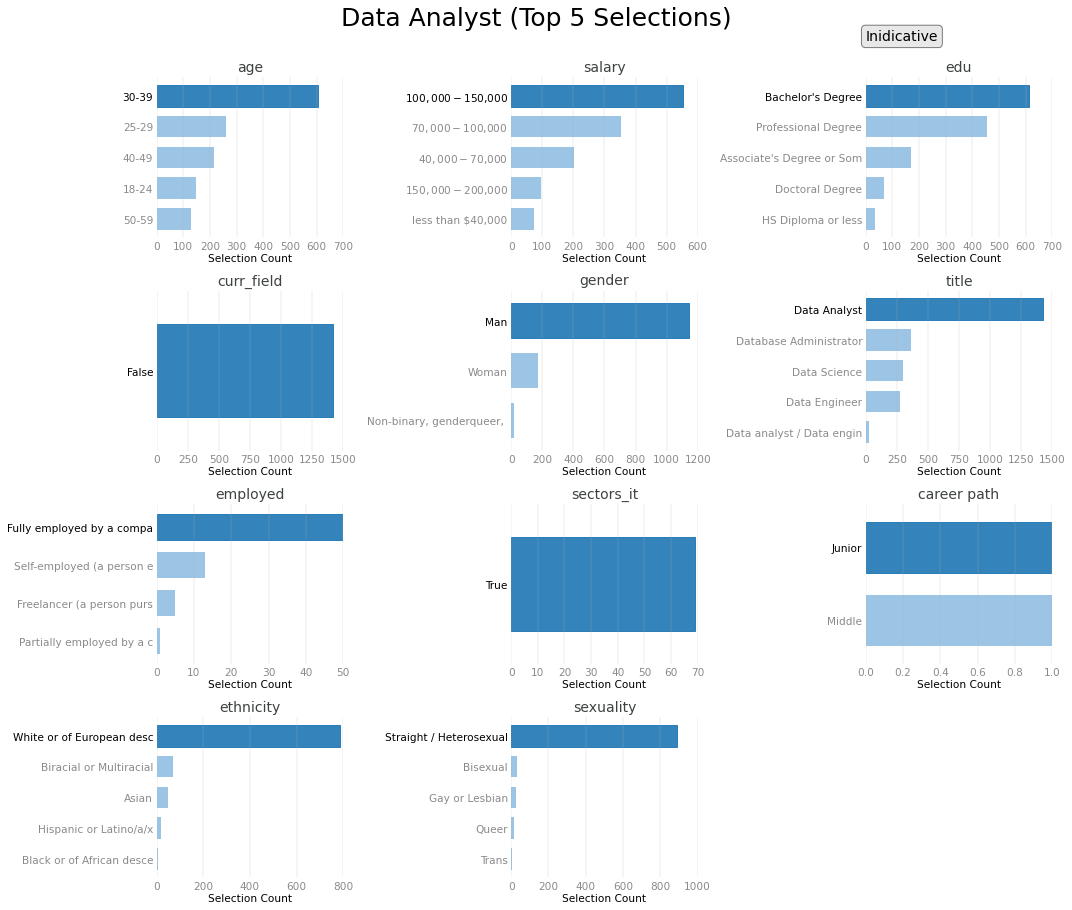

In [205]:
profileChart(title[0],columns, 3,4,'Data Analyst (Top 5 Selections)',['#9CC4E4','#1f77b4'])

### Data Analyst: 
1. Most common age range: **30-39**
2. Gender: overwhelmingly **Male**
3. Ethnicity: overwhelmingly **White or European descent**
4. Sexuality: almost all indicated being **Straight/heterosexual**

In [206]:
columns = getRidOfNanColumns(title[1])
len(columns)

8

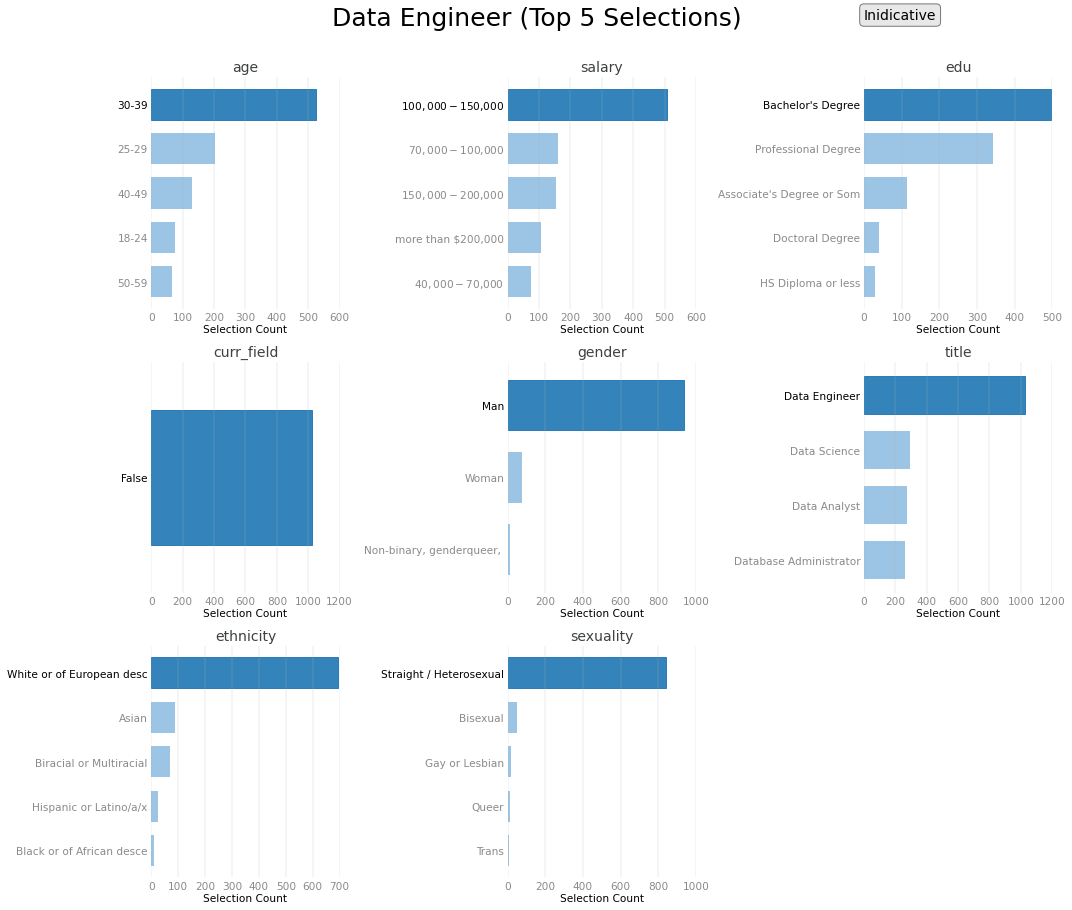

In [207]:
profileChart(title[1],columns, 3,3,'Data Engineer (Top 5 Selections)',['#9CC4E4','#1f77b4'])

### Data Engineer: 
1. Most common age range: **30-39**
2. Gender: overwhelmingly **Male**
3. Ethnicity: overwhelmingly **White or European**
4. Sexuality: almost all indicated being **Straight/heterosexual**

In [208]:
columns = getRidOfNanColumns(title[2])
len(columns)


8

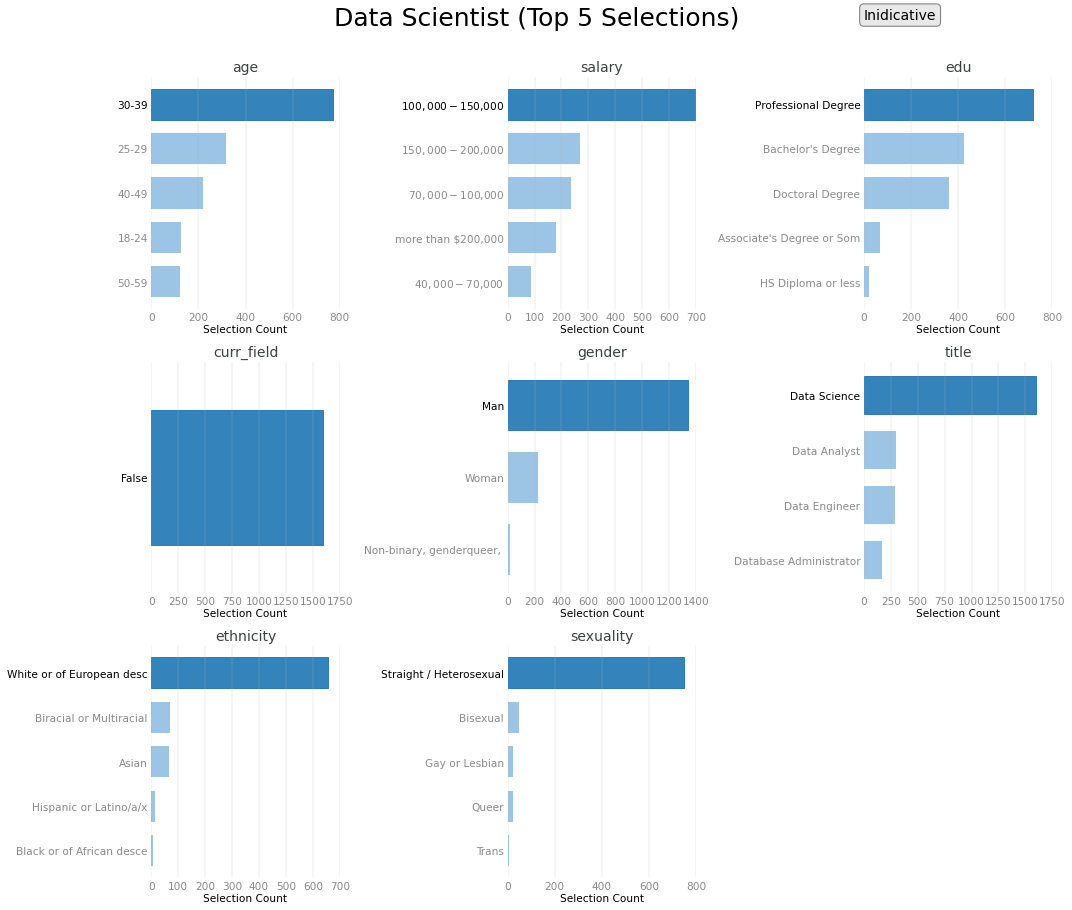

In [209]:
profileChart(title[2],columns, 3,3,'Data Scientist (Top 5 Selections)',['#9CC4E4','#1f77b4'])

### Data Scientist: 
1. Most common age range: **30-39**
2. Gender: overwhelmingly **Male** (relative to other data fields women are represented slightly better)
3. Ethnicity: overwhelmingly **White or European**
4. Sexuality: almost all indicated being **Straight/heterosexual**

In [210]:
columns = getRidOfNanColumns(title[3])
len(columns)


8

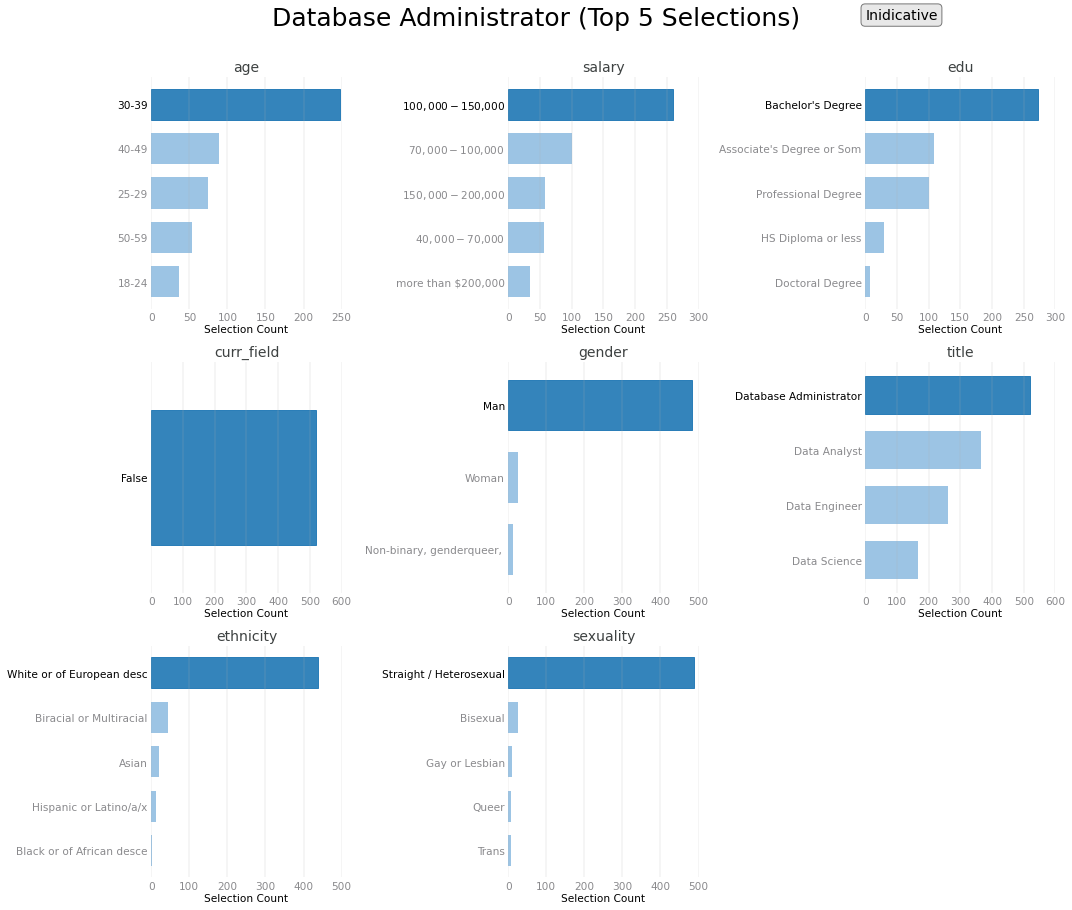

In [211]:
profileChart(title[3],columns, 3,3,'Database Administrator (Top 5 Selections)',['#9CC4E4','#1f77b4'])

### Database Administrator: 
1. Most common age range: **30-39**
2. Gender: overwhelmingly **Male**
3. Ethnicity: overwhelmingly **White or European**
4. Sexuality: almost all indicated being **Straight/heterosexual**

In [212]:
columns = getRidOfNanColumns(title[4])
len(columns)

13

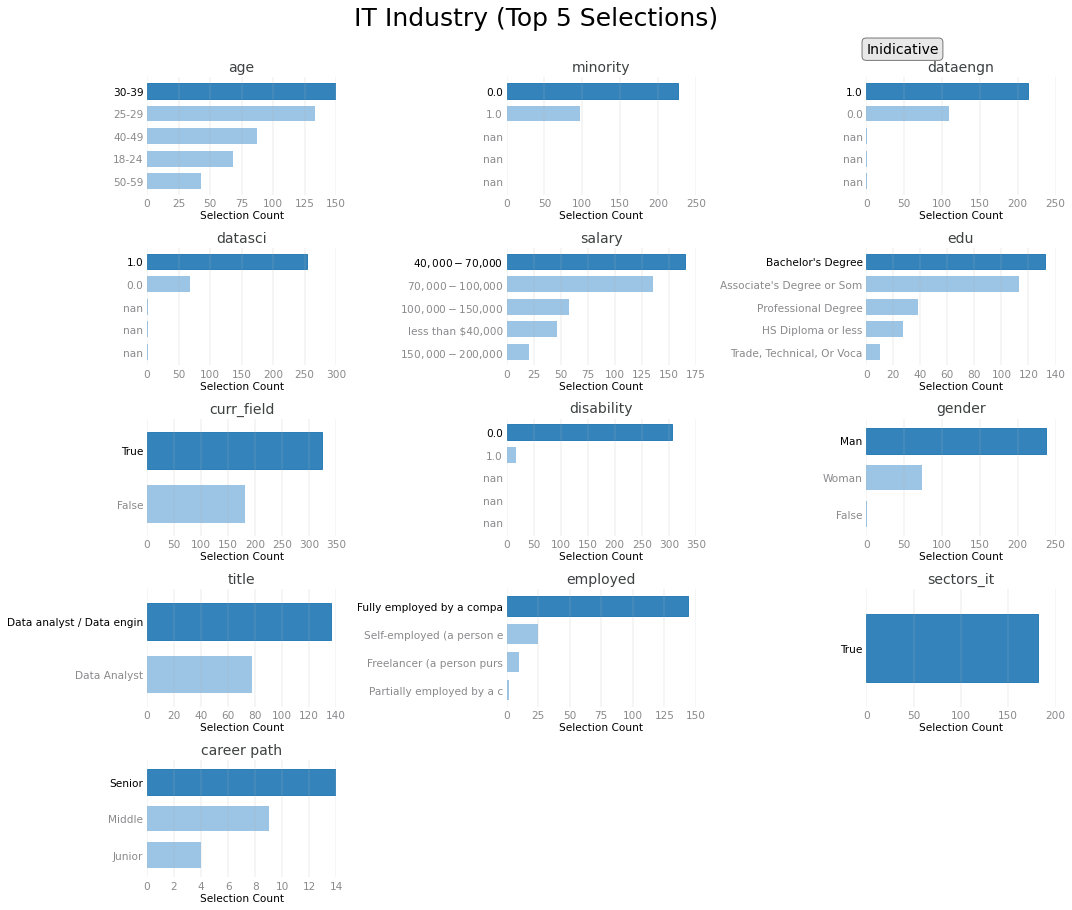

In [213]:
profileChart(title[4],columns, 3,5,'Tech Industry (Top 5 Selections)',['#9CC4E4','#1f77b4'])

### Tech Industry: 
1. Most common salary range: **\\$40,000 - \\$70,000**
2. Educated: Charracterized by  **Bachelor's degree** and **Associate's Degree or some college**
3. Characterized by young people: **30-39** and **25-29** age range
4. Most common Gender:  **Male**
5. Most identified as **not being a minority**
6. **Very few** identifed as having a **disability status**

### Overall Conclusion
Across all the data-related jobs explored as well as in the tech industry, the typical demographic profile is the following: Straight/heterosexual White or European descendant Male whose age range is between 30 - 39. 

For data-related jobs in the tech industry, the common salary, oddly enough, was indicated to being \\$40,000- \\$70,000 with education attained being most commonly in the form of a Bachelor's degree or Associate's Degree (or some college). Moreover, very few of respondents identified as having a disability status.

### Overall Recommendation
There is certaintly a lot of room for improvement in terms of diversity in data-related roles. Nothing to discourage but something worth considering for those not represented in the field. More intiatives or programs of the like should be lanched to address this gap in diversity which is clearly prevalent in the tech field and data-related roles.


## Employer profile - Researching the following information about companies:

In this section, the main focus will be on researching the demographics and social diversity among other variables of the tech and non-tech industry. The following will be features of interest: 
        [industry, company size, team size, roles/jobs, salaries,
     part-time/full-time, overtime, stack and skills required ,demographics and social diversity]
  
The procedure here will be the same as in the job profile section:retrieve relevant columns, merge dataframes, format as necessary, split by groups (ie. job role), and graph. 

In [214]:
print([list(df.columns) for df in dataframes])

[['job_intr_dataengn', 'job_intr_datasci', 'expected_earn', 'hours_learning', 'bootcamp_attend', 'age', 'is_ethnic_minority', 'school_degree', 'school_major', 'curr_field', 'last_yr_income', 'is_self_employed', 'is_recv_disab_bnft', 'learning_platform', 'Gender', 'years_programming'], ['gender', 'datVizLibrariesUsed', 'activitiesImportantWork', 'cloudComputingProduct_usedRegularly', 'age', 'platformCourses', 'ML_Products_usedRegularly', 'highestEduWithin2years', 'dataScienceEmployees', 'programmingLang_usedRegularly', 'relationalDB_usedRegularly', 'bigDataProducts_usedRegularly', 'primaryDataAnalysisTool', 'salary?', 'recommendedProgrammingLanguageLearn', 'cloudComputingPlatform_usedRegularly', 'MLtool_usedRegularly', 'jobTitle', 'codingExperience', 'company_size'], ['employment_status', 'position_level', 'hours_code_job', 'learn_kind_of_content', 'learn_time', 'team_size', 'salary', 'age_range', 'cloud_services', 'company_size', 'db', 'it_experience', 'job_role', 'learn_what', 'primar

The following will be columns of interest: 

In [215]:
dfColumnsForEmployMap = [{ 'age':'age','is_ethnic_minority':'minority', 
                          'job_intr_dataengn':'dataengn',
                      'job_intr_datasci':'datasci', 'expected_earn':'salary', 'school_degree':'edu',
                     'curr_field':'curr_field', 'is_recv_disab_bnft':'disability', 'Gender':'gender' },
    {'company_size':'company_size', 'dataScienceEmployees':'dataScienceEmployees','programmingLang_usedRegularly':'Progskills',
     'recommendedPorgrammingLanguageLearn': 'recommendedProgrammingLanguageLearn', 
        'cloudComputingPlatform_usedRegularly':'CloudSkills', 'relationalDB_usedRegularly':'DBskills',
     'gender':'gender','age':'age', 'highestEduWithin2years':'edu', 'jobTitle':'title','salary?':'salary'},
    {'employment_status':'employed','sectors_it':'sectors_it', 'sectors_nonit':'sectors_nonit','age_range':'age', 'primary_proglang':'Progskills','cloud_services':'CloudSkills', 
     'job_role':'title','position_level':'career path', 'salary':'salary',
     'hours_code_job':'WorkWeekHrs', 'company_size':'company_size',
     'team_size':"team_size", 'sectors_nonit':"sectors_nonit"},
     {'Age':'age', 'Ethnicity':'ethnicity', 'Gender':'gender', 'sexuality':'sexuality', 
 'CompTotal':'salary', 'DevType':'title', 'EdLevel':'edu','JobSat':"JobSat", 'DatabaseWorkedWith':'DBskills',
 'LanguageWorkedWith':'Progskills','NEWOvertime':"overtime",'OrgSize':"company_size", 'WorkWeekHrs':"WorkWeekHrs"}]

In [268]:
employMap1 =dataframes[0].rename(columns= dfColumnsForEmployMap[0])[dfColumnsForEmployMap[0].values()]
employMap2=dataframes[1].rename(columns= dfColumnsForEmployMap[1])[dfColumnsForEmployMap[1].values()]
employMap3=dataframes[2].rename(columns= dfColumnsForEmployMap[2])[dfColumnsForEmployMap[2].values()]
employMap4=dataframes[3].rename(columns= dfColumnsForEmployMap[3])[dfColumnsForEmployMap[3].values()]

[df.columns for df in [employMap1, employMap2,employMap3,employMap4]]

[Index(['age', 'minority', 'dataengn', 'datasci', 'salary', 'edu', 'curr_field',
        'disability', 'gender'],
       dtype='object'),
 Index(['company_size', 'dataScienceEmployees', 'Progskills',
        'recommendedProgrammingLanguageLearn', 'CloudSkills', 'DBskills',
        'gender', 'age', 'edu', 'title', 'salary'],
       dtype='object'),
 Index(['employed', 'sectors_it', 'sectors_nonit', 'age', 'Progskills',
        'CloudSkills', 'title', 'career path', 'salary', 'WorkWeekHrs',
        'company_size', 'team_size'],
       dtype='object'),
 Index(['age', 'ethnicity', 'gender', 'sexuality', 'salary', 'title', 'edu',
        'JobSat', 'DBskills', 'Progskills', 'overtime', 'company_size',
        'WorkWeekHrs'],
       dtype='object')]

In [269]:
employMap = employMap1.append(employMap2).append(employMap3).append(employMap4).reset_index(drop=True)
employMap.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,company_size,...,employed,sectors_it,sectors_nonit,career path,WorkWeekHrs,team_size,ethnicity,sexuality,JobSat,overtime
0,37,1.0,1.0,1.0,70000,"some college credit, no degree",construction and extraction,0.0,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54,1.0,0.0,1.0,75000,Ph.D.,health care,0.0,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29,1.0,1.0,1.0,55000,bachelor's degree,software development and IT,0.0,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,1.0,1.0,1.0,80000,high school diploma or equivalent (GED),software development and IT,0.0,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,0.0,0.0,1.0,40000,bachelor's degree,sales,0.0,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
employMap.columns

Index(['age', 'minority', 'dataengn', 'datasci', 'salary', 'edu', 'curr_field',
       'disability', 'gender', 'company_size', 'dataScienceEmployees',
       'Progskills', 'recommendedProgrammingLanguageLearn', 'CloudSkills',
       'DBskills', 'title', 'employed', 'sectors_it', 'sectors_nonit',
       'career path', 'WorkWeekHrs', 'team_size', 'ethnicity', 'sexuality',
       'JobSat', 'overtime'],
      dtype='object')

Applying similar procedures as the previous ones (Demographic and Job Map)

In [270]:
employMap['edu']=employMap['edu'].apply(lambda x: x.split('(')[0].split('/')[0] if type(x)!=float else x)
employMap['edu'] = employMap['edu'].apply(lambda x: groupEdu(x))
employMap['salary']=employMap['salary'].apply(lambda x: convertNumeric(x))
employMap['salary'] = employMap['salary'].apply(lambda x: salaryRanges(x))

employMap['age'] = employMap['age'].apply(lambda x: ageGroupMap[x] if type(x)==str and x in ageGroupMap.keys()  else x)
employMap['age'] =employMap['age'].apply(lambda x: ageGroups(x))
employMap['gender'] =employMap['gender'].apply(lambda x: 
                                           genderGroup(genderMap[x]) if type(x)!=list and x in genderMap.keys() 
                                           else genderGroup(x))
employMap['ethnicity']=employMap['ethnicity'].apply(lambda x: 'Biracial or Multiracial' if type(x)==list or x in ['Biracial','Multiracial'] else 
                         'Asian'  if x in ['South Asian', 'Southeast Asian','East Asian'] else x)
employMap['Progskills']= employMap['Progskills'].apply(lambda x:  groupSimilarWords(x))
employMap.head()

,age,minority,dataengn,datasci,salary,edu,curr_field,disability,gender,company_size,...,employed,sectors_it,sectors_nonit,career path,WorkWeekHrs,team_size,ethnicity,sexuality,JobSat,overtime
0,30-39,1.0,1.0,1.0,"$70,000 - $100,000",Associate's Degree or Some College,construction and extraction,0.0,Man,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-59,1.0,0.0,1.0,"$70,000 - $100,000",Doctoral Degree,health care,0.0,Man,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-29,1.0,1.0,1.0,"$40,000 - $70,000",Bachelor's Degree,software development and IT,0.0,Man,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-29,1.0,1.0,1.0,"$70,000 - $100,000",HS Diploma or less,software development and IT,0.0,Man,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-39,0.0,0.0,1.0,"$40,000 - $70,000",Bachelor's Degree,sales,0.0,Man,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
#unique values per column (if > 7 print)
for col in employMap.columns:
    try: 
        valueCounts =employMap[col].nunique()
    except:
        valueCounts = len(count_values(employMap,col))
    if valueCounts > 7:
        print(col, valueCounts)

curr_field 14
company_size 23
dataScienceEmployees 8
Progskills 33
recommendedProgrammingLanguageLearn 11
CloudSkills 17
DBskills 23
title 13
sectors_it 19
sectors_nonit 25
WorkWeekHrs 59


After a close look, the following are in need of further preprocessing

In [272]:
toFormat = ['company_size', 'WorkWeekHrs','Employed']

In [273]:
employMap['company_size'].value_counts()

10,000 or more employees                              583
> 10,000 employees                                    428
1000-9,999 employees                                  314
100 to 499 employees                                  298
20 to 99 employees                                    294
0-49 employees                                        260
1,000 to 4,999 employees                              247
50-249 employees                                      187
250-999 employees                                     155
500 to 999 employees                                  119
2 to 9 employees                                      118
5,000 to 9,999 employees                              107
10 to 19 employees                                     98
Just me - I am a freelancer, sole proprietor, etc.     67
51-500                                                 44
More than 5,000                                        41
None                                                   28
2-10          

In [274]:
(employMap['company_size'].value_counts().index)

Index(['10,000 or more employees', '> 10,000 employees',
       '1000-9,999 employees', '100 to 499 employees', '20 to 99 employees',
       '0-49 employees', '1,000 to 4,999 employees', '50-249 employees',
       '250-999 employees', '500 to 999 employees', '2 to 9 employees',
       '5,000 to 9,999 employees', '10 to 19 employees',
       'Just me - I am a freelancer, sole proprietor, etc.', '51-500',
       'More than 5,000', 'None', '2-10', '11-50', '1,001-5,000', '501-1,000',
       'Just me', 'Not sure'],
      dtype='object')

Grouping and reducing company size in accordance to the following groups. Note, some unique values could not be grouped:


In [275]:
reduceCompSize = [{val:"1,000 - 5,000" for val in ['1,000 to 4,999 employees','1000-9,999 employees','1,001-5,000']}, 
    {val:"50 - 499" for val in ['51-500','50-249 employees','100 to 499 employees']},
    {val:"0 - 49" for val in [ '2-10', '11-50', '10 to 19 employees', '0-49 employees', '2 to 9 employees' , 
     'Just me - I am a freelancer, sole proprietor, etc.', 'Just me']},
    {val:"500 - 1,000" for val in ['501-1,000','500 to 999 employees']},
    {val:"> 10,000" for val in ['10,000 or more employees', '> 10,000 employees']},
    {val:"None" for val in ['Not sure','None']}]

In [276]:
#using the above dictionary and for lists going through each one and replacing with relevant group
employMap['company_size'] = employMap['company_size'].apply(lambda x: [k[x] for k in reduceCompSize if x in k.keys()][0] if 
                                x in [k for key in reduceCompSize for k in key.keys()] else x)
employMap['company_size'].value_counts()

> 10,000                    1011
0 - 49                       599
1,000 - 5,000                576
50 - 499                     529
20 to 99 employees           294
250-999 employees            155
500 - 1,000                  130
5,000 to 9,999 employees     107
More than 5,000               41
None                          32
Name: company_size, dtype: int64

Overtime and work week hours would be combined.

In [277]:
employMap['overtime'].unique()

array([nan, 'Often: 1-2 days per week or more',
       'Sometimes: 1-2 days per month but less than weekly',
       'Occasionally: 1-2 days per quarter but less than monthly',
       'Never', 'Rarely: 1-2 days per year or less'], dtype=object)

In [278]:
employMap['WorkWeekHrs'].unique()
#go with definition over 32

array([nan, '9-16 hours a week', '32 hours a week or more',
       '17-31 hours a week', 'None', '3-8 hours a week',
       '1-2 hours a week', 60.0, 40.0, 39.0, 43.0, 47.0, 45.0, 38.0, 27.0,
       35.0, 50.0, 36.0, 41.0, 120.0, 70.0, 55.0, 44.0, 75.0, 37.5, 18.0,
       30.0, 42.0, 25.0, 48.0, 80.0, 49.0, 56.0, 20.0, 85.0, 5.0, 46.0,
       65.0, 52.0, 33.0, 32.0, 57.0, 54.0, 34.0, 37.0, 15.0, 28.0, 7.0,
       51.0, 53.0, 36.71, 10.0, 8.0, 4.0, 90.0, 22.0, 100.0, 3.0, 6.0,
       87.0], dtype=object)

In [279]:
#if hours worked 32 or greater than considered full time else part time
employMap['WorkWeekHrs'] = employMap['WorkWeekHrs'].fillna('None').apply(lambda x: 
                            'Full-time' if type(x) !=str and x >31 else 
                          'Part-time'    if type(x)!=str else x)

In [280]:
employMap['WorkWeekHrs'].value_counts()

None                       2663
Full-time                  1848
Part-time                    83
17-31 hours a week           30
32 hours a week or more      20
9-16 hours a week            16
3-8 hours a week              7
1-2 hours a week              3
Name: WorkWeekHrs, dtype: int64

Grouping the last values into two geenral categories: full-time and part-time

In [281]:
partTime = ['9-16 hours a week', '17-31 hours a week', '3-8 hours a week','1-2 hours a week']

In [282]:
employMap['WorkWeekHrs'] = employMap['WorkWeekHrs'].apply(lambda x: 'Full-time' if x =='32 hours a week or more'
                              else ('Part-time' if x in partTime else x))
employMap['WorkWeekHrs'].value_counts()

None         2663
Full-time    1868
Part-time     139
Name: WorkWeekHrs, dtype: int64

Grouping employed columns.

In [283]:
employMap['employed'] = employMap['employed'].fillna('None').apply(lambda x: ('Full-time' if x.split()[0]=='Fully'
                                                     else ('Part-time' if x.split()[0]=='Partially' else x.split()[0]))
                                           if len(x.split()) >1 else x)
employMap['employed'].value_counts()

None             4489
Full-time         144
Self-employed      25
Freelancer         10
Part-time           2
Name: employed, dtype: int64

Merging employed and work week hours. Turning all none or false values into an empty string. For all else joining by comma. Next, if time string present then take the first value (fulltie or part time) and merge again.

In [284]:
employMap['employed'] = employMap[['employed','WorkWeekHrs']].applymap(lambda x: '' if x in ['None',False,'none'] else x+',').sum(1).apply(lambda 
                                        x: (x.split(',')[0]  if 'time' in x.split(',')[0] else x.split(',')[1])
                                             if '-time' in x else 'None')
employMap['employed'].value_counts()

None         2581
Full-time    1996
Part-time      93
Name: employed, dtype: int64

In [285]:
#dropping redundant column
employMap =employMap.drop('WorkWeekHrs',1)

Creating two groups for each column: IT industry (True) and Non-IT (False).

In [291]:
employMap['curr_field'].unique()

array(['construction and extraction', 'health care',
       'software development and IT', 'sales', 'education',
       'food and beverage', 'architecture or physical engineering',
       'law enforcement and fire and rescue',
       'office and administrative support', 'transportation', 'finance',
       'legal', 'arts, entertainment, sports, or media',
       'farming, fishing, and forestry', nan], dtype=object)

In [293]:
count_values(employMap,'sectors_it').keys()

dict_keys(['Telecom', 'Other Software (all other types of software)', 'None', 'Big Data / Data analysis', 'Software development tools', 'IT services', 'Healthcare IT', 'Internet / Search engines', 'IoT / embedded', 'Cloud computing / platform', 'Data center services', 'Hardware', 'Mobile development', 'FinTech', 'Other', 'Game development (including mobile games)', 'Cybersecurity', 'Semiconductors', 'E-learning'])

In [294]:
count_values(employMap,'sectors_nonit').keys()

dict_keys(['None', 'Aerospace', 'Government and defense', 'Other', 'Banking / Real Estate / Mortgage Financing / Accounting / Finance / Insurance', 'Medicine / Health', 'Education / Training', 'Business / Strategic Management', 'Service / Maintenance', 'Customer Support', 'Administration / Management / Business Development', 'Science', 'Security', 'Non-profit', 'Marketing', 'Sales / Distribution / Retail', 'Design', 'Logistics/ Transportation', 'Food / Agriculture', 'Automotive and boating', 'Human Resources', 'Entertainment / Mass media and information / Publishing', 'Manufacturing', 'Restaurants / Hospitality / Tourism', 'Machinery'])

In [296]:
employMap['curr_field'] = employMap['curr_field'].apply(lambda x: 'IT' if x=='software development and IT' else 
                                                       ('Non-IT' if type(x)==str and x!='None' else False))

employMap['sectors_it'] =employMap['sectors_it'].apply(lambda x: True if type(x)!= float and x!='None' else False)

employMap['sectors_nonit'] =employMap['sectors_nonit'].apply(lambda x: True if type(x)!= float and x!='None' else False)

In [297]:
print(employMap['curr_field'].value_counts())
print(employMap['sectors_it'].value_counts())
print(employMap['sectors_nonit'].value_counts())

False     3474
Non-IT     873
IT         323
Name: curr_field, dtype: int64
False    4594
True       76
Name: sectors_it, dtype: int64
False    4575
True       95
Name: sectors_nonit, dtype: int64


Creating the main groups. Only requirement is that either one of the listed conditions are met.

In [298]:
isIT = employMap.query("curr_field=='IT' or sectors_it ==True")
isNotIT = employMap.query("curr_field=='Non-IT' or sectors_nonit ==True")

In [299]:
columns = getRidOfNanColumns(isIT)
len(columns)

18

In [300]:
isIT.columns

Index(['age', 'minority', 'dataengn', 'datasci', 'salary', 'edu', 'curr_field',
       'disability', 'gender', 'company_size', 'dataScienceEmployees',
       'Progskills', 'recommendedProgrammingLanguageLearn', 'CloudSkills',
       'DBskills', 'title', 'employed', 'sectors_it', 'sectors_nonit',
       'career path', 'team_size', 'ethnicity', 'sexuality', 'JobSat',
       'overtime'],
      dtype='object')

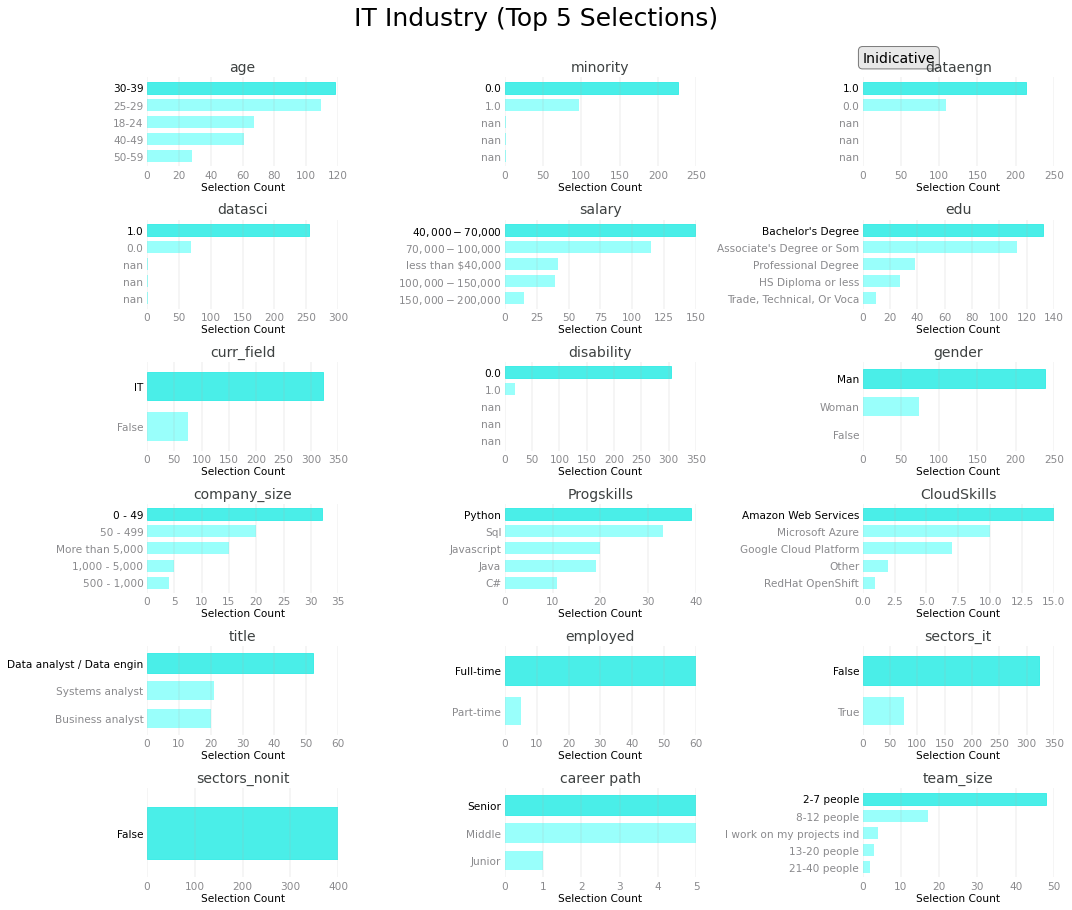

In [301]:
profileChart(isIT,columns, 3,6,'IT Industry (Top 5 Selections)',['#99fffb','#37ede6'])

### IT Industry: 
1. Majority **small-to-mid company size (0-49 or 50-499 people)** as well as relatively small **team size (2-7 people)**
2. Common technical tools used: **Python, SQL, Amazon Web Service, and Microsoft Azure**
3. Most common salary range: about **\\$40,000 - \\$100,000**
4. Mainly work **full-time**
5. Education: Characterized by  **Bachelor's degree** and **Associate's Degree or some college**
6. Characterized by young people: **30-39** and **25-29** age range
7. Gender: overwhelmingly **Male**
8. Ethnicity: majority **non-minority**

In [302]:
columns = getRidOfNanColumns(isNotIT)
len(columns)

18

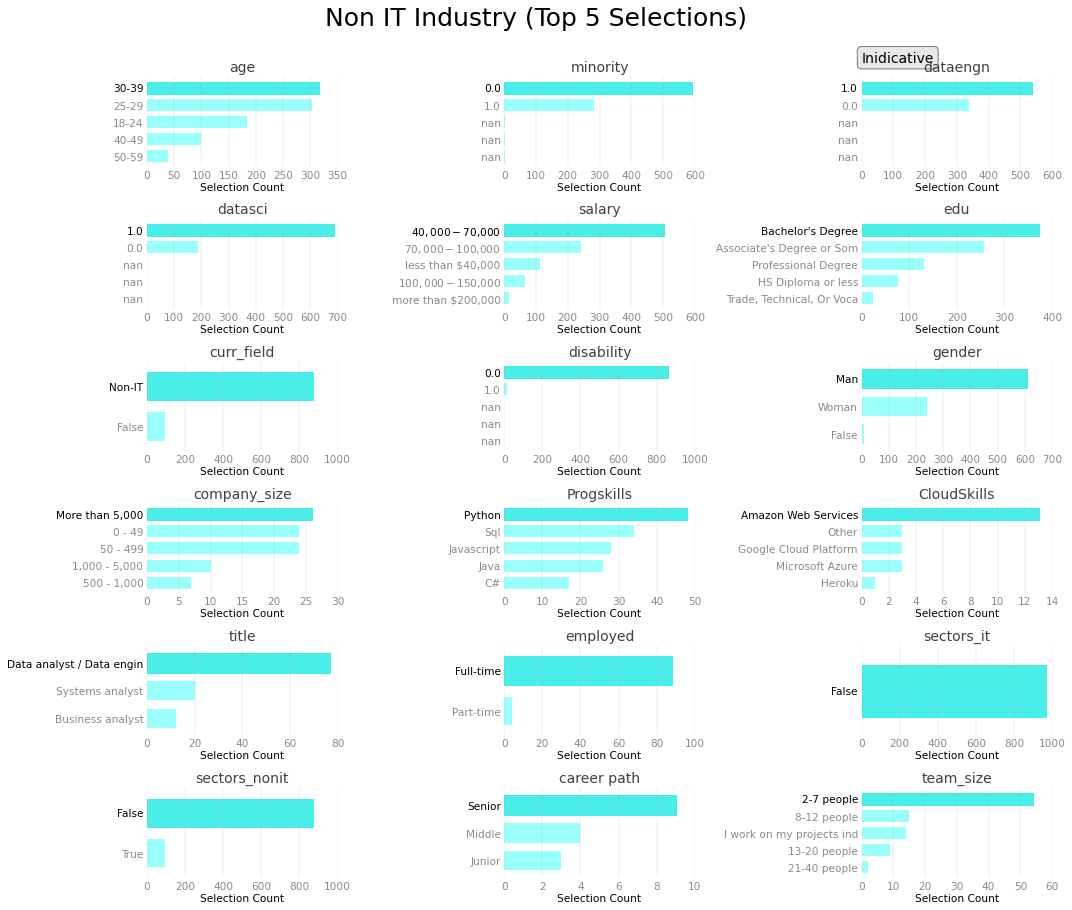

In [304]:
profileChart(isNotIT,columns, 3,6,'Non IT Industry (Top 5 Selections)',['#99fffb','#37ede6'])

### Non-IT Industry: 
1. Company size varies in size but with relatively small **team size (2-7 people)**
2. Common technical tools used: **Python, SQL, Amazon Web Service**
3. Most common salary range: **\\$40,000 - \\$70,000**
4. Mainly work **full-time**
5. Education: Characterized by  **Bachelor's degree** and **Associate's Degree or some college**
6. Characterized by young people: **30-39** and **25-29** age range
7. Gender: overwhelmingly **Male** (better women representation in the industry relative to IT)
8. Ethnicity: majority **non-minority**

### Overall Conclusion
Across the industries, the most commonly used programming languages are Python and SQL and in terms of team size, 2-7 people was the most common reported range. It was interesting to see that the most common degrees were in the form of a Bachelor's or Associate's Degree (or at least some college) hinting at advanced degree becoming less and less common for data-related roles. Of the respondents, most identified as being in the age ranges of 25-39, male and not part of a minority group.

For non-IT companies, \\$40,000-\\$70,000 was the most common salary range whereas for IT companies \\$40,000-\\$100,000  was more common. Lastly, what stood out was the company size of which a large number (> 500 people) was most commonly reported for companies in non-IT industries in comparison with the relatively small company size of 0 to 500 people reported for companies in the IT industry.

### Overall Recommendation
If we are to consider both industries together, Python and SQL are great programming languages to learn as they are most commonly used in a professional setting. In addition, learning how to utilize cloud platforms such as Aamzon Web Service and Microsoft Azure might be a good idea if one is considering to join a team that works with "big data." Moreover, working in small team size of about 2 - 7 people is most probable and thus suggests the importance of soft skills playing a role as a data professional. 
